# **Proyecto final. Análisis de factores socieconómicos que inciden en la actividad delictiva**.

### Propedéutico 2020. Maestría Ciencia de datos del ITAM



Elaborado por:

- Valeria Serrano Cote (_@vserranoc_)
- Juan Carlos Soto Hernández (_JSOHE_)
- Carlos Eduardo Bautista Pontanillo (_cbautistap_)


Julio 2020

# Introducción. Incidencia Delictiva Estatal 2015-2019

En México la incidencia delictiva es un problema que ha ido en incremento y esta vinculado con el crimen organizado, tanto que ha aumentado la percepción de inseguridad de la población mexicana en los últimos años. De los 80's en donde se tenía un control sobre las primeras células delictivas a través de una aparato burocrático basado en un modelo de sustitución de importaciones, a un nivel de violencia actual en donde no se ha acabado de definir la **política en materia de seguridad** que presentará el gobierno  para combatir a los cárteles de la droga y en general los delitos de robo, extorsión, homicidios, más relacionados con el fuero común.

Ante los señalamientos del actual gobierno de que la principal causa de los delitos del fuero común son ocasionados por la **pobreza** se decidió analizar la incidencia delictiva durante el período 2015-2019. Entre los delitos que más afectan la vida de los ciudadanos se encuentran el homicidio, el robo a casa habitación, el robo a transeúnte, el robo en carretera, el robo de vehículo y la extorsión.

Como marco de referencia nos apoyamos en **"What Do Economists Know About Crime?"** de Angela K. Dills, Jeffrey A. Miron, Garrett Summers, en el cual se señala algunas de las causas u orígenes de la actividad criminal en los Estados Unidos, particularmente, sobre temas de desempleo y pobreza, los cuales no parecen ser factores determinantes que aumenten o disminuyan la incidencia delictiva, como sí parecen serlo el número de personas en edad de delinquir.


# Bases de datos

La Base de datos fue construida por los integrantes del equipo y contiene información a nivel estatal para las variables:

- _homicidio_: número de carpetas de investigación por delito de homicidio 
- _robocasa_: número de carpetas de investigación por delito de robo a casa-habitación
- _robocalle_: número de carpetas de investigación por delito de robo a transeúnte
- _robocarro_: número de carpetas de investigación por delito de robo de vehículo
- _extorsion_: número de carpetas de investigación por delito de extorsión
- _tasa_hom_: tasa de homicidios por cada 100 mil habitantes
- _tasa_rcasa_: tasa de robo a casa-habitación por cada 100 mil habitantes
- _tasa_rcalle_: tasa de robo a transeúnte por cada 100 mil habitantes
- _tasa_rcarro_: tasa de robo de vehículo por cada 100 mil habitantes
- _tasa_extor_: tasa de extorsión por cada 100 mil habitantes
- _desocupa_: tasa de desempleo
- _edad15a24_: población en edad de 14 a 34 años
- _edad25a34_: población en edad de 25 a 34 años
- _edad35a44_: población en edad de 35 a 44 años
- _edad45mas_: población en edad de 45 o más años
- _pob_tot_: población total
- _pibe_: Producto Interno Bruto Estatal (PIBE) en millones de pesos constantes
- _ingreso_: ingreso anual promedio de los hogares en pesos constantes (deflactado con el INPC base 100 = 2da quincena de julio de 2018
- _pobreza_: porcentaje de la población que vive en situación de pobreza 
- _pob_ext_: porcentaje de la población que vive en situación de pobreza extrema
 

Los datos de Incidencia delictiva se obtuvieron del **Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública** (SESNSP), el cual publica las estadísticas de las carpetas de investigación de las Fiscalías estatales.

La población (total y por grupos de edad) se tomó del Consejo Nacional de Población (`CONAPO`), con población a mitad de año. Los datos de desocupación se obtuvieron de la Encuesta Nacional de Ocupación y Empleo (`ENOE`) del `INEGI`; el Ingreso promedio anual proviene de la Encuesta Nacional de Ingreso y Gasto de los Hogares (`ENIGH`) del `INEGI`; El PIBE se obtuvo del Sistema de Cuentas Nacionales de México (`SCNM`) del `INEGI`; y cifras de pobreza y pobreza extrema se extrajeron del Consejo Nacional de Evaluación de la Política de Desarrollo Social (`CONEVAL`).

# Periodo a analizar

Se analizó el periodo de 2015 a 2019, toda vez que estas cifras presentan congruencia en la base de datos del `SESNSP`, si bien es cierto que  hay una serie que va de 1997 a 2017, ésta  presenta una metodología diferente en la presentación y desagregación de datos, por esa razón se analizó este periodo de 4 años.

Las variables de _ingreso_, _pobreza_ y _pobreza extrema_ se reportan oficialmente con periodicidad bianual para el periodo 2008-2018, por lo que, para lograr tener los datos anuales e integrarlos a la base de datos, interpolamos los datos "intermedios" utilizando los métodos vistos en el curso. Esto puede observarse al final del presente documento en el "Anexo. Interpolación de variables _ingreso_, _pobreza_ y _pob_ext_"

# Importando librería

In [2]:
import pylab

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.api as sm

import linearmodels as linearmodels

from linearmodels.panel import PooledOLS

# Descripción general de la base de datos

In [3]:
np.set_printoptions(precision = 2) 

In [4]:
bd = pd.read_csv("base_final.csv")
bd.head()

ao  clave_ent             edo  homicidio  robocasa  robocalle  robocarro  \
0  2015          1  Aguascalientes        211      2525       1754       1995   
1  2016          1  Aguascalientes        233      2459       1353       3110   
2  2017          1  Aguascalientes        258      3327       1949       3624   
3  2018          1  Aguascalientes        283      3355       2216       3309   
4  2019          1  Aguascalientes        269      2817       1780       2399   

   extorsion  tasa_hom  tasa_rcasa  ...  desocupa  edad15a24  edad25a34  \
0         39     15.84      189.59  ...  4.577627     255649     211782   
1         70     17.19      181.43  ...  3.973306     258733     217183   
2        121     18.75      241.83  ...  3.599153     260495     222453   
3        138     20.28      240.36  ...  3.626284     261963     227600   
4        116     19.00      199.02  ...  3.532177     263225     232527   

   edad35a44  edad45mas  pob_tot         pibe   ingreso  pob_ext  pobreza  
0     175356     296621  1331825  198220.6406  207024.0     2.09    31.58  
1     178187     308198  1355321  211672.4688  203879.0     2.30    28.22  
2     180840     320035  1375782  216705.5625  206760.0     2.18    25.99  
3     183553     331996  1395794  224807.4688  222261.0     1.17    26.18  
4     186443     344052  1415421  223622.4844       NaN      NaN      NaN  

[5 rows x 23 columns]

In [5]:
bd.shape

(160, 23)

Tenemos 160 renglones y 23 columnas. Las varibles en las columnas son:

In [6]:
bd.columns

Index(['ao', 'clave_ent', 'edo', 'homicidio', 'robocasa', 'robocalle',
       'robocarro', 'extorsion', 'tasa_hom', 'tasa_rcasa', 'tasa_rcalle',
       'tasa_rcarro', 'tasa_extor', 'desocupa', 'edad15a24', 'edad25a34',
       'edad35a44', 'edad45mas', 'pob_tot', 'pibe', 'ingreso', 'pob_ext',
       'pobreza'],
      dtype='object')

In [7]:
bd.describe(include="all")

ao   clave_ent      edo    homicidio     robocasa  \
count    160.000000  160.000000      160   160.000000    160.00000   
unique          NaN         NaN       32          NaN          NaN   
top             NaN         NaN  Tabasco          NaN          NaN   
freq            NaN         NaN        5          NaN          NaN   
mean    2017.000000   16.500000      NaN  1230.825000   2701.98125   
std        1.418654    9.262082      NaN   945.839998   2300.18593   
min     2015.000000    1.000000      NaN    84.000000     80.00000   
25%     2016.000000    8.750000      NaN   460.250000   1314.75000   
50%     2017.000000   16.500000      NaN  1000.500000   2349.00000   
75%     2018.000000   24.250000      NaN  1761.250000   3112.75000   
max     2019.000000   32.000000      NaN  4494.000000  12999.00000   

           robocalle     robocarro    extorsion    tasa_hom  tasa_rcasa  ...  \
count     160.000000    160.000000   160.000000  160.000000  160.000000  ...   
unique           NaN           NaN          NaN         NaN         NaN  ...   
top              NaN           NaN          NaN         NaN         NaN  ...   
freq             NaN           NaN          NaN         NaN         NaN  ...   
mean     2454.343750   5914.500000   198.181250   34.348250   92.510375  ...   
std      4721.687582   8838.664012   311.248164   20.720682   87.032577  ...   
min         0.000000    221.000000     0.000000    3.900000    6.520000  ...   
25%       181.250000   1515.250000    24.750000   20.145000   33.562500  ...   
50%       819.500000   3421.500000   116.000000   27.825000   65.875000  ...   
75%      1765.000000   5461.500000   198.250000   42.885000  116.817500  ...   
max     27783.000000  54742.000000  2487.000000  105.540000  389.280000  ...   

          desocupa     edad15a24     edad25a34     edad35a44     edad45mas  \
count   160.000000  1.600000e+02  1.600000e+02  1.600000e+02  1.600000e+02   
unique         NaN           NaN           NaN           NaN           NaN   
top            NaN           NaN           NaN           NaN           NaN   
freq           NaN           NaN           NaN           NaN           NaN   
mean      3.602700  6.855021e+05  6.187375e+05  5.260511e+05  1.004019e+06   
std       1.114326  5.583670e+05  5.224428e+05  4.565163e+05  8.838526e+05   
min       1.279218  1.290150e+05  1.190830e+05  1.004100e+05  1.644870e+05   
25%       2.790710  3.218815e+05  2.879238e+05  2.341340e+05  4.308870e+05   
50%       3.543905  5.310785e+05  4.696965e+05  4.113720e+05  7.893785e+05   
75%       4.201930  8.681305e+05  7.657412e+05  6.139250e+05  1.156226e+06   
max       7.593050  2.966434e+06  2.834788e+06  2.458179e+06  4.701247e+06   

             pob_tot          pibe        ingreso     pob_ext     pobreza  
count   1.600000e+02  1.600000e+02     128.000000  128.000000  128.000000  
unique           NaN           NaN            NaN         NaN         NaN  
top              NaN           NaN            NaN         NaN         NaN  
freq             NaN           NaN            NaN         NaN         NaN  
mean    3.875842e+06  5.391530e+05  185299.796875    6.985859   41.128516  
std     3.217754e+06  5.618525e+05   54779.270982    7.217705   14.972258  
min     7.198460e+05  9.558523e+04   96910.000000    0.470000   12.890000  
25%     1.757316e+06  2.283873e+05  149374.750000    2.440000   28.745000  
50%     3.026771e+06  3.835130e+05  181618.000000    4.360000   40.015000  
75%     4.895339e+06  5.778418e+05  215024.250000    7.825000   50.660000  
max     1.720000e+07  3.128248e+06  411233.000000   30.220000   77.080000  

[11 rows x 23 columns]

## Análisis de estadística descriptiva: ingreso, pobreza y pobreza extrema

**En esta sección** el análisis se enfocará en analizar **la evolución y características** de las variables de:

- Ingreso promedio de los hogares (_ingreso_)
- Porcentaje de población que se encuentra en situación de pobreza (_pobreza_)
- Porcentaje de población que se encuentra en situación de pobreza extrema (_pob_ext_)
    
para cada una de las entidades federativas, durante el periodo 2015-2018.

Para ello, se trabajará con un subcojunto de la base de datos original que contenga solo las variables de interés, y a la cual se le aplicarán las manipulaciones necesarias para el análisis.

In [8]:
bd_cbp=bd.drop(["homicidio", "robocasa", "robocalle",
       "robocarro", "extorsion", "desocupa", "edad15a24", "edad25a34",
       "edad35a44", "edad45mas", "pob_tot", "pibe"],axis=1)
bd_cbp.tail()

ao  clave_ent        edo  tasa_hom  tasa_rcasa  tasa_rcalle  \
155  2015         32  Zacatecas     22.29       55.88         3.12   
156  2016         32  Zacatecas     37.67       32.72         2.16   
157  2017         32  Zacatecas     42.34       43.38         3.80   
158  2018         32  Zacatecas     42.62       42.44         3.35   
159  2019         32  Zacatecas     40.25       36.50         2.30   

     tasa_rcarro  tasa_extor   ingreso  pob_ext  pobreza  
155       138.73        5.68  141364.0     4.63    50.94  
156       138.74        5.01  150466.0     3.52    49.00  
157       124.92       11.54  153315.0     2.93    47.34  
158       119.76       14.31  140328.0     3.37    46.76  
159       103.41       20.49       NaN      NaN      NaN

In [9]:
i = bd_cbp[(bd_cbp.ao == 2019)].index
bd_cbp=bd_cbp.drop(i,axis=0)
bd_cbp.tail()

ao  clave_ent        edo  tasa_hom  tasa_rcasa  tasa_rcalle  \
153  2018         31    Yucatan      3.99       63.17         4.08   
155  2015         32  Zacatecas     22.29       55.88         3.12   
156  2016         32  Zacatecas     37.67       32.72         2.16   
157  2017         32  Zacatecas     42.34       43.38         3.80   
158  2018         32  Zacatecas     42.62       42.44         3.35   

     tasa_rcarro  tasa_extor   ingreso  pob_ext  pobreza  
153        13.63        0.23  191822.0     6.66    40.80  
155       138.73        5.68  141364.0     4.63    50.94  
156       138.74        5.01  150466.0     3.52    49.00  
157       124.92       11.54  153315.0     2.93    47.34  
158       119.76       14.31  140328.0     3.37    46.76

### Ingreso promedio de los hogares por entidad federativa

Visualizamos la evolución del ingreso promedio durante el periodo 2015-2018 para cada entidad federativa

In [10]:
anios=["2015","2016","2017","2018"]
anios

['2015', '2016', '2017', '2018']

A través de un loop generamos un diccionario que contiene los datos para cada entidad. Esto facilitará la visualización:

In [11]:
num_edo=np.arange(1,33,1)
num_edo

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [12]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=bd_cbp.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)

In [13]:
## mostramos ejemplo de un Estado en particular
ent[18]

ao  clave_ent      edo  tasa_hom  tasa_rcasa  tasa_rcalle  tasa_rcarro  \
0  2015         18  Nayarit     12.30       37.89          0.0        21.92   
1  2016         18  Nayarit      6.92       17.87          0.0        18.19   
2  2017         18  Nayarit     23.43        7.46          0.0        22.70   
3  2018         18  Nayarit     35.61        6.71          0.0        73.30   

   tasa_extor   ingreso  pob_ext  pobreza  
0        0.08  176238.0     7.79    38.23  
1        0.41  177662.0     7.93    37.53  
2        0.08  178449.0     7.69    36.88  
3        0.32  178553.0     5.88    34.77

Generamos gráfica que contiene la evolución del ingreso anual promedio de los hogares en cada entidad federativa:

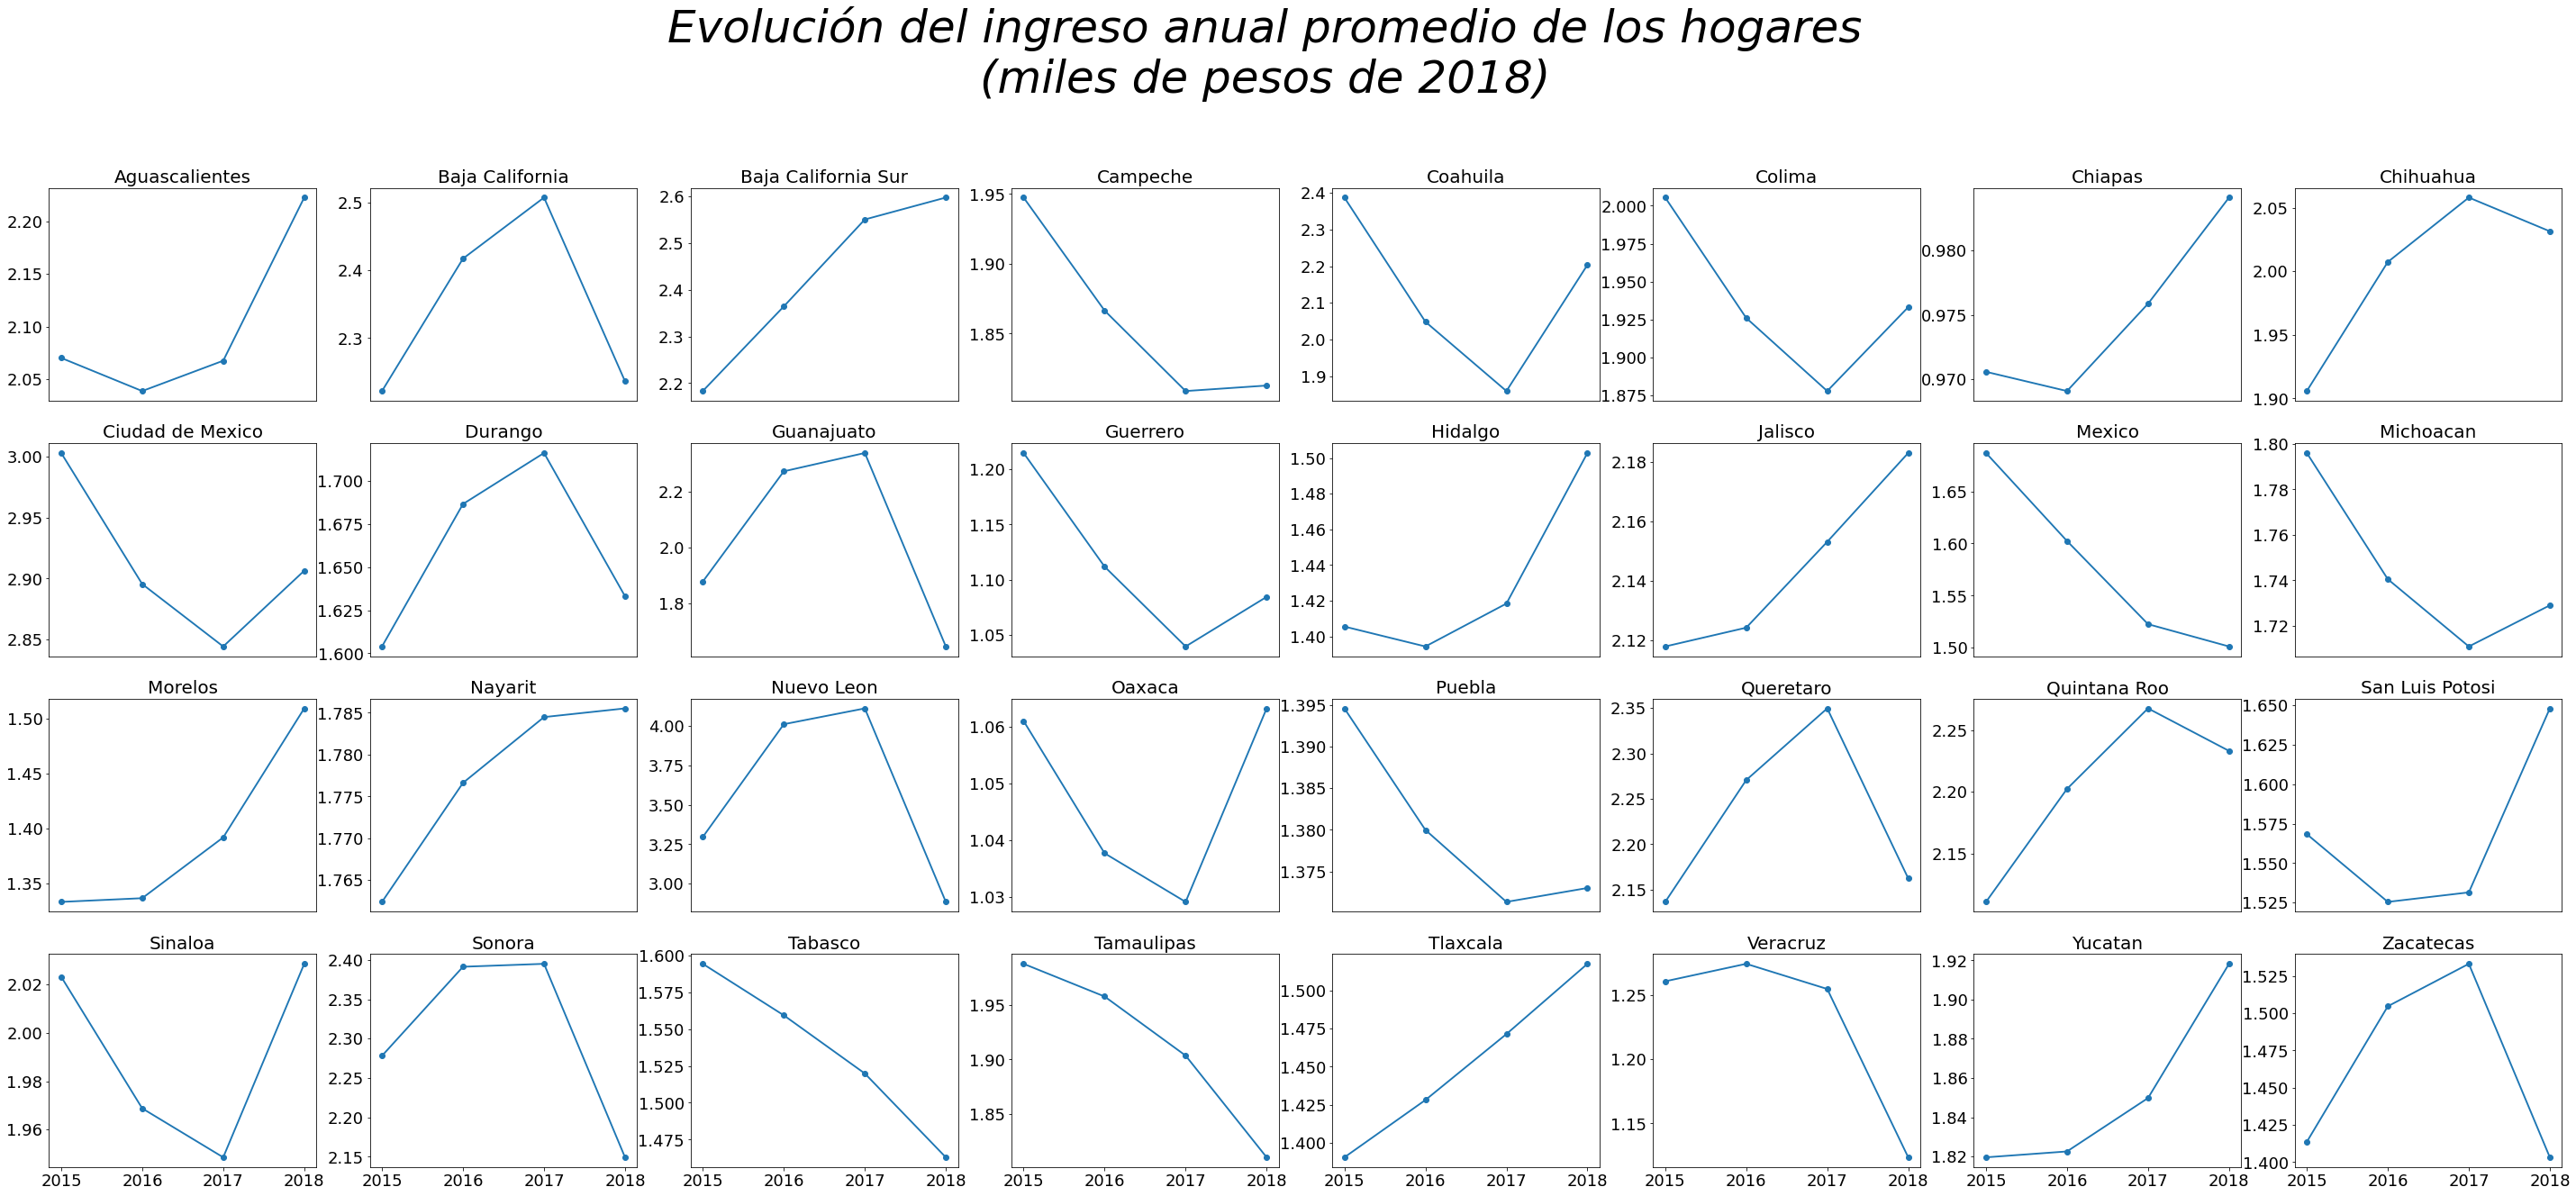

In [17]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].ingreso/100000, marker="o", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución del ingreso anual promedio de los hogares\n(miles de pesos de 2018)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Como puede observarse, la evolución del ingreso real de los hogares no fue homogeneo en las entidades del país durante 2015-2018. En Estados como Aguascalientes, Chiapas, Jalisco, Puebla, Tlaxcala o Yucatán el ingreso real se incrementó sostenidamente durante el periodo.

En contraste, los hogares que habitan en entidades como Campeche, Coahuila, Colima, Ciudad de México, Estado de México, Nuevo León, Sonora, Veracruz, entre otras, vieron disminuidos sus ingresos durante 2015-2018.

Por otro lado, en algunas entidades, el nivel de ingreso de los hogares observado en 2018 se ubicó en niveles muy similares a los observados en 2015, en términos reales. Tal es el caso de Estados como Baja California, Querétaro, Sinaloa y Zacatecas. No obstante, el comportamiento intermedio difiere. Por ejemplo, en Sinaloa, el ingreso anual disminuyó en 2016 y 2017 de manera importante y en 2018 se recuperó a un nivel similar al de 2015; mientras que en Baja California se observó el comportamiento inverso: después de registrarse un crecimiento del ingreso en 2016 y 2017, la caída en el ingreso de 2018 significó que éste retrocediera al nivel observado 3 años antes.


### Pobreza

Asimismo, observamos la evolución del porcentaje de población en situación de pobreza durante el periodo 2015-2018 para cada entidad federativa:

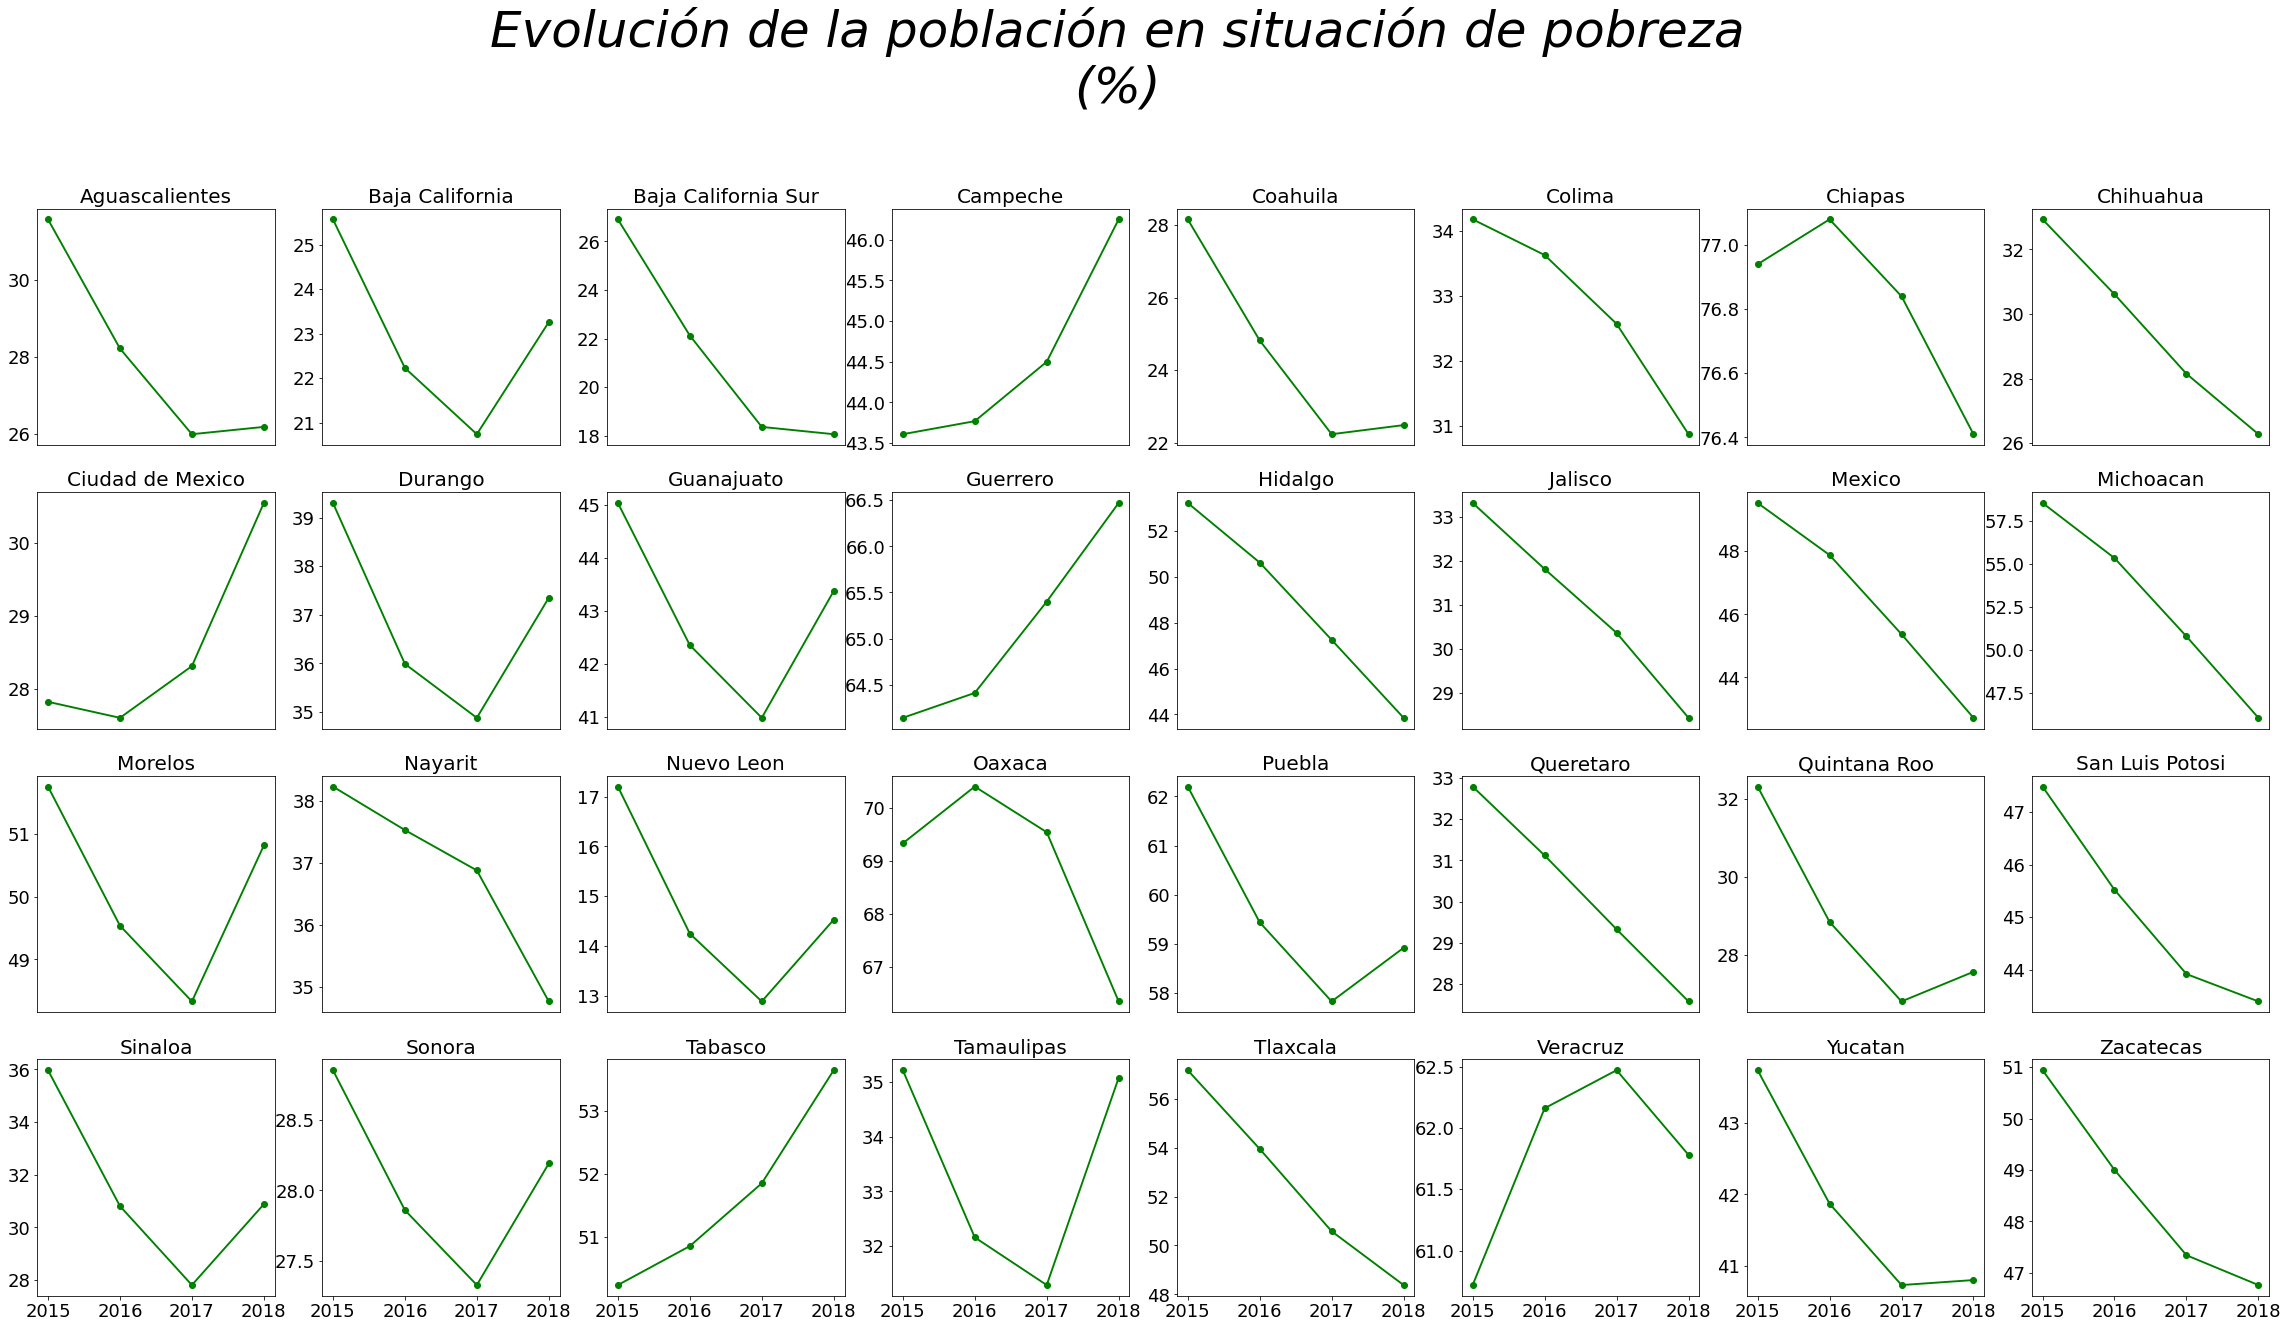

In [18]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].pobreza, marker="o", color="g", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    
    if num < 25 :
        plt.xticks([])
   

        

plt.suptitle("Evolución de la población en situación de pobreza\n(%)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Se observa que, durante el periodo de análisis, 26 de las 32 entidades disminuyeron el porcentaje de pobreza. De las cuales destacan por haber disminuido la pobreza consistentemente cada año:

- Baja California Sur
- Colima
- Chihuahua 
- Hidalgo
- Jalisco
- Estado de México
- Michoacán
- Nayarit
- Oaxaca
- Querétaro
- San Luis Potosí
- Tlaxcala
- Zacatecas

En contraste, las entidades donde aumentó el nivel de pobreza fueron:

- Campeche
- Ciudad de México
- Guerrero
- Tabasco
- Veracruz

Mientas que en Tamaulipas se mantuvo prácticamente constante.


### Pobreza extrema

Durante 2015-2018, la pobreza extrema en las entidades federativas evolucionó de la siguiente forma:

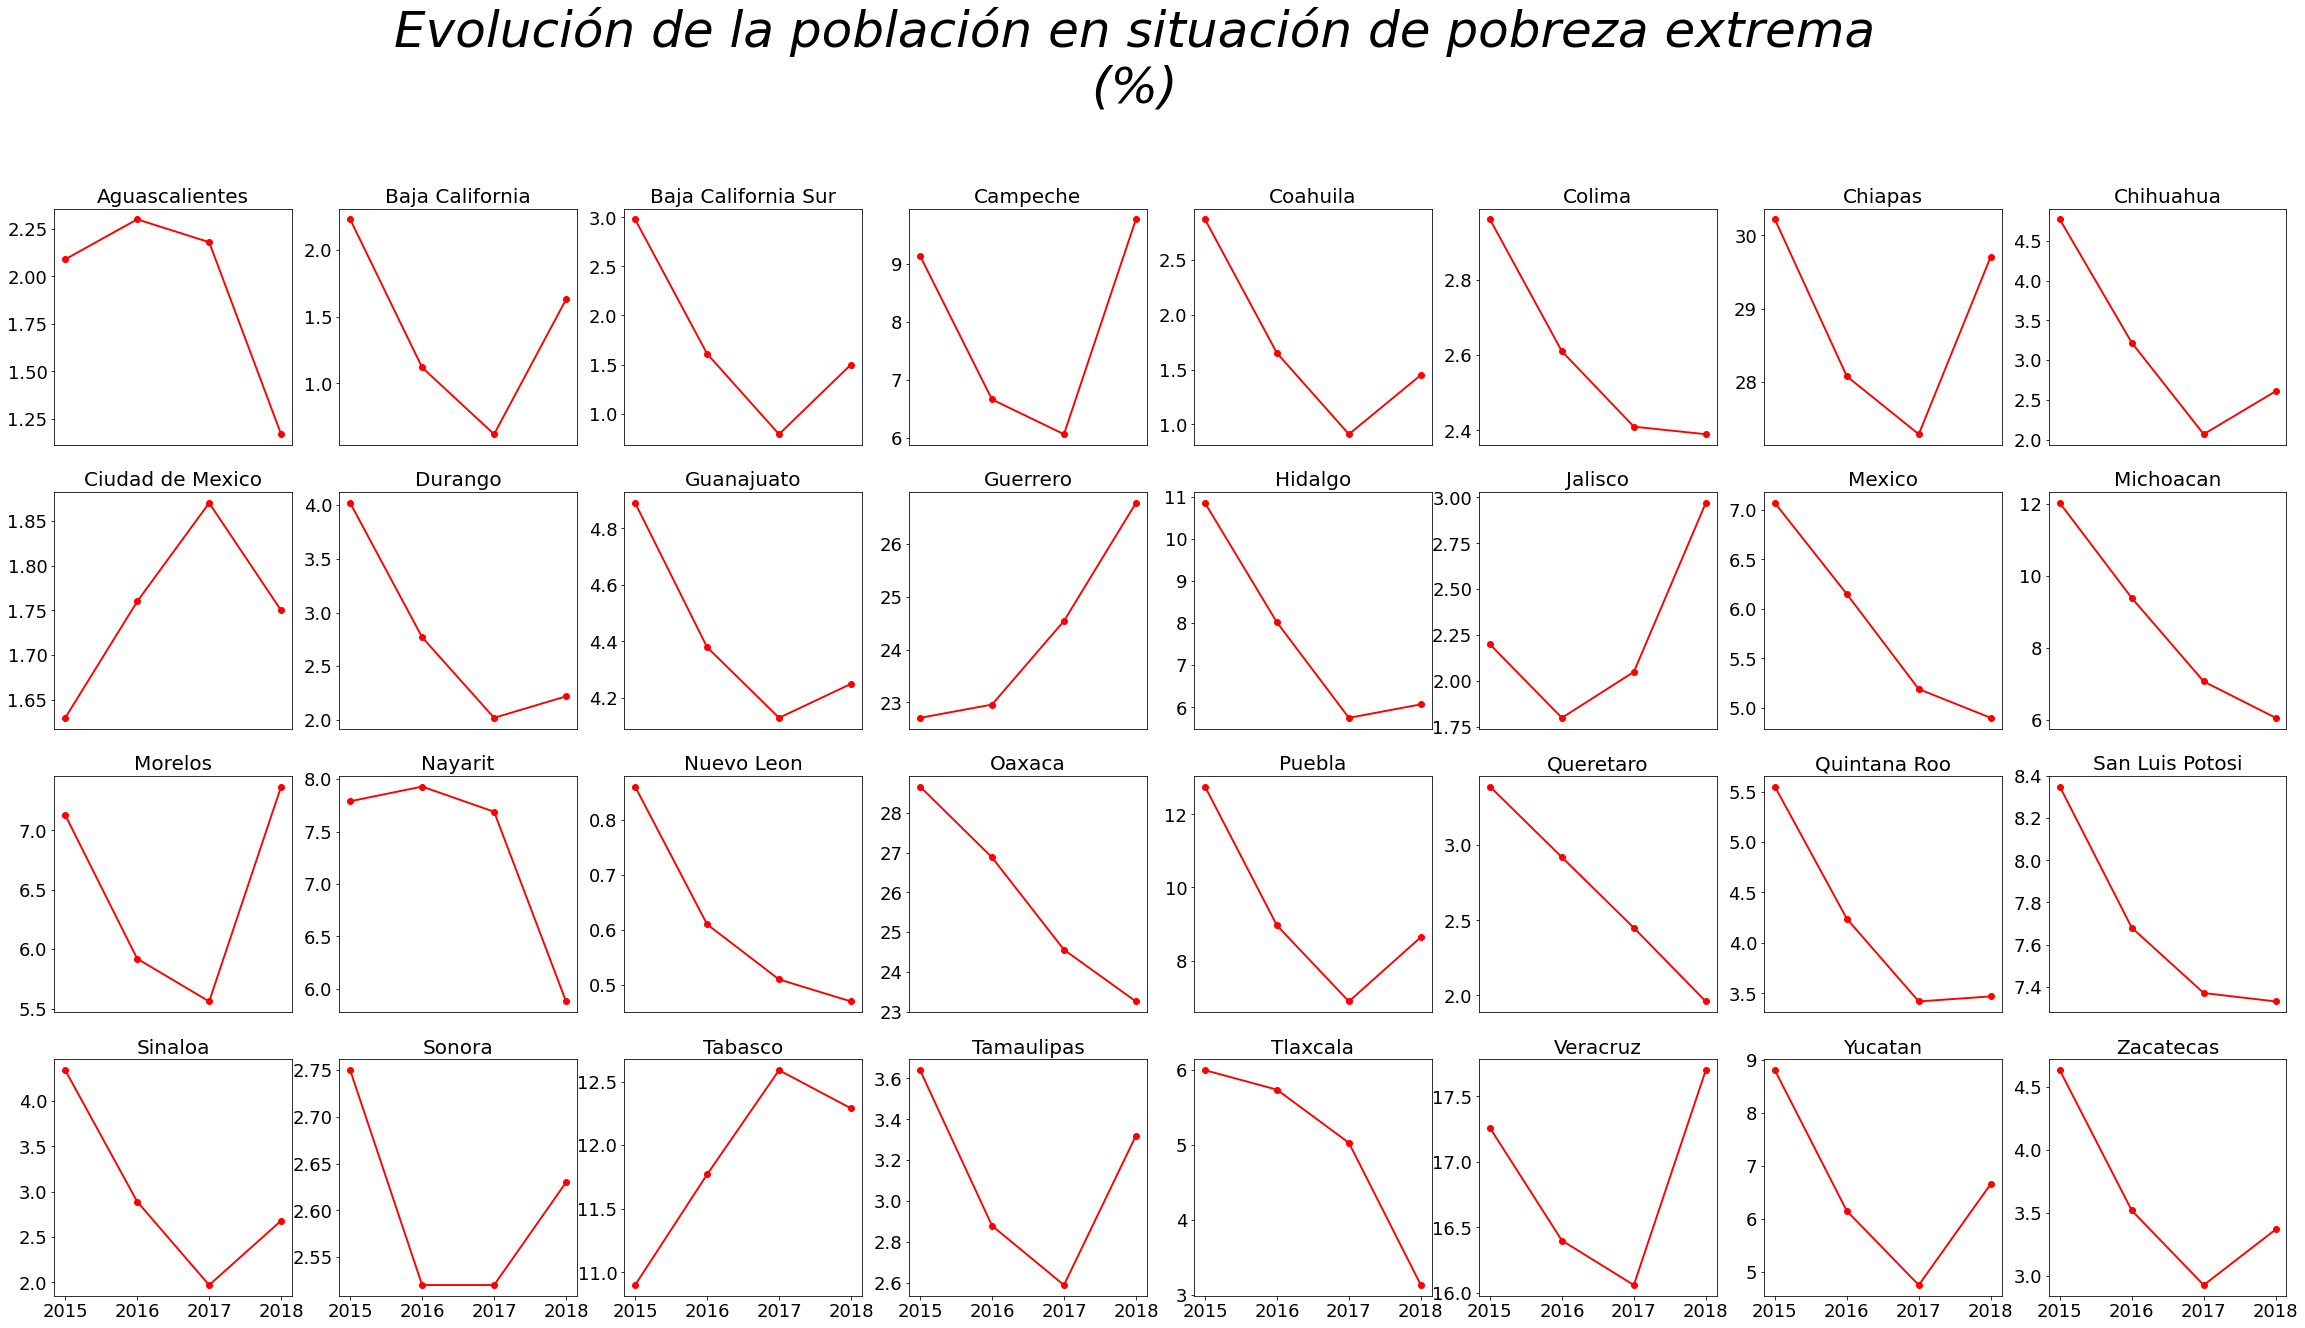

In [19]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].pob_ext, marker="o", color="r", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    
    if num < 25 :
        plt.xticks([])
   

        

plt.suptitle("Evolución de la población en situación de pobreza extrema\n(%)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Por su parte, 7 de las 32 entidades federativas registraron un aumento en el porcentaje de población en situación de pobreza extrema:
    
- Campeche
- Ciudad de México
- Guerrero
- Jalisco
- Morelos
- Tabasco
- Veracruz

Destaca que, en Jalisco y Morelos la pobreza extrema aumentó a pesar de que el porcentaje de pobreza disminuyó.  
 
  
   
    
     
      
       
        
        

**A continuación,** analizaremos el comportamiento de **cada variable por entidad**. Para ello, calculamos el promedio observado en el periodo:

In [20]:
bdprom=bd_cbp.groupby(["clave_ent","edo"]).mean()
bdprom.head()

ao  tasa_hom  tasa_rcasa  tasa_rcalle  \
clave_ent edo                                                              
1         Aguascalientes       2016.5   18.0150    213.3025     132.9875   
2         Baja California      2016.5   60.1500    295.3250     165.9075   
3         Baja California Sur  2016.5   47.0875    356.1550       3.6225   
4         Campeche             2016.5   15.4300     11.6950       6.9450   
5         Coahuila             2016.5   16.0475     86.1200      44.2500   

                               tasa_rcarro  tasa_extor    ingreso  pob_ext  \
clave_ent edo                                                                
1         Aguascalientes          219.9350      6.6925  209981.00   1.9350   
2         Baja California         488.3125      5.3175  234557.00   1.4000   
3         Baja California Sur     192.6125     20.3600  242372.25   1.7200   
4         Campeche                 51.4475      2.4525  185888.50   7.9075   
5         Coahuila                 34.6425      0.9225  212467.50   1.7200   

                               pobreza  
clave_ent edo                           
1         Aguascalientes       27.9925  
2         Baja California      22.9500  
3         Baja California Sur  21.3700  
4         Campeche             44.5325  
5         Coahuila             24.4250

In [21]:
bdprom=bdprom.drop("ao",axis=1)
bdprom.tail()

tasa_hom  tasa_rcasa  tasa_rcalle  tasa_rcarro  \
clave_ent edo                                                          
28        Tamaulipas   43.1850     83.1925       7.8775     146.9400   
29        Tlaxcala     22.3200     53.9075      24.5425     138.3275   
30        Veracruz     23.7725     27.3250      17.4400      98.8675   
31        Yucatan       4.4700     82.0675       7.8500      16.2175   
32        Zacatecas    36.2300     43.6050       3.1075     130.5375   

                      tasa_extor    ingreso  pob_ext  pobreza  
clave_ent edo                                                  
28        Tamaulipas      4.2400  191478.25   3.1075  33.4325  
29        Tlaxcala        0.3400  145182.50   4.9750  52.5200  
30        Veracruz        4.4900  122842.75  16.8550  61.7825  
31        Yucatan         1.8925  185255.75   6.5925  41.7850  
32        Zacatecas       9.1350  146368.25   3.6125  48.5100

Utilizando el promedio de cada variable durante los años 2015-2018, graficamos:

In [22]:
#creamos dataframe auxiliar para ordenar los valores
bdprom_ord_ing = bdprom.sort_values("ingreso",ascending=False)
bdprom_ord_ing.head()

tasa_hom  tasa_rcasa  tasa_rcalle  tasa_rcarro  \
clave_ent edo                                                                   
19        Nuevo Leon            21.2725     57.7350      30.8825      43.3725   
9         Ciudad de Mexico      19.2750     71.9125     193.2575     136.4700   
3         Baja California Sur   47.0875    356.1550       3.6225     192.6125   
2         Baja California       60.1500    295.3250     165.9075     488.3125   
26        Sonora                36.9950     49.6275       6.8975     137.3350   

                               tasa_extor    ingreso  pob_ext  pobreza  
clave_ent edo                                                           
19        Nuevo Leon              11.0100  357570.25   0.6125  14.7175  
9         Ciudad de Mexico         6.2775  291225.50   1.7525  28.5700  
3         Baja California Sur     20.3600  242372.25   1.7200  21.3700  
2         Baja California          5.3175  234557.00   1.4000  22.9500  
26        Sonora                   1.7650  230347.75   2.6050  28.0575

In [23]:
bdprom_ord_ing["nombre_ent"] = bdprom_ord_ing.index
bdprom_ord_ing.head()

tasa_hom  tasa_rcasa  tasa_rcalle  tasa_rcarro  \
clave_ent edo                                                                   
19        Nuevo Leon            21.2725     57.7350      30.8825      43.3725   
9         Ciudad de Mexico      19.2750     71.9125     193.2575     136.4700   
3         Baja California Sur   47.0875    356.1550       3.6225     192.6125   
2         Baja California       60.1500    295.3250     165.9075     488.3125   
26        Sonora                36.9950     49.6275       6.8975     137.3350   

                               tasa_extor    ingreso  pob_ext  pobreza  \
clave_ent edo                                                            
19        Nuevo Leon              11.0100  357570.25   0.6125  14.7175   
9         Ciudad de Mexico         6.2775  291225.50   1.7525  28.5700   
3         Baja California Sur     20.3600  242372.25   1.7200  21.3700   
2         Baja California          5.3175  234557.00   1.4000  22.9500   
26        Sonora                   1.7650  230347.75   2.6050  28.0575   

                                             nombre_ent  
clave_ent edo                                            
19        Nuevo Leon                   (19, Nuevo Leon)  
9         Ciudad de Mexico        (9, Ciudad de Mexico)  
3         Baja California Sur  (3, Baja California Sur)  
2         Baja California          (2, Baja California)  
26        Sonora                           (26, Sonora)

In [24]:
#variable posicional para eje x
ypos=np.arange(len(bdprom_ord_ing))
ypos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

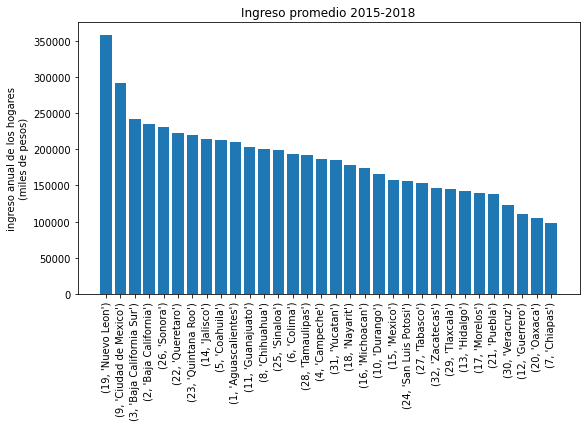

In [25]:
plt.rcParams["figure.figsize"] = [9,5]
plt.bar(ypos,bdprom_ord_ing["ingreso"])
plt.xticks(ypos,bdprom_ord_ing["nombre_ent"],rotation=90)
plt.ylabel("ingreso anual de los hogares\n(miles de pesos)")
plt.title("Ingreso promedio 2015-2018")
plt.show()

De esta manera, observamos que en promedio, Nuevo León registró el nivel de ingreso más elevado en 2015-2018, mientras que los hogares de Chiapas registraron el menor nivel.

In [26]:
bdprom_ord_pob = bdprom.sort_values("pobreza",ascending=False)
bdprom_ord_pob["nombre_ent"] = bdprom_ord_pob.index
ypos=np.arange(len(bdprom_ord_pob))

En sentido inverso, Nuevo León es el estado que registró un menor nivel de pobreza en el promedio de 2015-2018, y Chiapas la entidad con mayor porcentaje de pobreza (cerca del 80% de su población vive en situación de pobrezs).

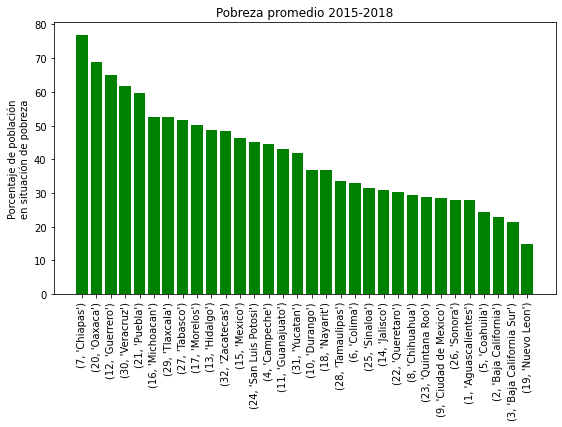

In [27]:
plt.rcParams["figure.figsize"] = [9,5]
plt.bar(ypos,bdprom_ord_pob["pobreza"],color="g")
plt.xticks(ypos,bdprom_ord_pob["nombre_ent"],rotation=90)
plt.ylabel("Porcentaje de población\nen situación de pobreza")
plt.title("Pobreza promedio 2015-2018")
plt.show()

In [28]:
bdprom_ord_pobe = bdprom.sort_values("pob_ext",ascending=False)
bdprom_ord_pobe["nombre_ent"] = bdprom_ord_pobe.index
ypos=np.arange(len(bdprom_ord_pobe))

Las entidades con mayor nivel de pobreza extrema en promedio durante 2015-2018 se ven como sigue:

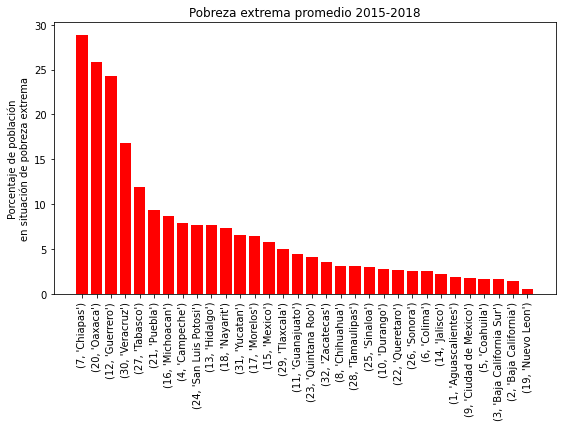

In [29]:
plt.rcParams["figure.figsize"] = [9,5]
plt.bar(ypos,bdprom_ord_pobe["pob_ext"],color="r")
plt.xticks(ypos,bdprom_ord_pobe["nombre_ent"],rotation=90)
plt.ylabel("Porcentaje de población\nen situación de pobreza extrema")
plt.title("Pobreza extrema promedio 2015-2018")
plt.show()


Asimismo, podemos observar las **medidas de tendencia central** para el ingreso medio de 2015-2018 en las entidades del país.




In [30]:
bdprom["ingreso"].describe()

count        32.000000
mean     185299.796875
std       53965.713172
min       97490.750000
25%      146071.812500
50%      185572.125000
75%      212965.750000
max      357570.250000
Name: ingreso, dtype: float64

Se observa, entonces, que el ingreso anual promedio de los hogares mexicanos durante el periodo 2015-2018 fue de 185,300 pesos de 2018, muy similar al valor de la mediana (185,572 pesos constantes). Parecería ser que el ingreso medio es insesgado.

Se observa la distribución del ingreso medio en el siguiente histograma:

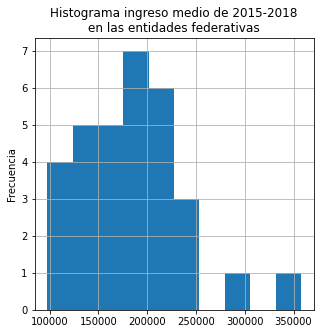

In [31]:
plt.rcParams["figure.figsize"] = [5,5]
bdprom["ingreso"].hist(bins=10)
plt.title("Histograma ingreso medio de 2015-2018\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()

Para la **pobreza** promedio observada en 2015-2018 se tiene:

In [32]:
bdprom["pobreza"].describe()

count    32.000000
mean     41.128516
std      15.004491
min      14.717500
25%      29.341250
50%      39.332500
75%      50.495625
max      76.817500
Name: pobreza, dtype: float64

y se distribuye:

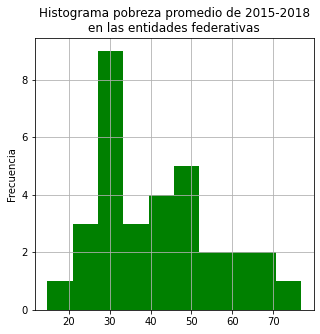

In [33]:
bdprom["pobreza"].hist(bins=10,color="g")
plt.title("Histograma pobreza promedio de 2015-2018\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()

y para el porcentaje de población en **pobreza extrema**:

In [34]:
bdprom["pob_ext"].describe()

count    32.000000
mean      6.985859
std       7.221645
min       0.612500
25%       2.601875
50%       4.291250
75%       7.738750
max      28.825000
Name: pob_ext, dtype: float64

Observamos, que la media es mayor a la mediana, por lo que podríamos esperar que la distribución esté sesgada a la derecha:

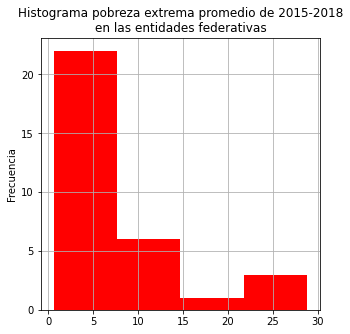

In [35]:
bdprom["pob_ext"].hist(bins="scott",color="r")
plt.title("Histograma pobreza extrema promedio de 2015-2018\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()

**Realizamos el mismo análisis de medidas de tendencia central para el total de las observaciones (todos los años) de las variables:**

- Ingreso
- Pobreza
- Pobreza extrema

In [36]:
bd_cbp["ingreso"].describe()

count       128.000000
mean     185299.796875
std       54779.270982
min       96910.000000
25%      149374.750000
50%      181618.000000
75%      215024.250000
max      411233.000000
Name: ingreso, dtype: float64

Se aprecia mejor el sesgo hacia la derecha. Visualizamos con el histograma:

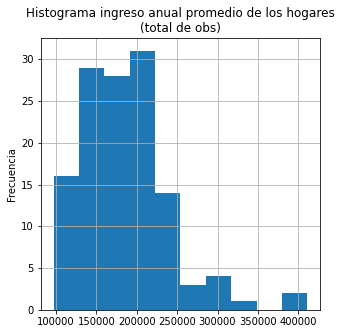

In [37]:
bd_cbp["ingreso"].hist(bins=10)
plt.title("Histograma ingreso anual promedio de los hogares\n(total de obs)")
plt.ylabel("Frecuencia")
plt.show()

para **pobreza**:

In [38]:
bd_cbp["pobreza"].describe()

count    128.000000
mean      41.128516
std       14.972258
min       12.890000
25%       28.745000
50%       40.015000
75%       50.660000
max       77.080000
Name: pobreza, dtype: float64

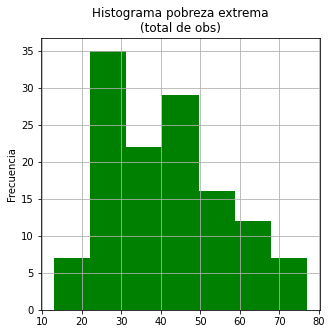

In [39]:
bd_cbp["pobreza"].hist(bins="scott",color="g")
plt.title("Histograma pobreza extrema\n(total de obs)")
plt.ylabel("Frecuencia")
plt.show()

y para **pobreza extrema**:

In [40]:
bd_cbp["pob_ext"].describe()

count    128.000000
mean       6.985859
std        7.217705
min        0.470000
25%        2.440000
50%        4.360000
75%        7.825000
max       30.220000
Name: pob_ext, dtype: float64

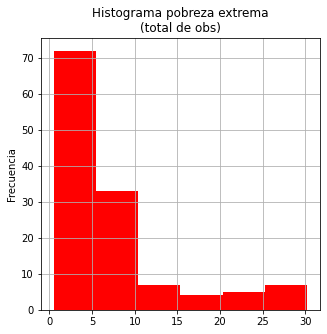

In [41]:
bd_cbp["pob_ext"].hist(bins="scott",color="r")
plt.title("Histograma pobreza extrema\n(total de obs)")
plt.ylabel("Frecuencia")
plt.show()

Por último, nos interesa conocer si es posible **identificar "a simple vista" posibles relaciones entre cada uno de los cinco delitos y las variables de ingreso, pobreza y pobreza extrema**, respectivamente:

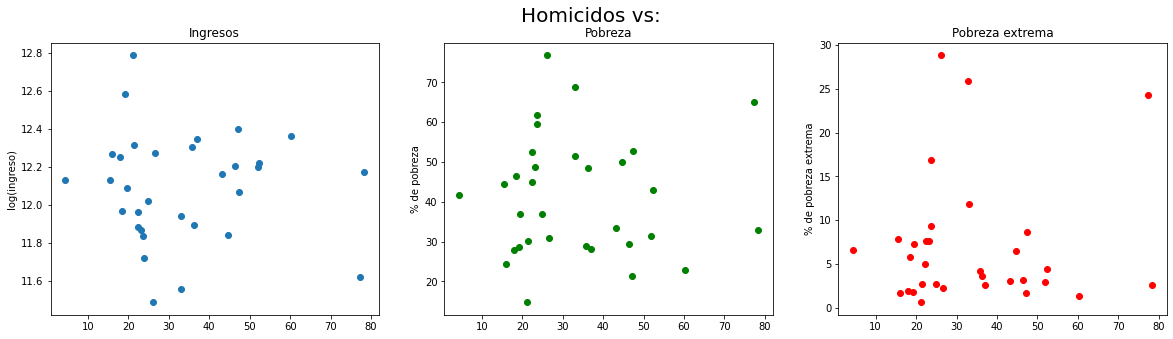

In [42]:
plt.rcParams["figure.figsize"] = [20,5]

plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_hom"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_hom"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_hom"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Homicidos vs:",fontsize=20)
plt.show()

A simple vista, no parece haber una clara relación entre los homicidios y las variables de ingreso y pobreza

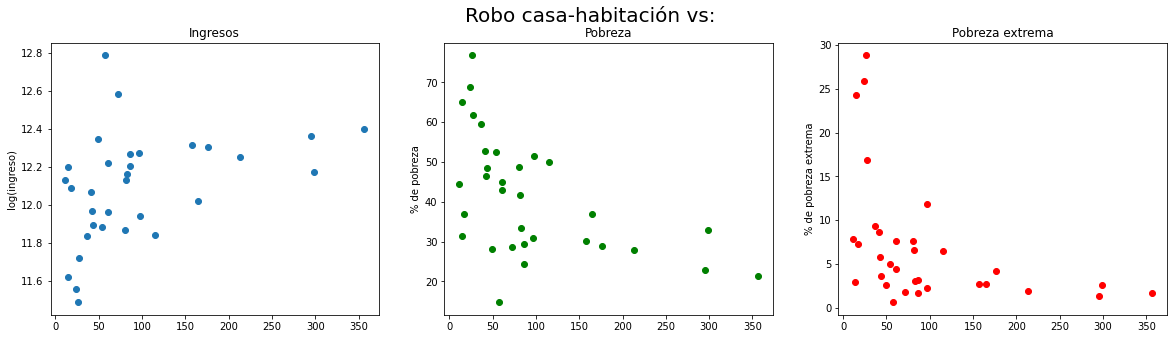

In [43]:
plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_rcasa"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_rcasa"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_rcasa"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Robo casa-habitación vs:",fontsize=20)
plt.show()

Respecto al robo a casa-habitación, a simple vista parecería existir una relación positiva con los ingresos, y  negativa con la pobreza y pobreza extrema

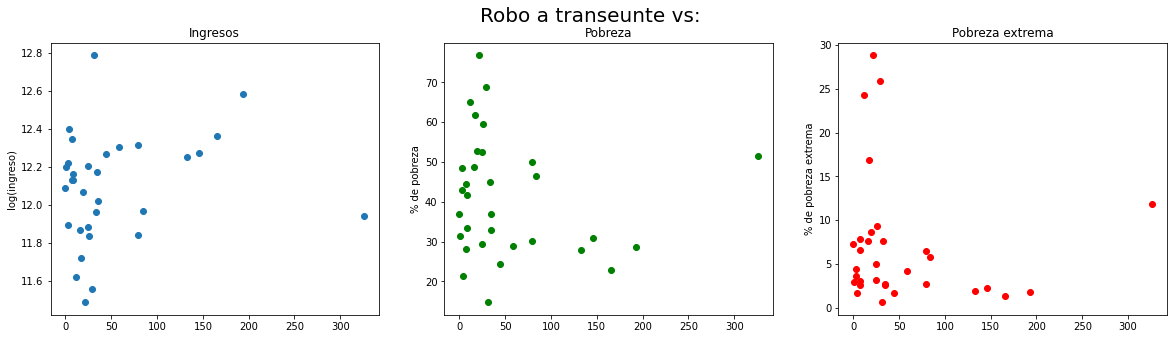

In [44]:
plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_rcalle"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_rcalle"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_rcalle"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Robo a transeunte vs:",fontsize=20)
plt.show()

A simple vista se identifica una relación positiva entre el robo a transeúnte y el nivel de ingreso promedio. Sin embargo, la relación no es del todo clara con pobreza y pobreza extrema.

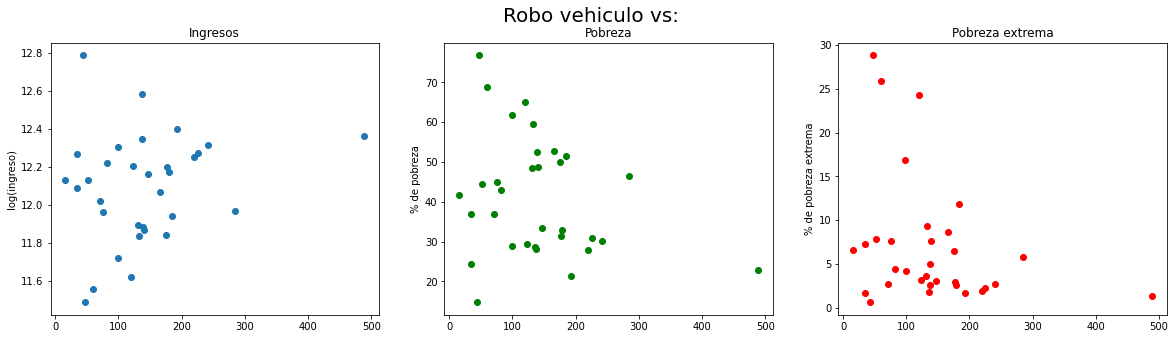

In [45]:
plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_rcarro"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_rcarro"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_rcarro"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Robo vehiculo vs:",fontsize=20)
plt.show()

En cuanto al robo de vehículo, a simple vista se observa una relación positiva con el nivel de ingresos promedio, y negativa con el porcentaje de pobreza y pobreza extrema

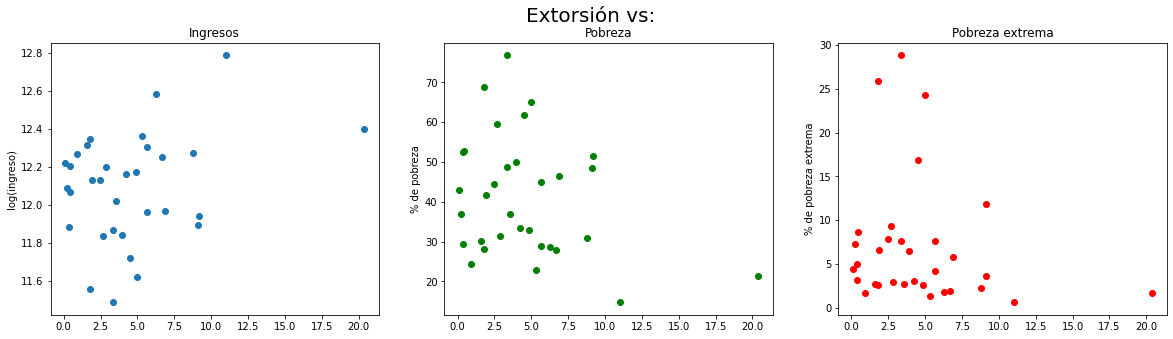

In [46]:
plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_extor"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_extor"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_extor"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Extorsión vs:",fontsize=20)
plt.show()

De manera similar, a simple vista se identifica una posible relación positiva entre la tasa de incidencia de extorsión por cada 100 mil habitantes y el ingreso promedio. En sentido contrario, la pobreza y la pobreza extrema parecen tener una relación negativa con la incidencia de extorsión.


El análisis anterior ("a simple vista") puede robustecerse a través del cálculo de la **matriz de correlación**. Las entradas de la matriz cercanas a 1 (-1) nos indican una correlación fuerte y positiva (negativa). Un valor del coeficiente cercano a cero, indica lo contrario.

In [47]:
bdprom.corr()

tasa_hom  tasa_rcasa  tasa_rcalle  tasa_rcarro  tasa_extor  \
tasa_hom     1.000000    0.329604    -0.078550     0.360948    0.088229   
tasa_rcasa   0.329604    1.000000     0.252246     0.525112    0.499346   
tasa_rcalle -0.078550    0.252246     1.000000     0.487491    0.273541   
tasa_rcarro  0.360948    0.525112     0.487491     1.000000    0.257767   
tasa_extor   0.088229    0.499346     0.273541     0.257767    1.000000   
ingreso     -0.066122    0.351012     0.182228     0.147220    0.330738   
pob_ext      0.071992   -0.437811    -0.112894    -0.306711   -0.175935   
pobreza     -0.002613   -0.529621    -0.141287    -0.264225   -0.294285   

              ingreso   pob_ext   pobreza  
tasa_hom    -0.066122  0.071992 -0.002613  
tasa_rcasa   0.351012 -0.437811 -0.529621  
tasa_rcalle  0.182228 -0.112894 -0.141287  
tasa_rcarro  0.147220 -0.306711 -0.264225  
tasa_extor   0.330738 -0.175935 -0.294285  
ingreso      1.000000 -0.714187 -0.883931  
pob_ext     -0.714187  1.000000  0.872116  
pobreza     -0.883931  0.872116  1.000000

Para visualizar con mayor claridad, generamos un **gráfico con mapa de calor donde un color rojo (azul) más intenso muestra una correlación fuerte positiva (negativa)**.

Como se puede observar, no se identifica una correlación fuerte entre la tasa de homicidio y las variables de ingreso y pobreza. En todo caso, la incidencia del robo a casa-habitación parecería tener una relación ligeramente negativa con el nivel de pobreza.

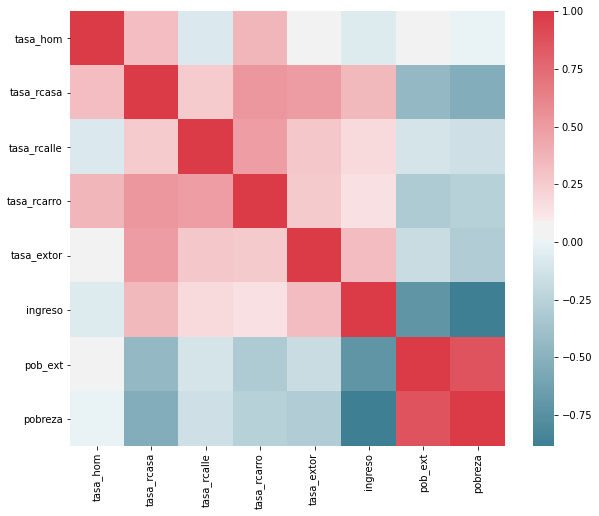

In [48]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = bdprom.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

Asimismo, para todas las observaciones de las variables de intreés, generamos gráficas de correlación en con mapa de calor para identificar los años. 

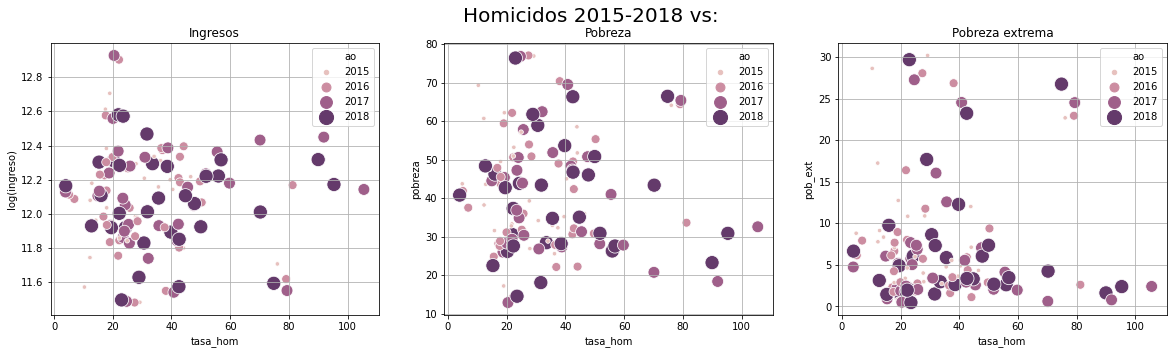

In [50]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_hom"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.ylabel("log(ingreso)")
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_hom"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_hom"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Homicidos 2015-2018 vs:",fontsize=20)
plt.show()

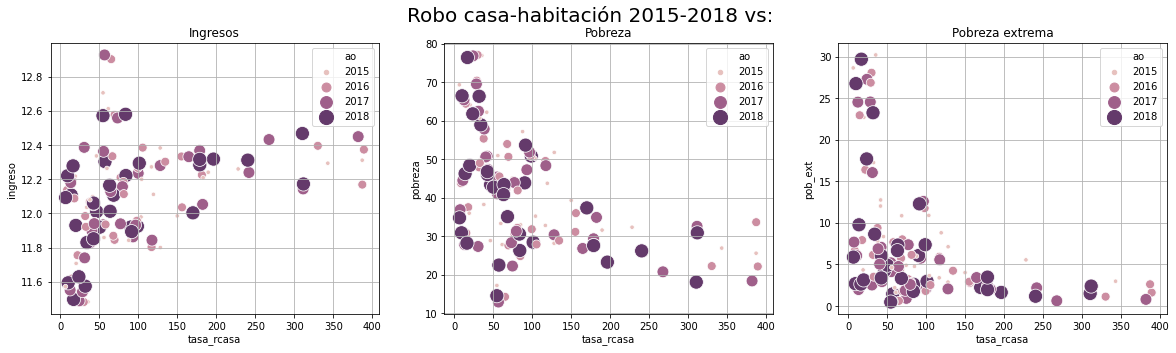

In [51]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcasa"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcasa"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcasa"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Robo casa-habitación 2015-2018 vs:",fontsize=20)
plt.show()

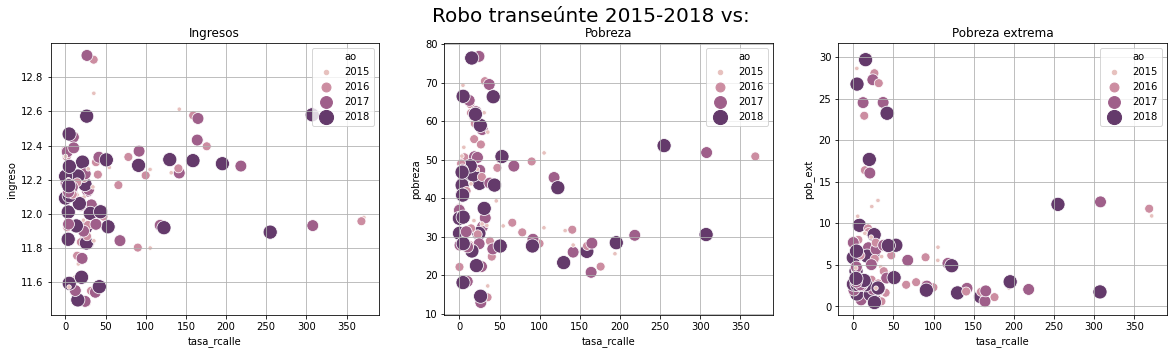

In [52]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcalle"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcalle"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcalle"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Robo transeúnte 2015-2018 vs:",fontsize=20)
plt.show()

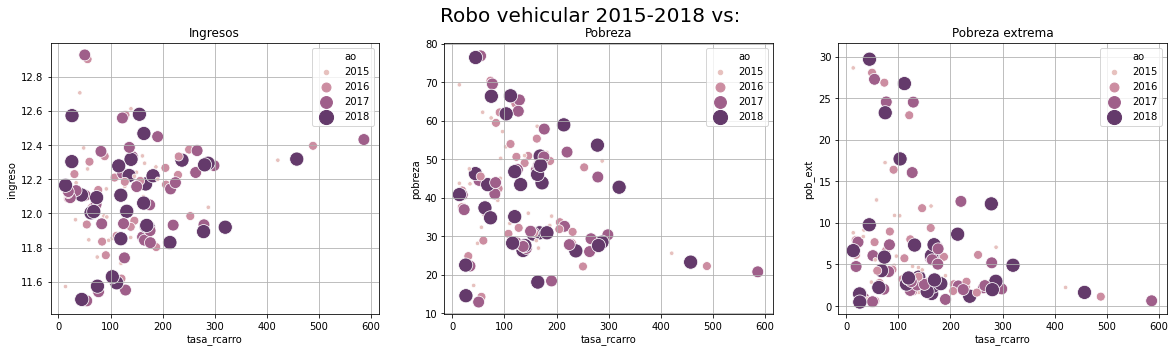

In [53]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcarro"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcarro"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcarro"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Robo vehicular 2015-2018 vs:",fontsize=20)
plt.show()

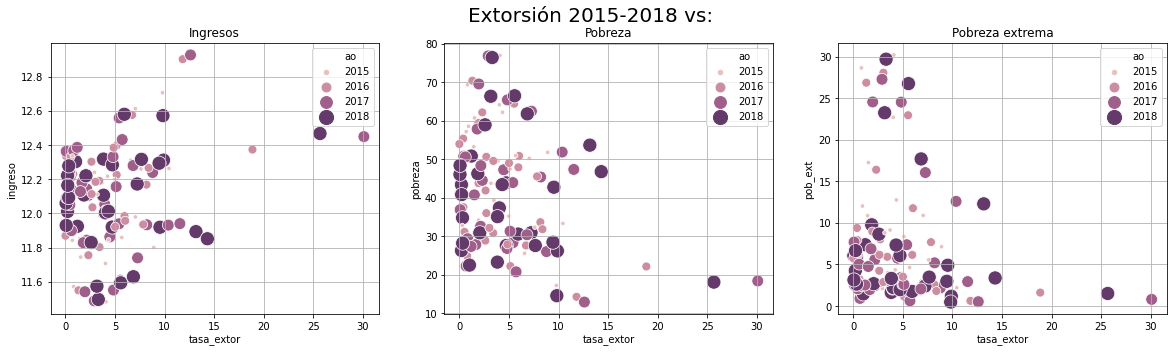

In [54]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_extor"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_extor"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_extor"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Extorsión 2015-2018 vs:",fontsize=20)
plt.show()

Y para el total de los datos (incluyendo los años 2015-2018), tenemos la matriz de correlación:

In [55]:
bd_cbp.corr()

ao  clave_ent  tasa_hom  tasa_rcasa  tasa_rcalle  \
ao           1.000000   0.000000  0.223696   -0.035318     0.020689   
clave_ent    0.000000   1.000000 -0.182055   -0.445257    -0.114571   
tasa_hom     0.223696  -0.182055  1.000000    0.291607    -0.059137   
tasa_rcasa  -0.035318  -0.445257  0.291607    1.000000     0.271720   
tasa_rcalle  0.020689  -0.114571 -0.059137    0.271720     1.000000   
tasa_rcarro  0.146643  -0.218151  0.352213    0.493425     0.455726   
tasa_extor   0.115479  -0.120830  0.153075    0.459362     0.237260   
ingreso     -0.008960  -0.212263 -0.058521    0.330763     0.171396   
pob_ext     -0.068031   0.079704  0.044064   -0.415766    -0.108577   
pobreza     -0.085919   0.245553 -0.020165   -0.502904    -0.135210   

             tasa_rcarro  tasa_extor   ingreso   pob_ext   pobreza  
ao              0.146643    0.115479 -0.008960 -0.068031 -0.085919  
clave_ent      -0.218151   -0.120830 -0.212263  0.079704  0.245553  
tasa_hom        0.352213    0.153075 -0.058521  0.044064 -0.020165  
tasa_rcasa      0.493425    0.459362  0.330763 -0.415766 -0.502904  
tasa_rcalle     0.455726    0.237260  0.171396 -0.108577 -0.135210  
tasa_rcarro     1.000000    0.237520  0.144936 -0.301457 -0.263641  
tasa_extor      0.237520    1.000000  0.300655 -0.159444 -0.273353  
ingreso         0.144936    0.300655  1.000000 -0.689606 -0.859067  
pob_ext        -0.301457   -0.159444 -0.689606  1.000000  0.868601  
pobreza        -0.263641   -0.273353 -0.859067  0.868601  1.000000

Y su respectivo gráfico de calor para mejor visualización:

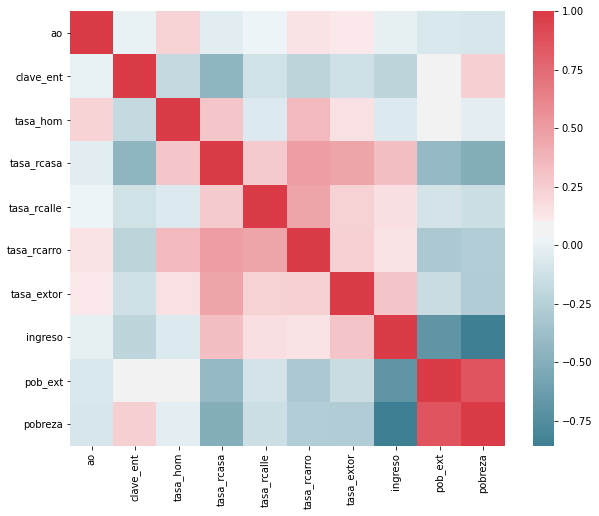

In [56]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = bd_cbp.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

##  Análisis de estadística descriptiva: desocupación y población por grupos de edad

### Desocupación

In [57]:
sns.set(style="ticks")

Se incluye en la gráfica de cada estado la tasa de desocupación promedio, el valor mínimo y máximo de 2015 a 2019 a nivel nacional

In [58]:
des_min = bd["desocupa"].min()

In [59]:
des_max = bd["desocupa"].max() 

In [60]:
des_med = bd["desocupa"].mean()

Se genera gráfica sobre la evolución de la tasa de desocupación por entidad federativa, con base en 
http://seaborn.pydata.org/examples/many_facets.html,  https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

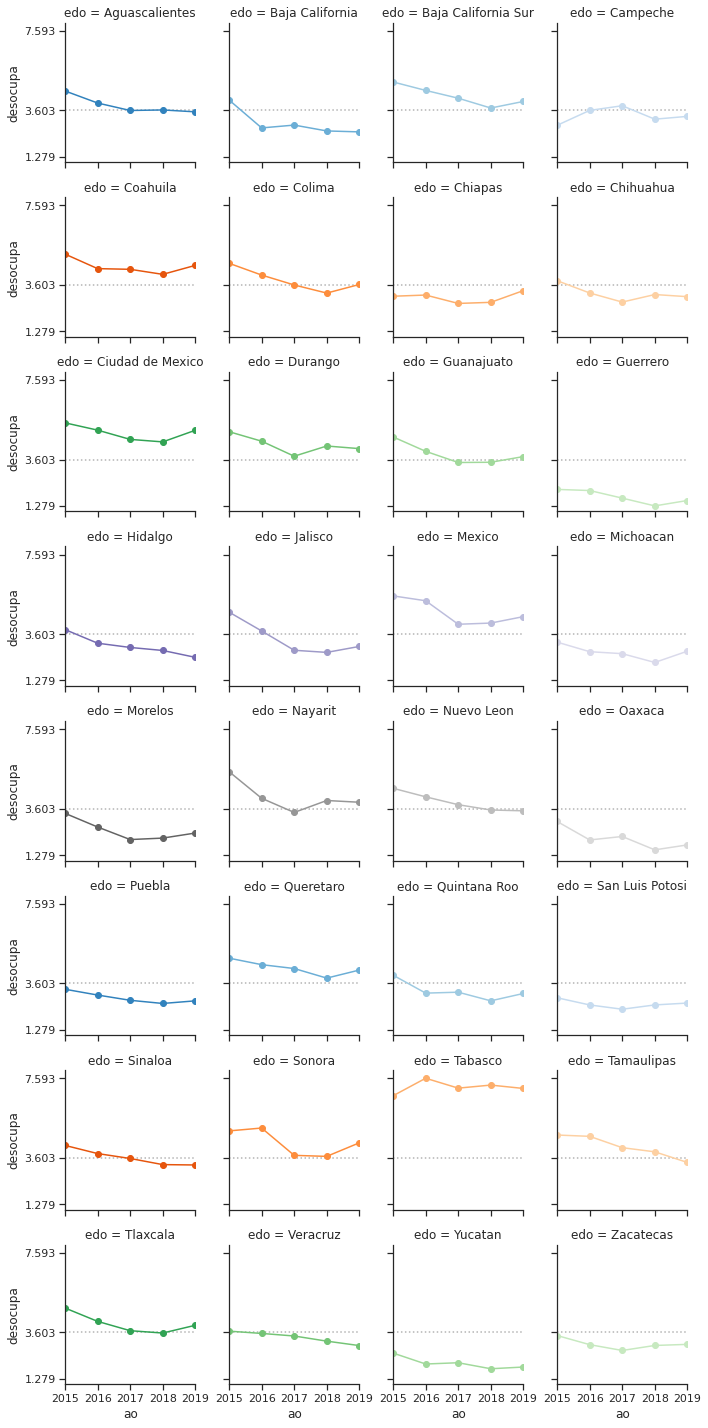

In [61]:
grid = sns.FacetGrid(bd, col="edo", hue="edo", palette="tab20c",
                     col_wrap=4, height=2.5) 
grid.map(plt.axhline, y=des_med, ls=":", c="0.7") 
grid.map(plt.plot, "ao", "desocupa",  marker="o") 
grid.set(xticks=np.arange(2015,2020), yticks=[des_min, des_med,des_max],
         xlim=(2015, 2019),ylim=(1, 8)) 
grid.fig.tight_layout(w_pad=0.5)

La tasa de desocupación presenta una evolución distinta por entidad federativa de 2015 a 2019. 
Guerrero, Oaxaca, Yucatán destacan por tener tasas de desocupación por debajo de la media nacional,
lo cual podría estar relacionado con la forma de captar la variables. De acuerdo al INEGI, la tasa de desocupación 
se refiere al porcentaje de la Población Económicamente Activa (PEA) que no trabajó siquiera una hora durante la semana de
referencia de la encuesta pero manifestó su disposición para hacerlo e hizo alguna actividad por obtener empleo. Por el contrario, el estado de Tabasco muestra una tasa de desocupación de alrededor del 7%, la máxima comparada con el resto de entidades federativas.

### Población por grupos de edad: 15 a 24 años y 25 a 34 años

La evidencia y la literatura señalan que la edad más probablie para cometer delitos se encuentra entre los 15 y 35 años,
por tal razón elegimos dos grupos de edad para ser incluidos en el análisis. El primer grupo de 15 a 24 años y el segundo de 25 a 34 años. Con el fin de realizar una comparación entre entidades federativas, de 2015 a 2019, presentamos la proporción de población de estos grupos de edad respecto al total de población de cada entidad.

In [62]:
bd["prop15a24"]=bd["edad15a24"]*100/bd["pob_tot"]

In [63]:
bd["prop25a34"]=bd["edad25a34"]*100/bd["pob_tot"]

In [64]:
print(bd[0:2])

     ao  clave_ent             edo  homicidio  robocasa  robocalle  robocarro  \
0  2015          1  Aguascalientes        211      2525       1754       1995   
1  2016          1  Aguascalientes        233      2459       1353       3110   

   extorsion  tasa_hom  tasa_rcasa  ...  edad25a34  edad35a44  edad45mas  \
0         39     15.84      189.59  ...     211782     175356     296621   
1         70     17.19      181.43  ...     217183     178187     308198   

   pob_tot         pibe   ingreso  pob_ext  pobreza  prop15a24  prop25a34  
0  1331825  198220.6406  207024.0     2.09    31.58  19.195390  15.901639  
1  1355321  211672.4688  203879.0     2.30    28.22  19.090164  16.024469  

[2 rows x 25 columns]


In [65]:
p1524_min = bd["prop15a24"].min()
p1524_max = bd["prop15a24"].max() 
p1524_med = bd["prop15a24"].mean()

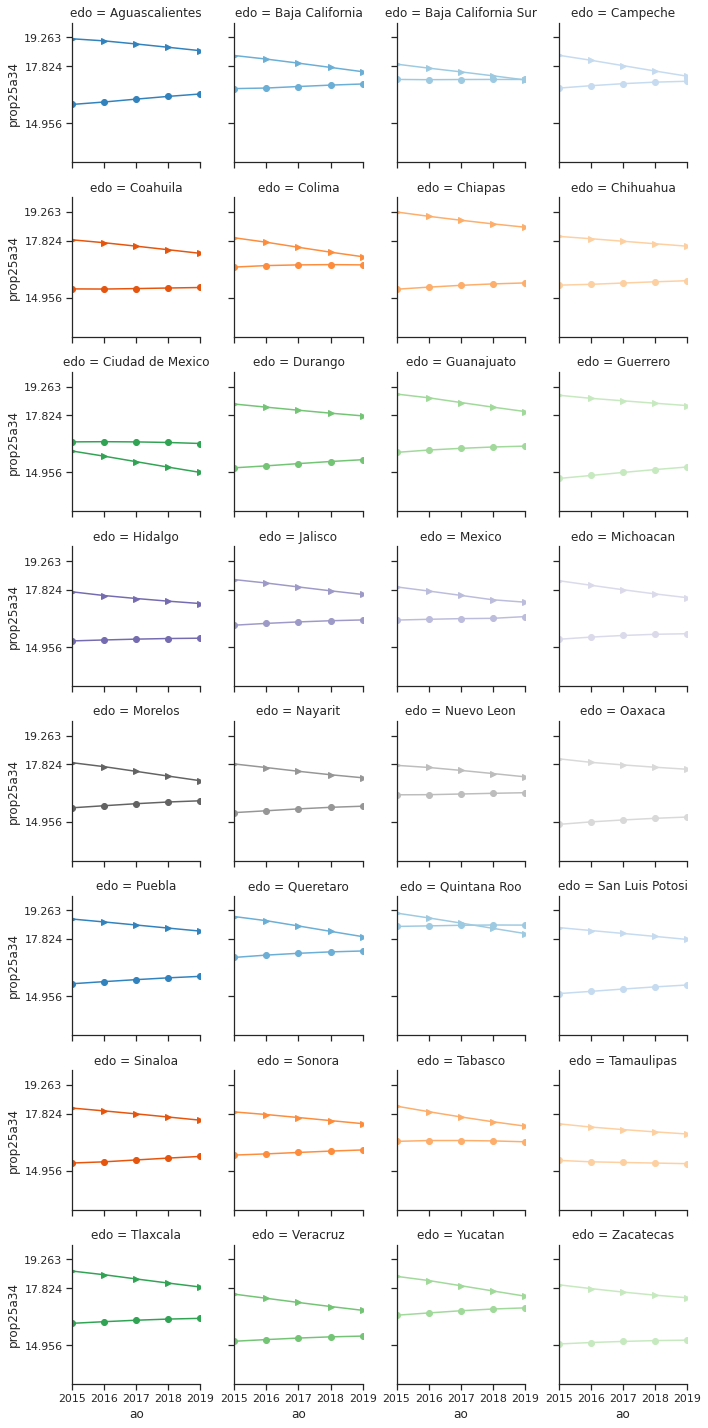

In [66]:
grid = sns.FacetGrid(bd, col="edo", hue="edo", palette="tab20c",
                     col_wrap=4, height=2.5)
grid.map(plt.axhline, y=des_med, ls=":", c="0.7") 
grid.map(plt.plot, "ao", "prop15a24",  marker=">")
grid.map(plt.plot, "ao", "prop25a34",  marker="o")
grid.set(xticks=np.arange(2015,2020), yticks=[p1524_min, p1524_med,p1524_max],
         xlim=(2015, 2019),ylim=(13, 20)) 
grid.fig.tight_layout(w_pad=0.5)

#### Edad de la población vs desocupación

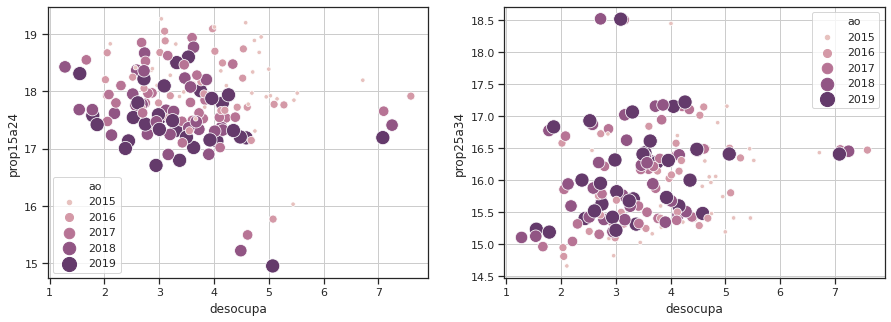

In [70]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax = sns.scatterplot(x="desocupa", y="prop15a24",
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd)
plt.grid(True)

plt.subplot(1,2,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="desocupa", y="prop25a34",
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd)
plt.grid(True)

La desocupación, la proporción de población de 15 a 24 años y la proporción de población de 25 a 34 años tienen una relación diversa entre los estados. La varianza observada entre estas variables se torna útil para la estimación del modelo en el que incluiremos estas variables.

#### Población de 25 a 34 años vs robo de autos

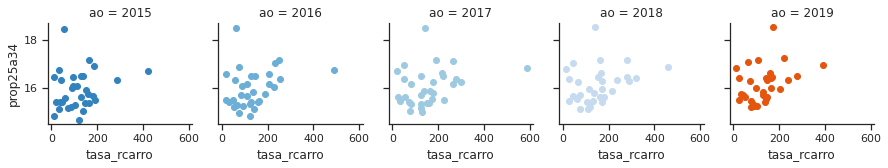

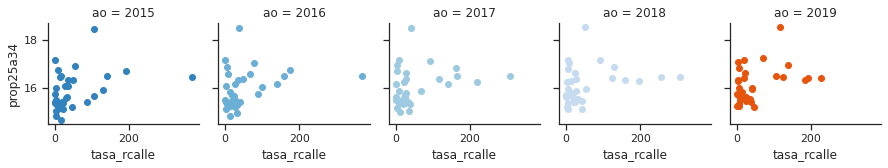

In [71]:
grid = sns.FacetGrid(bd, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, "tasa_rcarro", "prop25a34",  marker="o");
grid = sns.FacetGrid(bd, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, "tasa_rcalle", "prop25a34",  marker="o");


Las relación entre robo a transeúnte (por cada 100 mil habitantes, tasa_rcalle), robo de vehículos (por cada 100 mil habitantes, tasa_rcarro) y población de 25 a 34 años difiere por entidad federativa, presenta ligera evolución en el periodo analizado y muestra una entidad con comportamiento que sobresale del resto, la Ciudad de México (presenta el máximo robo a casa habitación). 

## Análisis de estadística descriptiva: delitos

### Homicidios

In [72]:
hom= bd[['ao','clave_ent', 'edo', 'homicidio', 'tasa_hom']]

In [73]:
hom_pivot= pd.pivot_table(hom, values=['homicidio'], index=['ao'],aggfunc=np.sum)
hom_xhabs_pivot= pd.pivot_table(hom, values=['tasa_hom'], index=['ao'],aggfunc=np.sum)
hom_y_xhabs= pd.pivot_table(hom, values=['homicidio', 'tasa_hom'], index=['ao'],aggfunc=np.sum)
hom_y_xhabs

homicidio  tasa_hom
ao                       
2015      31192    865.14
2016      35324    996.92
2017      41327   1201.00
2018      44490   1218.51
2019      44599   1214.15

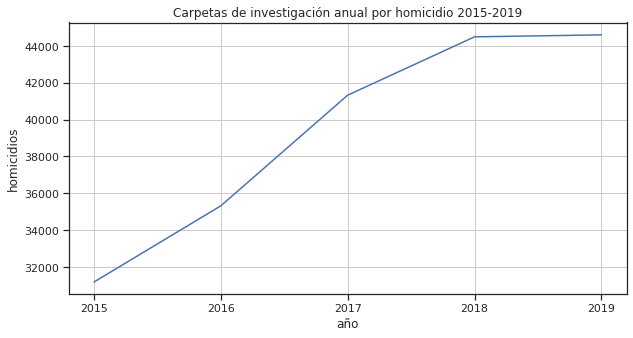

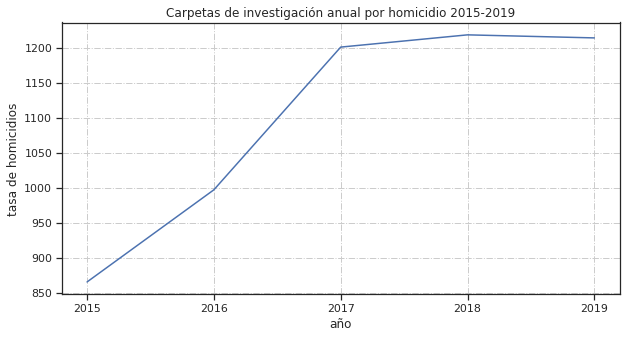

In [74]:
plt.figure(figsize=(10,5))
plt.plot(hom_pivot)
plt.title("Carpetas de investigación anual por homicidio 2015-2019")
plt.ylabel('homicidios')
plt.xlabel('año')
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hom_xhabs_pivot)
plt.title("Carpetas de investigación anual por homicidio 2015-2019")
plt.ylabel('tasa de homicidios')
plt.xlabel('año')
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.show()


Año con año se ha visto un incrememto en el número de homicidios pero si se controla por población, 2019 presenta una reducción en comparación con 2018.

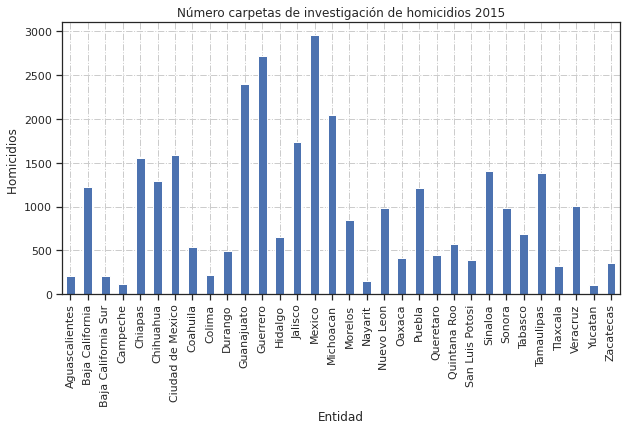

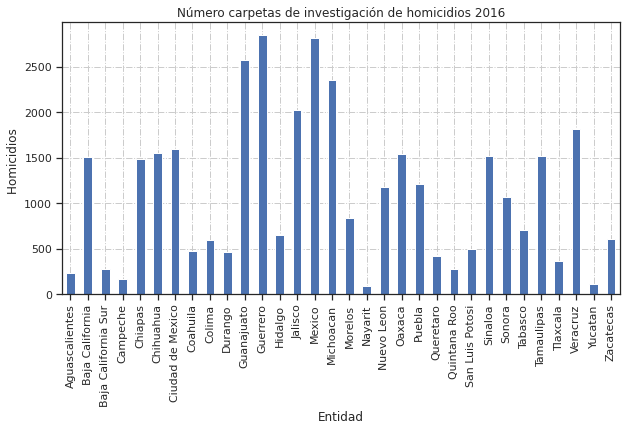

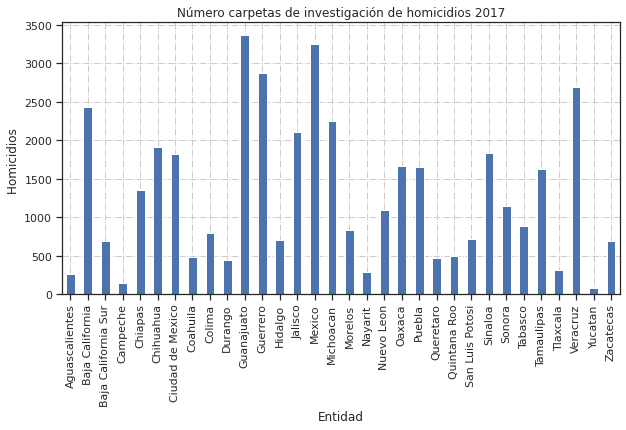

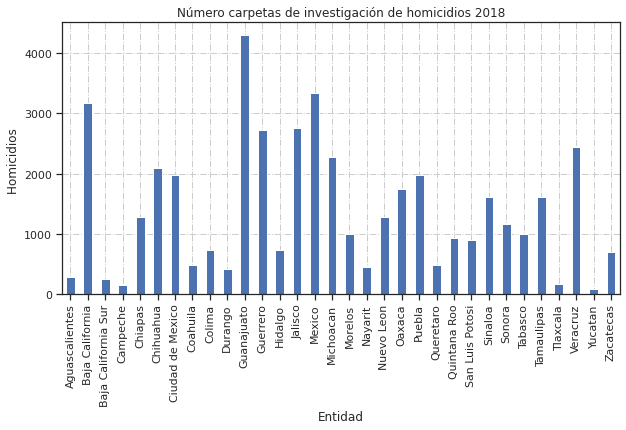

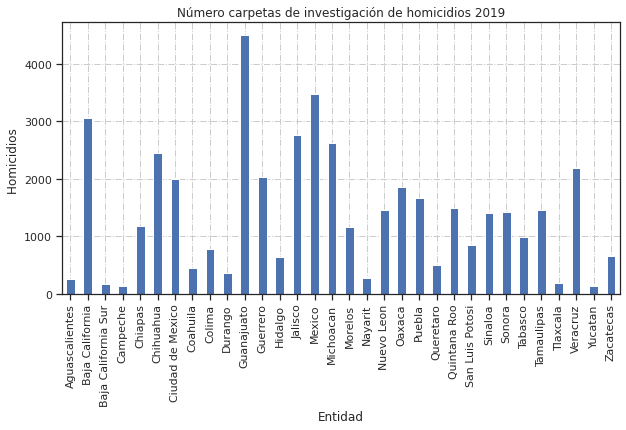

In [77]:
plt.figure(figsize=(10,5))

plot2016 = hom[hom.ao == 2015].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2015")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plot2017 = hom[hom.ao == 2016].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2016")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plot2017 = hom[hom.ao == 2017].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2017")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plot2018 = hom[hom.ao == 2018].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2018")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plot2019 = hom[hom.ao == 2019].groupby("edo")["homicidio"].sum().plot(kind="bar")
plt.ylabel("Homicidios ")
plt.xlabel("Entidad")
plt.title("Número carpetas de investigación de homicidios 2019")
plt.grid(True)
plt.show()

In [78]:
hom_por_ent= pd.pivot_table(hom, values=['tasa_hom'], index=['ao'], columns=['edo'],aggfunc=np.sum)
hom_por_ent

tasa_hom                                                       \
edo  Aguascalientes Baja California Baja California Sur Campeche Chiapas   
ao                                                                         
2015          15.84           36.30               27.92    12.87   29.24   
2016          17.19           44.16               36.91    17.89   27.44   
2017          18.75           70.17               91.88    14.94   24.69   
2018          20.28           89.97               31.64    16.02   22.99   
2019          19.00           85.59               21.32    13.62   21.00   

                                                          ...               \
edo  Chihuahua Ciudad de Mexico Coahuila  Colima Durango  ... Quintana Roo   
ao                                                        ...                
2015     35.56            17.50    17.83   30.76   27.73  ...        37.45   
2016     42.39            17.61    15.61   81.26   25.75  ...        17.76   
2017     51.72            20.07    15.42  105.54   24.24  ...        30.96   
2018     55.98            21.92    15.33   95.35   22.22  ...        56.89   
2019     65.04            22.12    14.14  100.80   19.70  ...        89.05   

                                                                          \
edo  San Luis Potosi Sinaloa Sonora Tabasco Tamaulipas Tlaxcala Veracruz   
ao                                                                         
2015           14.21   46.55  34.08   28.23      39.57    24.94    12.23   
2016           17.98   49.71  36.54   28.45      42.90    27.62    21.85   
2017           25.40   59.76  38.79   35.71      45.51    23.96    32.09   
2018           31.82   51.79  38.57   39.79      44.76    12.76    28.92   
2019           29.97   44.94  46.78   39.15      40.13    14.15    25.74   

                        
edo  Yucatan Zacatecas  
ao                      
2015    4.89     22.29  
2016    5.10     37.67  
2017    3.90     42.34  
2018    3.99     42.62  
2019    5.95     40.25  

[5 rows x 32 columns]

In [89]:
hom_por_ao= pd.pivot_table(hom, values=['tasa_hom'], index=['edo'], columns=['ao'],aggfunc=np.sum)
hom_por_ao.head()

tasa_hom                            
ao                      2015   2016   2017   2018   2019
edo                                                     
Aguascalientes         15.84  17.19  18.75  20.28  19.00
Baja California        36.30  44.16  70.17  89.97  85.59
Baja California Sur    27.92  36.91  91.88  31.64  21.32
Campeche               12.87  17.89  14.94  16.02  13.62
Chiapas                29.24  27.44  24.69  22.99  21.00

<Figure size 1440x720 with 0 Axes>

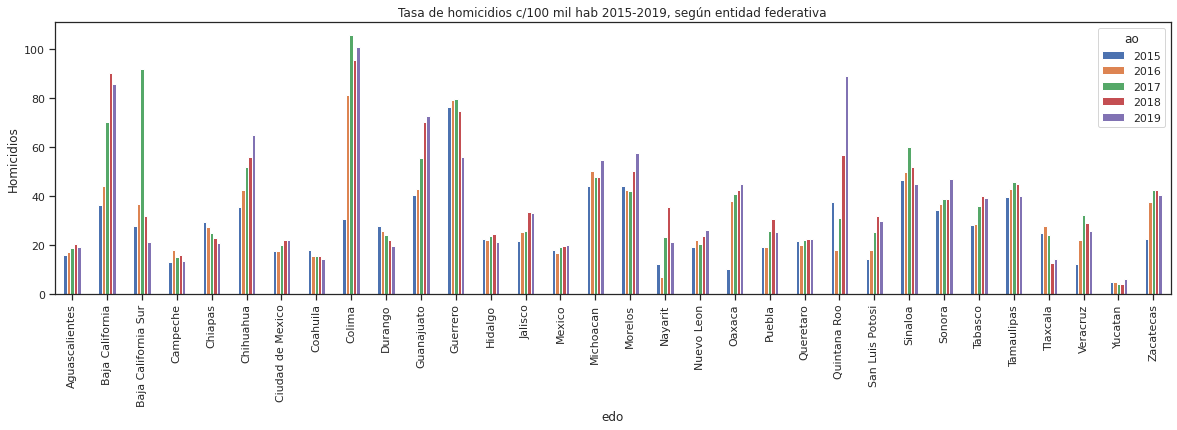

In [81]:
plt.figure(figsize=(20,10))
pd.pivot_table(hom, index= 'edo', columns= 'ao', values= "tasa_hom").plot(kind= 'bar')
plt.ylabel("Homicidios")
plt.title("Tasa de homicidios c/100 mil hab 2015-2019, según entidad federativa")
plt.show()

In [82]:
aos=["2015","2016","2017","2018", '2019']


In [83]:
num_edo=np.arange(1,33,1)
num_edo

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [84]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=hom.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)

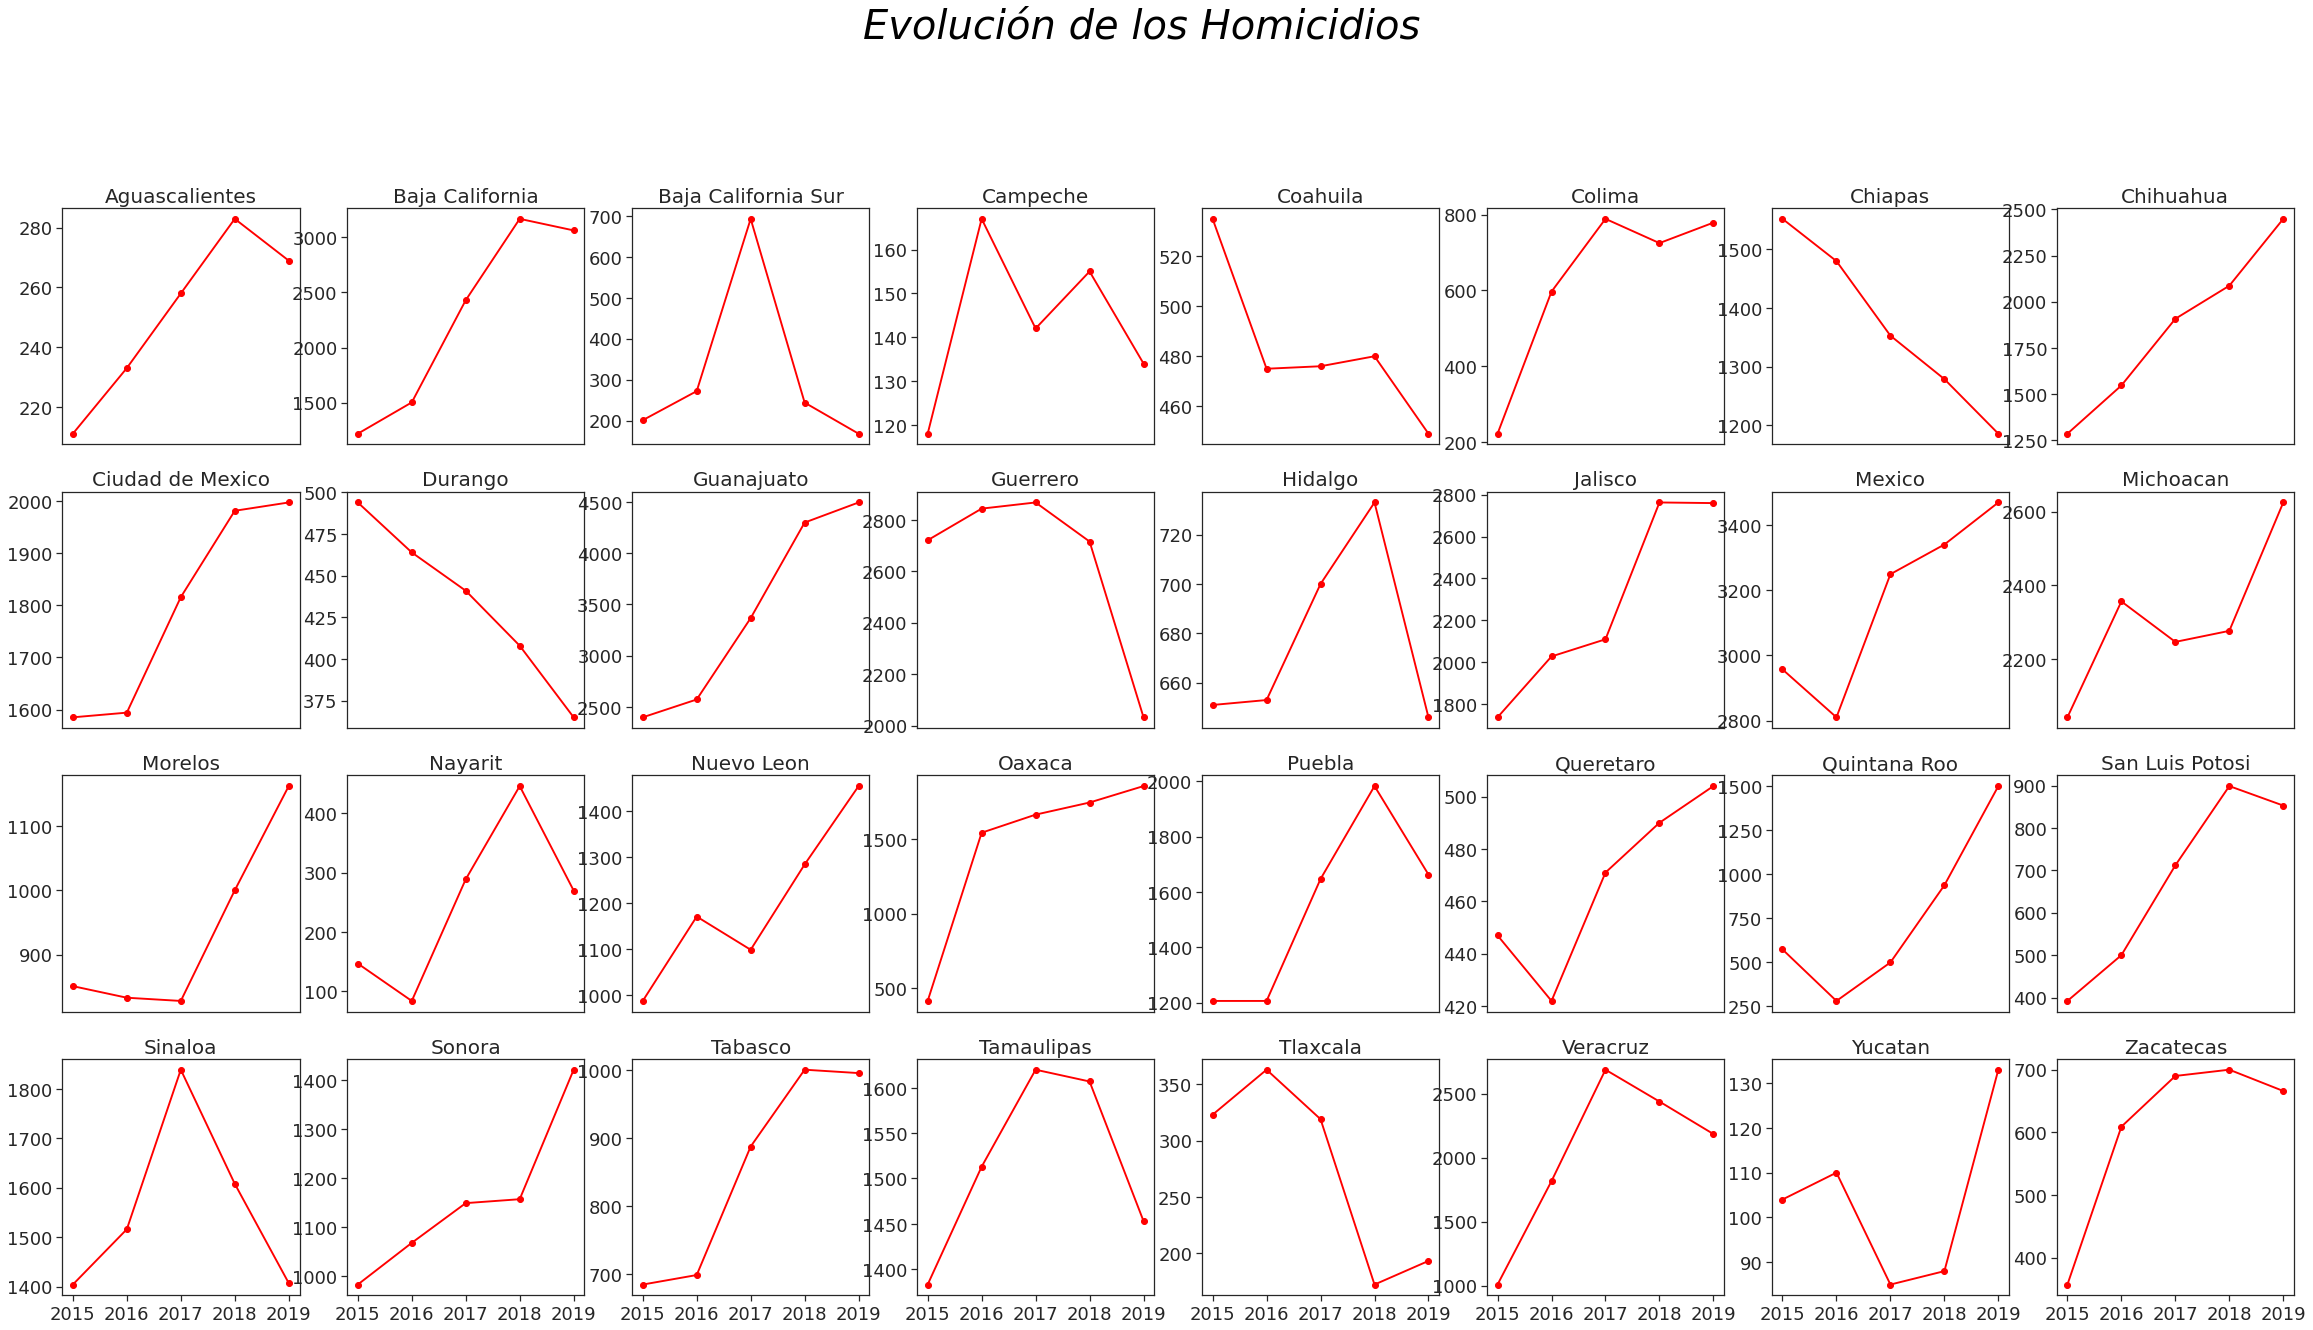

In [88]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(aos, ent[i].homicidio, marker="o", linewidth=1.9, color='red')
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución de los Homicidios",fontsize=40, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

El siguiente diagrama especifica cómo se han comportado los homicidios de 2015 a 2019.

Han aumentado en:


Aguascalites, Baja California,  Campeche, Colima, Chihuahua,
CDMX, Guanajuato, Jalisco, México, Michoacán, Morelos, Nuevo León, Oaxaca, Puebla, Querétaro, QUintana Roo, San Luis Potosí, Sonora, Tabasco, Tamaulipas, Veracruz, Yucatán y Zacatecas.

Disminuido en:


Coahuila, Chiapas, Durango, Guerrero.


Permanecido constante en:
Baja California Sur, Campeche, Hidalgo y Sinaloa

### Robo a casa habitación

Durante 2015-2019, el robo a casa habitación en las entidades del país ha evolucionado de la siguiente manera:

In [92]:
casahab= bd[['ao','clave_ent', 'edo', 'robocasa', 'tasa_rcasa']]

In [94]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=casahab.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)

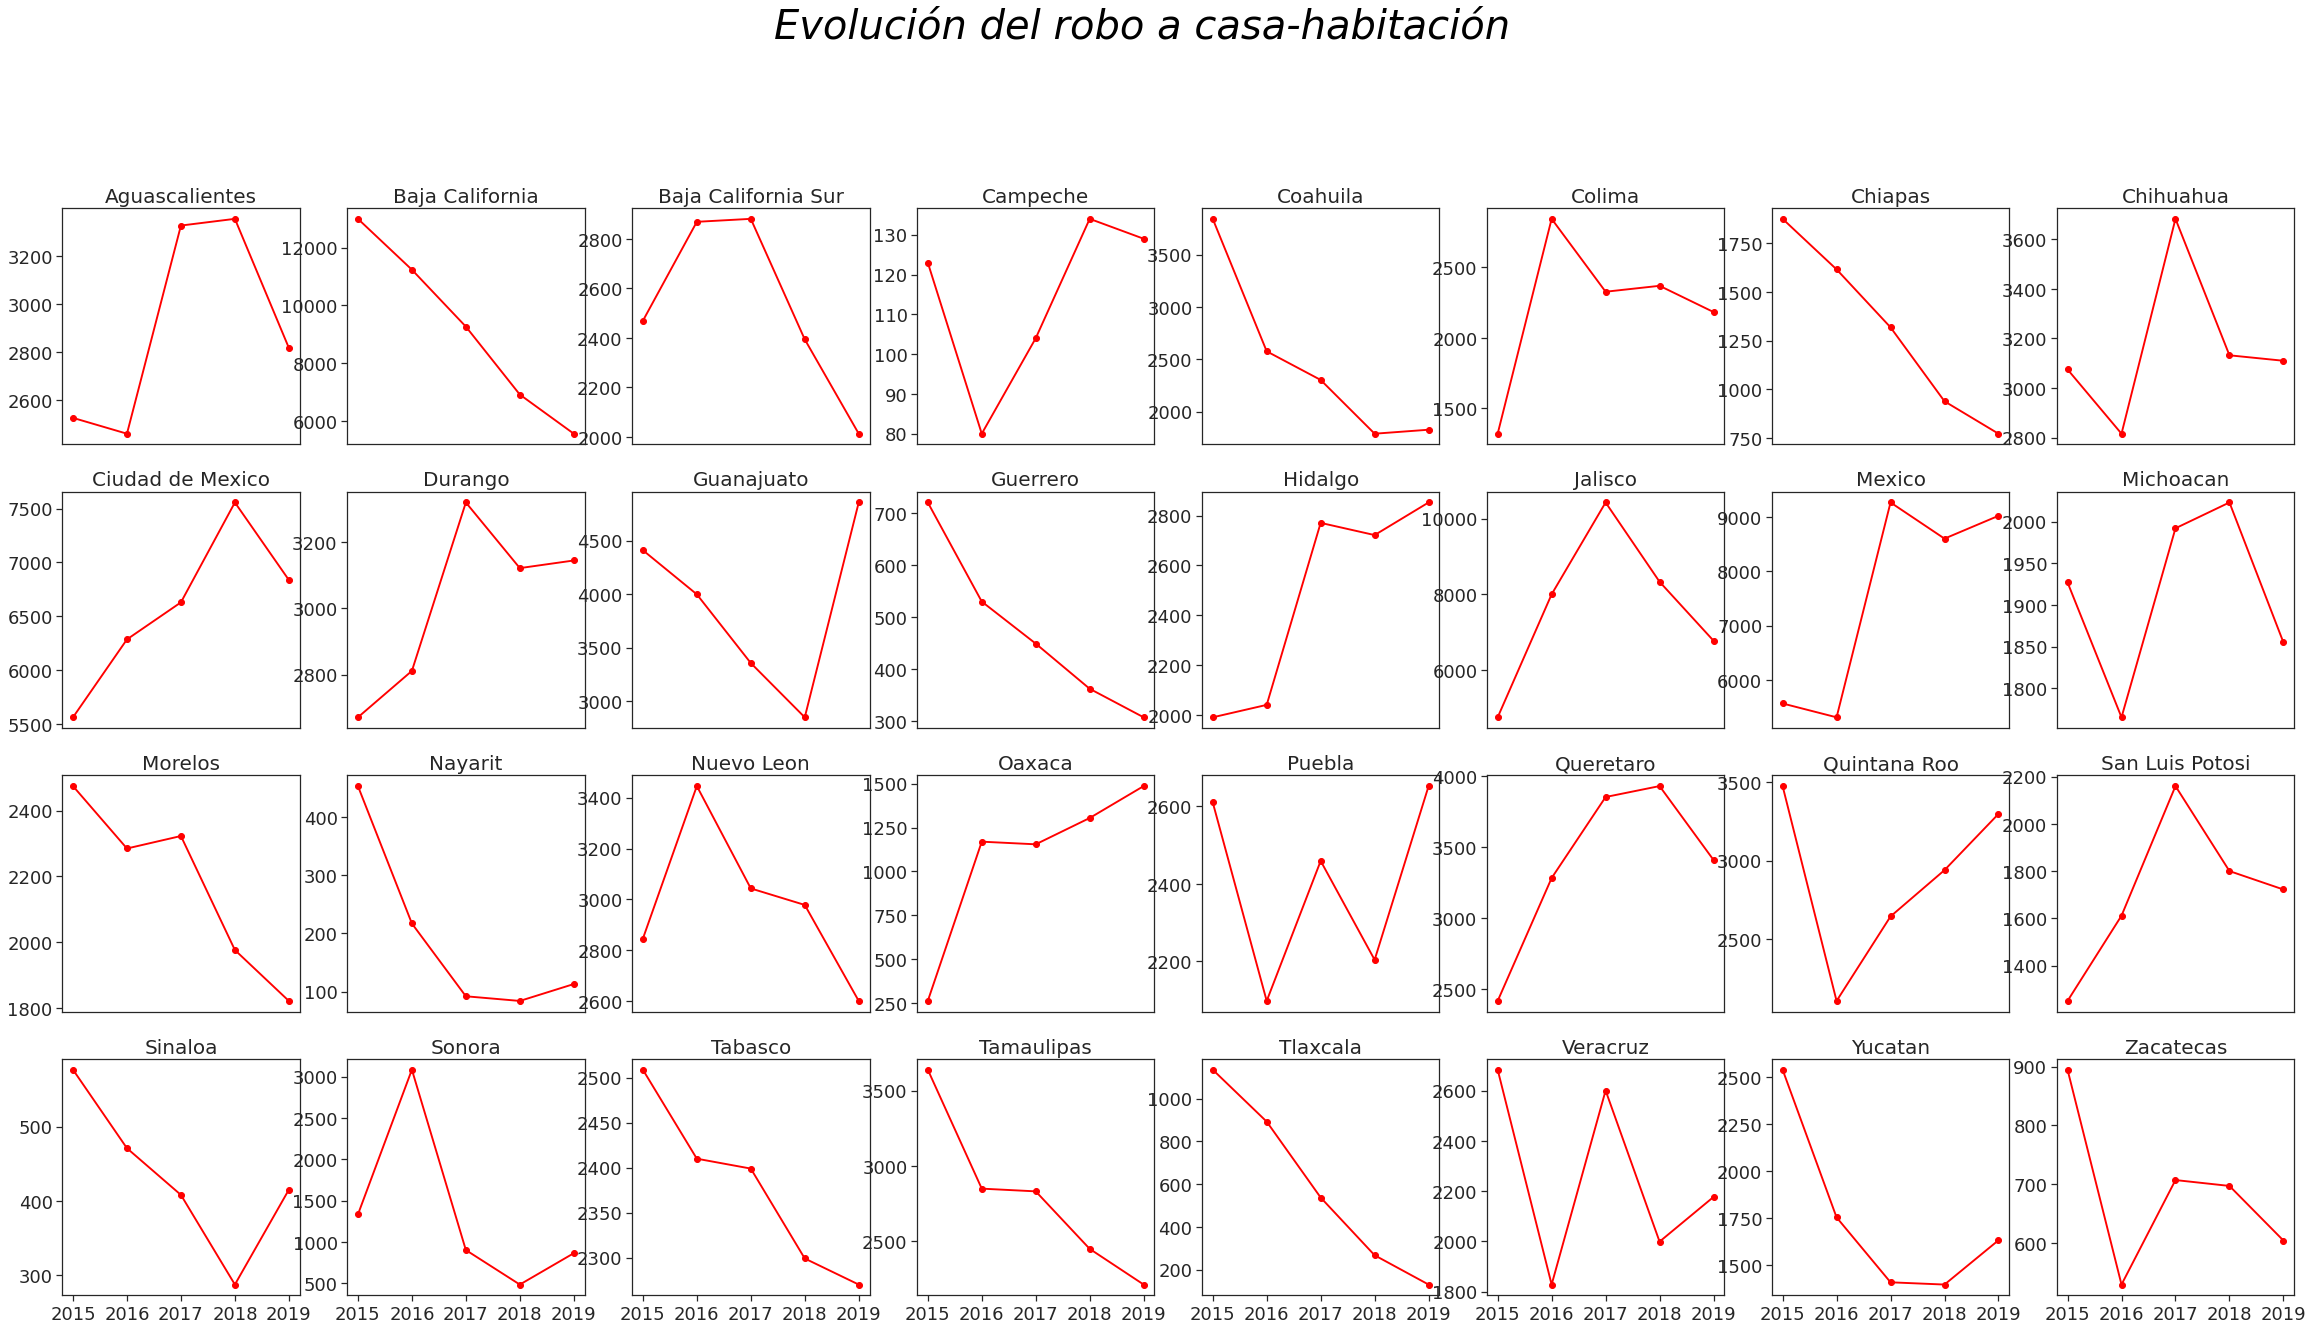

In [95]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(aos, ent[i].robocasa, marker="o", linewidth=1.9, color='red')
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución del robo a casa-habitación",fontsize=40, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

### Robo a transeúnte

Durante 2015-2019, el robo a transeúnte en las entidades del país ha evolucionado de la siguiente manera:

In [107]:
calle= bd[['ao','clave_ent', 'edo', 'robocalle', 'tasa_rcalle']]

In [108]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=calle.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)

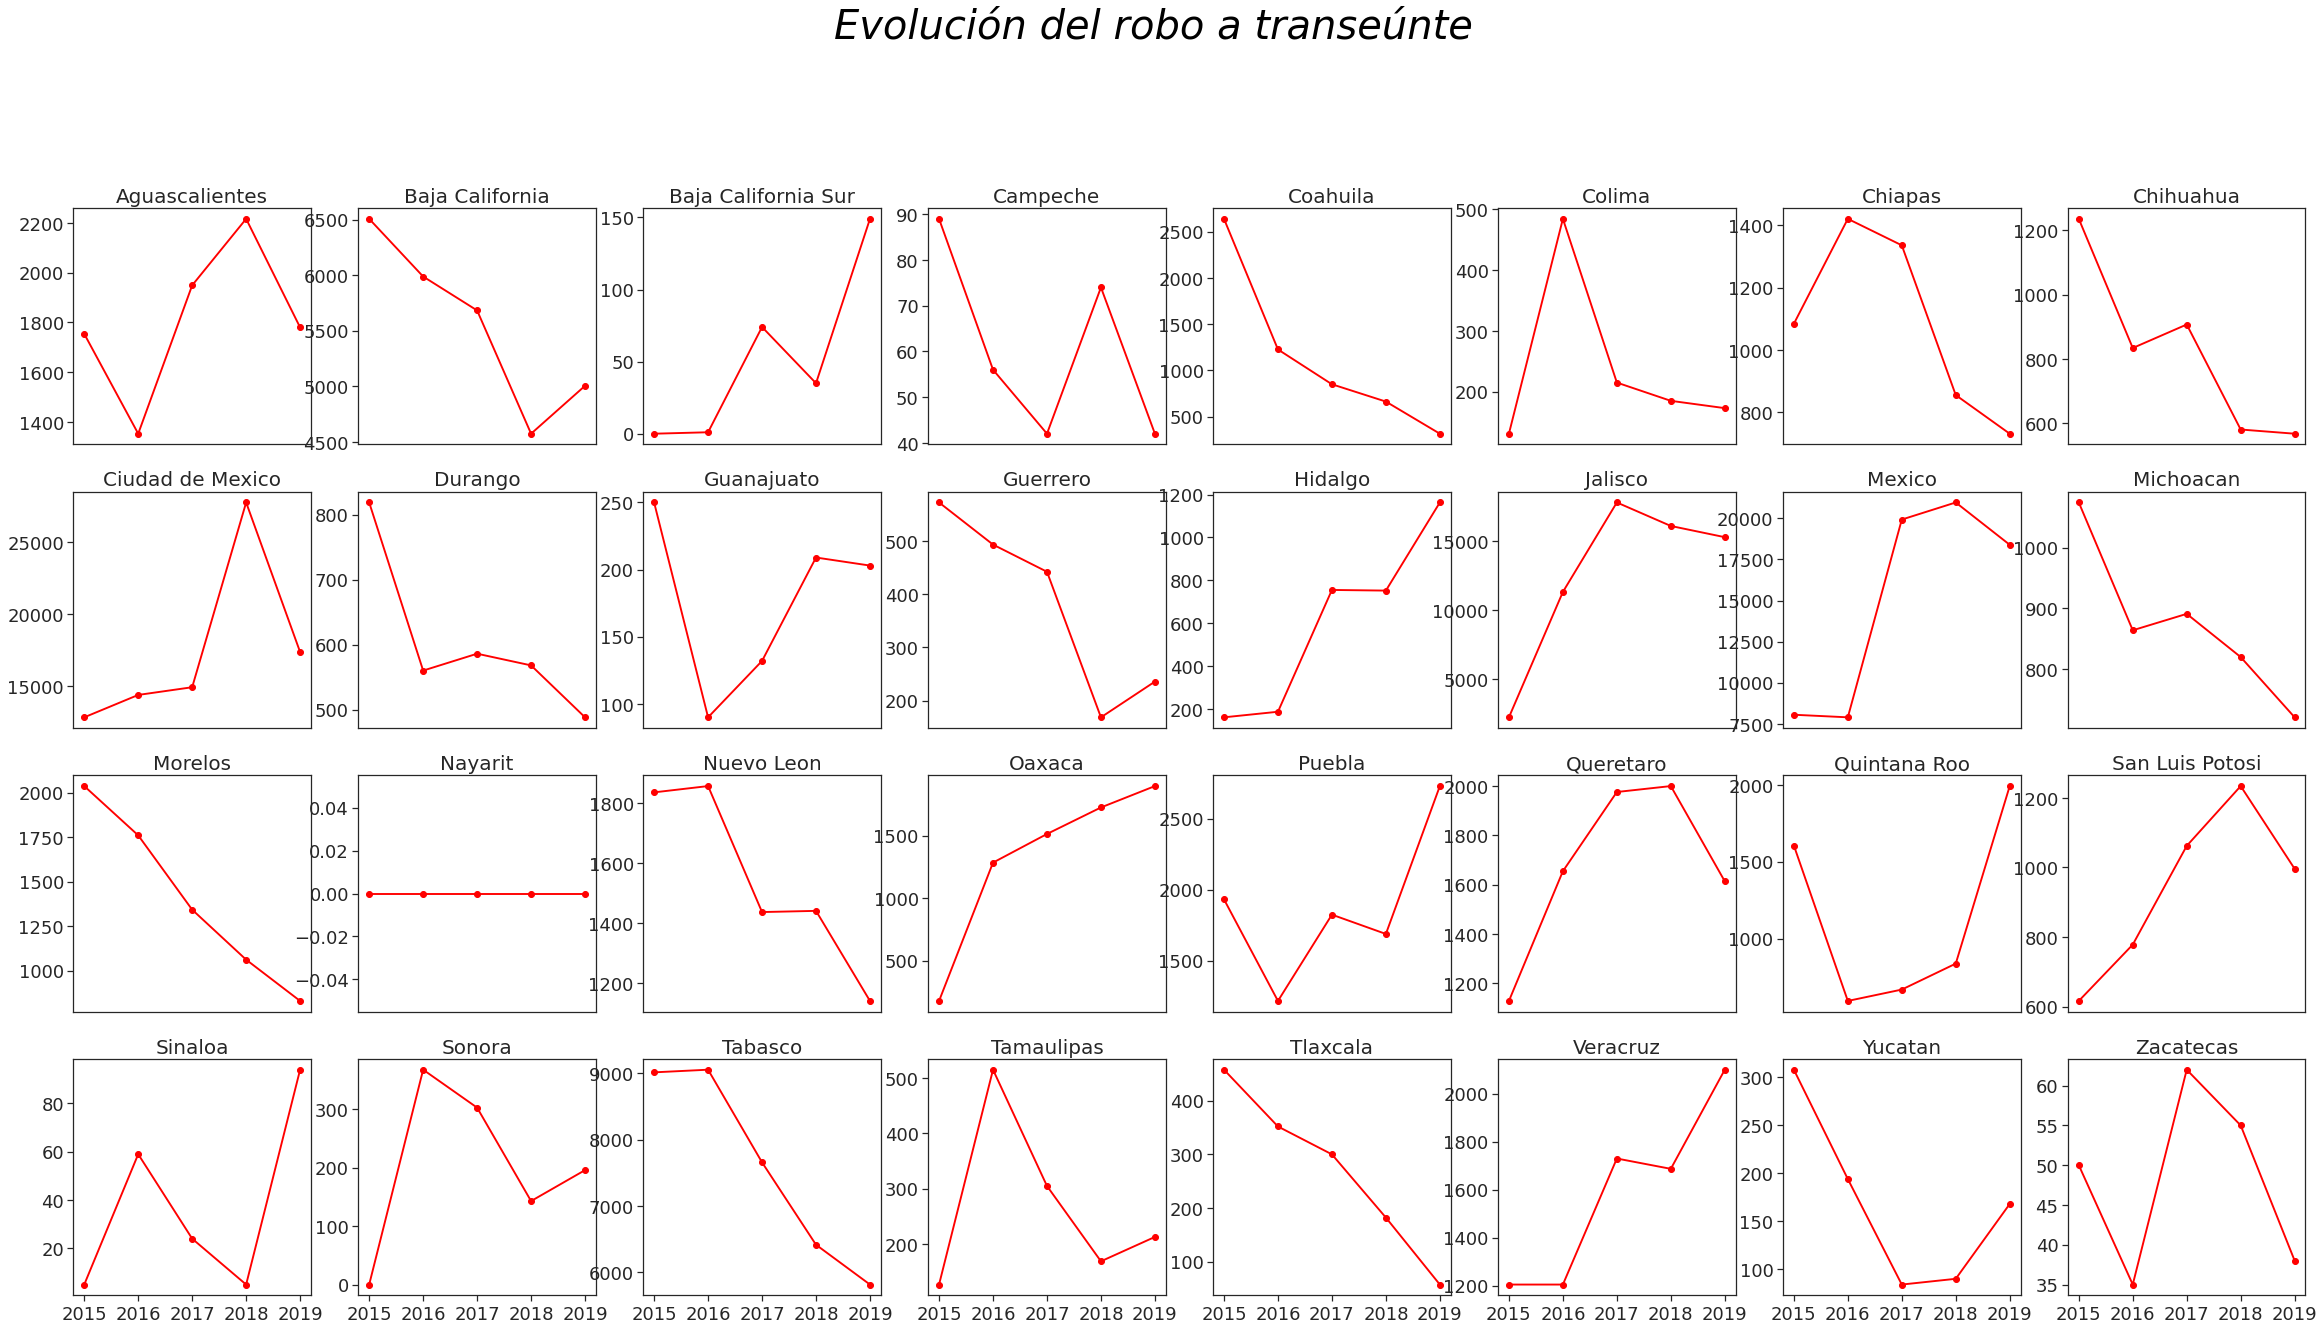

In [109]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(aos, ent[i].robocalle, marker="o", linewidth=1.9, color='red')
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución del robo a transeúnte",fontsize=40, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

### Robo de vehículo

Durante 2015-2019, el robo de vehículo en las entidades del país ha evolucionado de la siguiente manera:

In [110]:
carro= bd[['ao','clave_ent', 'edo', 'robocarro', 'tasa_rcarro']]

In [111]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=carro.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)

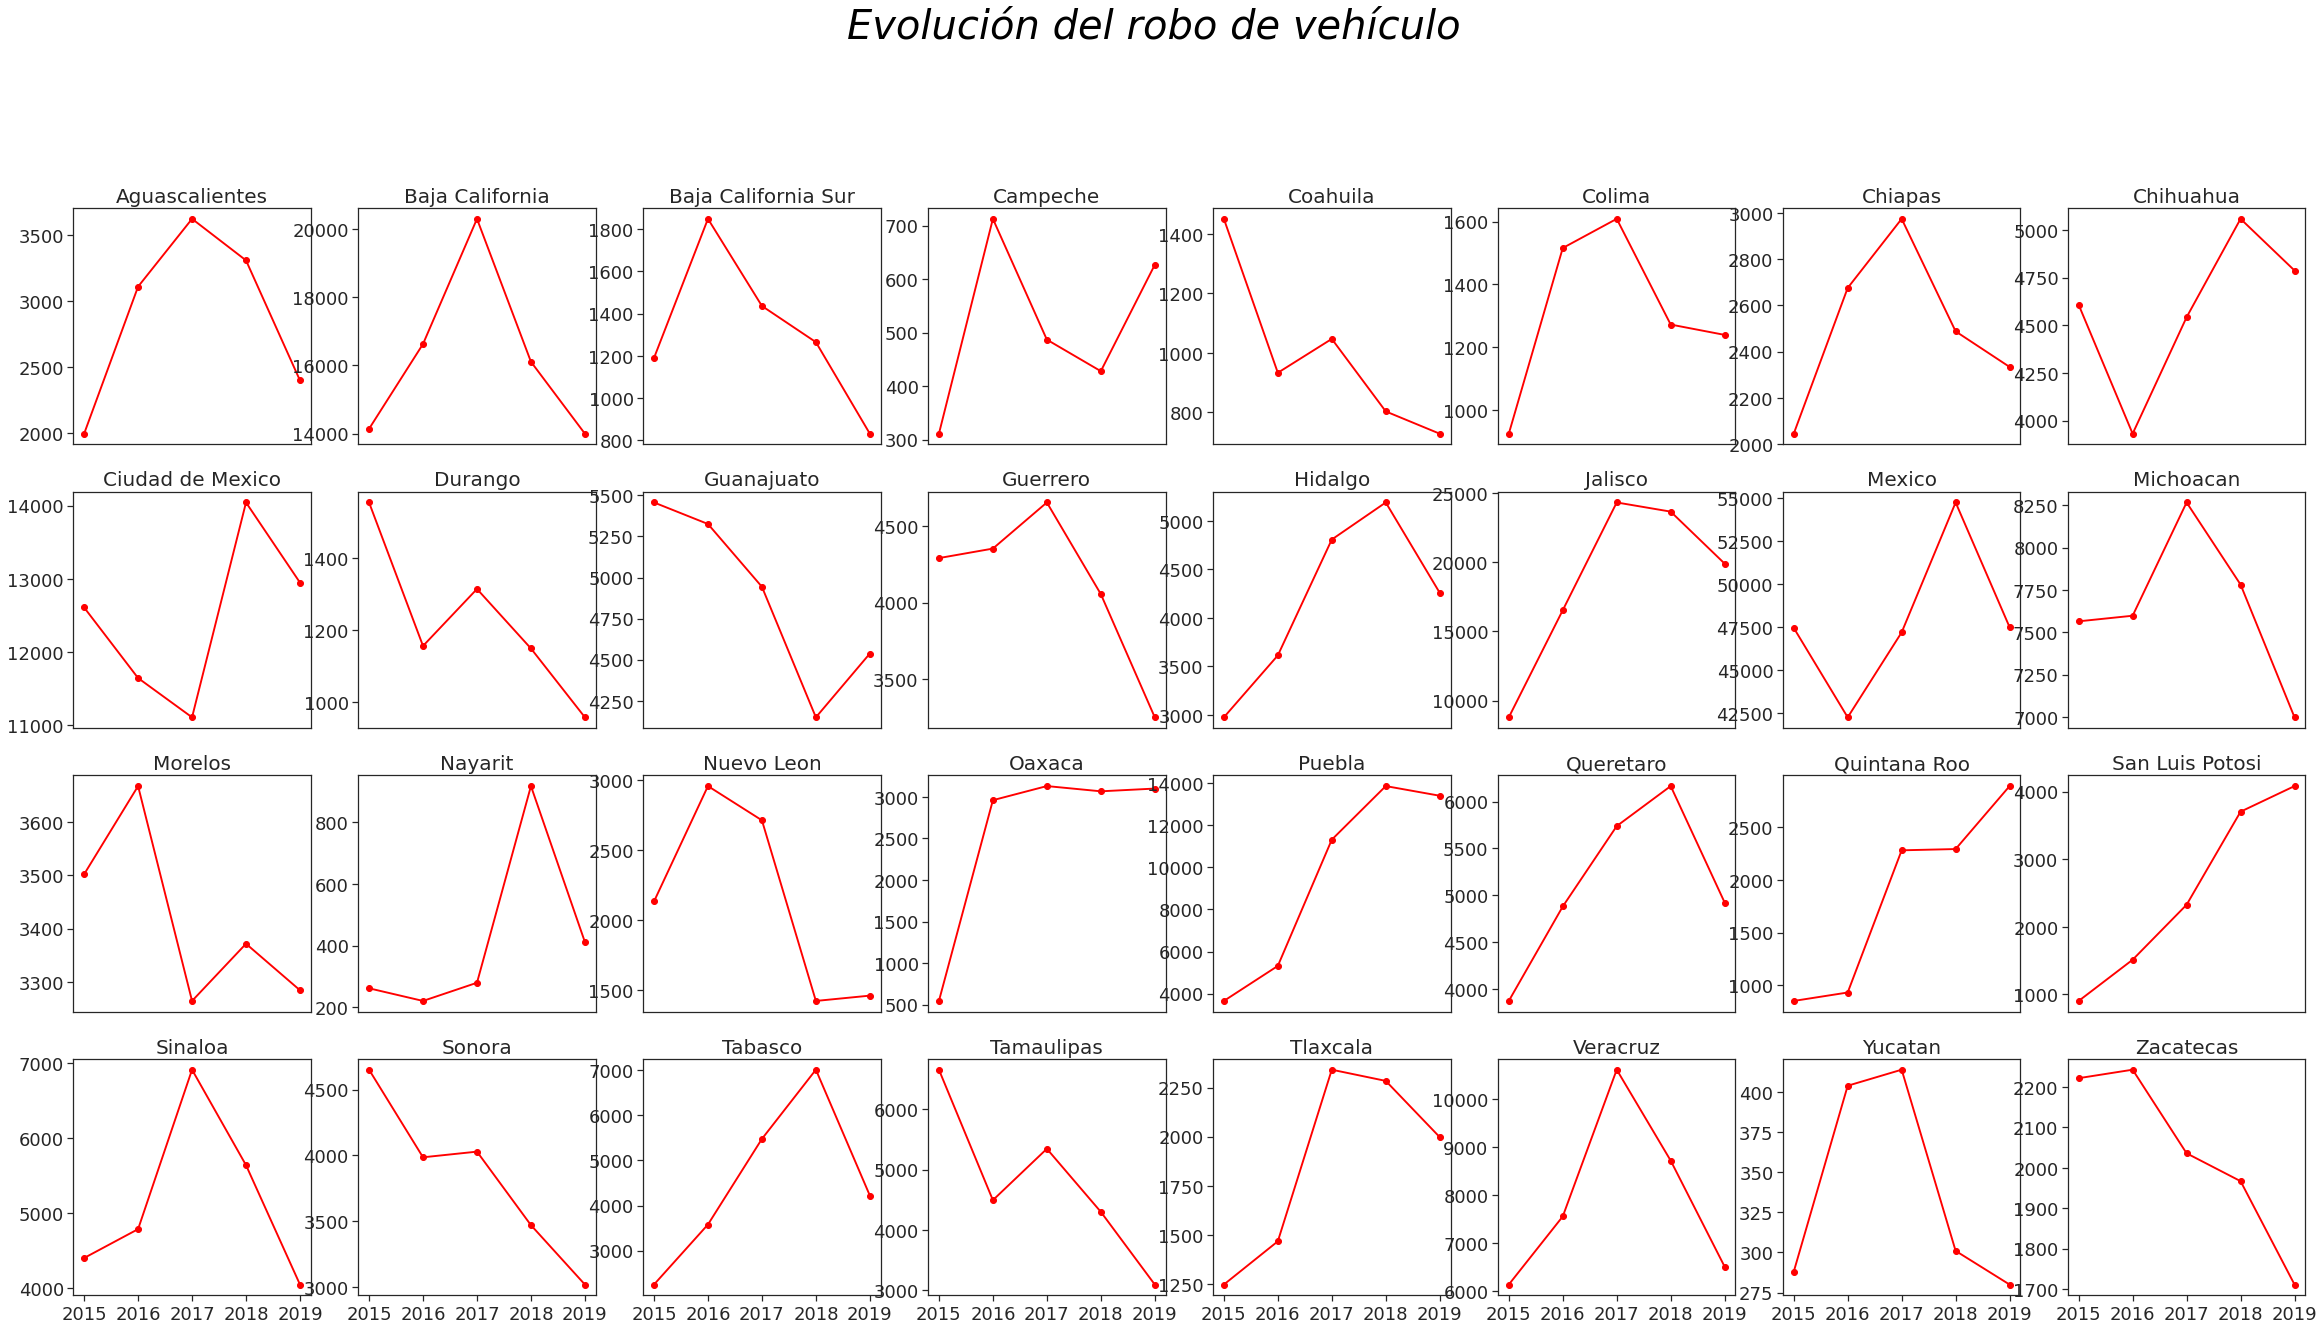

In [112]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(aos, ent[i].robocarro, marker="o", linewidth=1.9, color='red')
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución del robo de vehículo",fontsize=40, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

### Extorsión

Durante 2015-2019, el delito de extorsión en las entidades del país ha evolucionado de la siguiente manera:

In [113]:
del_extor= bd[['ao','clave_ent', 'edo', 'extorsion', 'tasa_extor']]

In [114]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=del_extor.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)

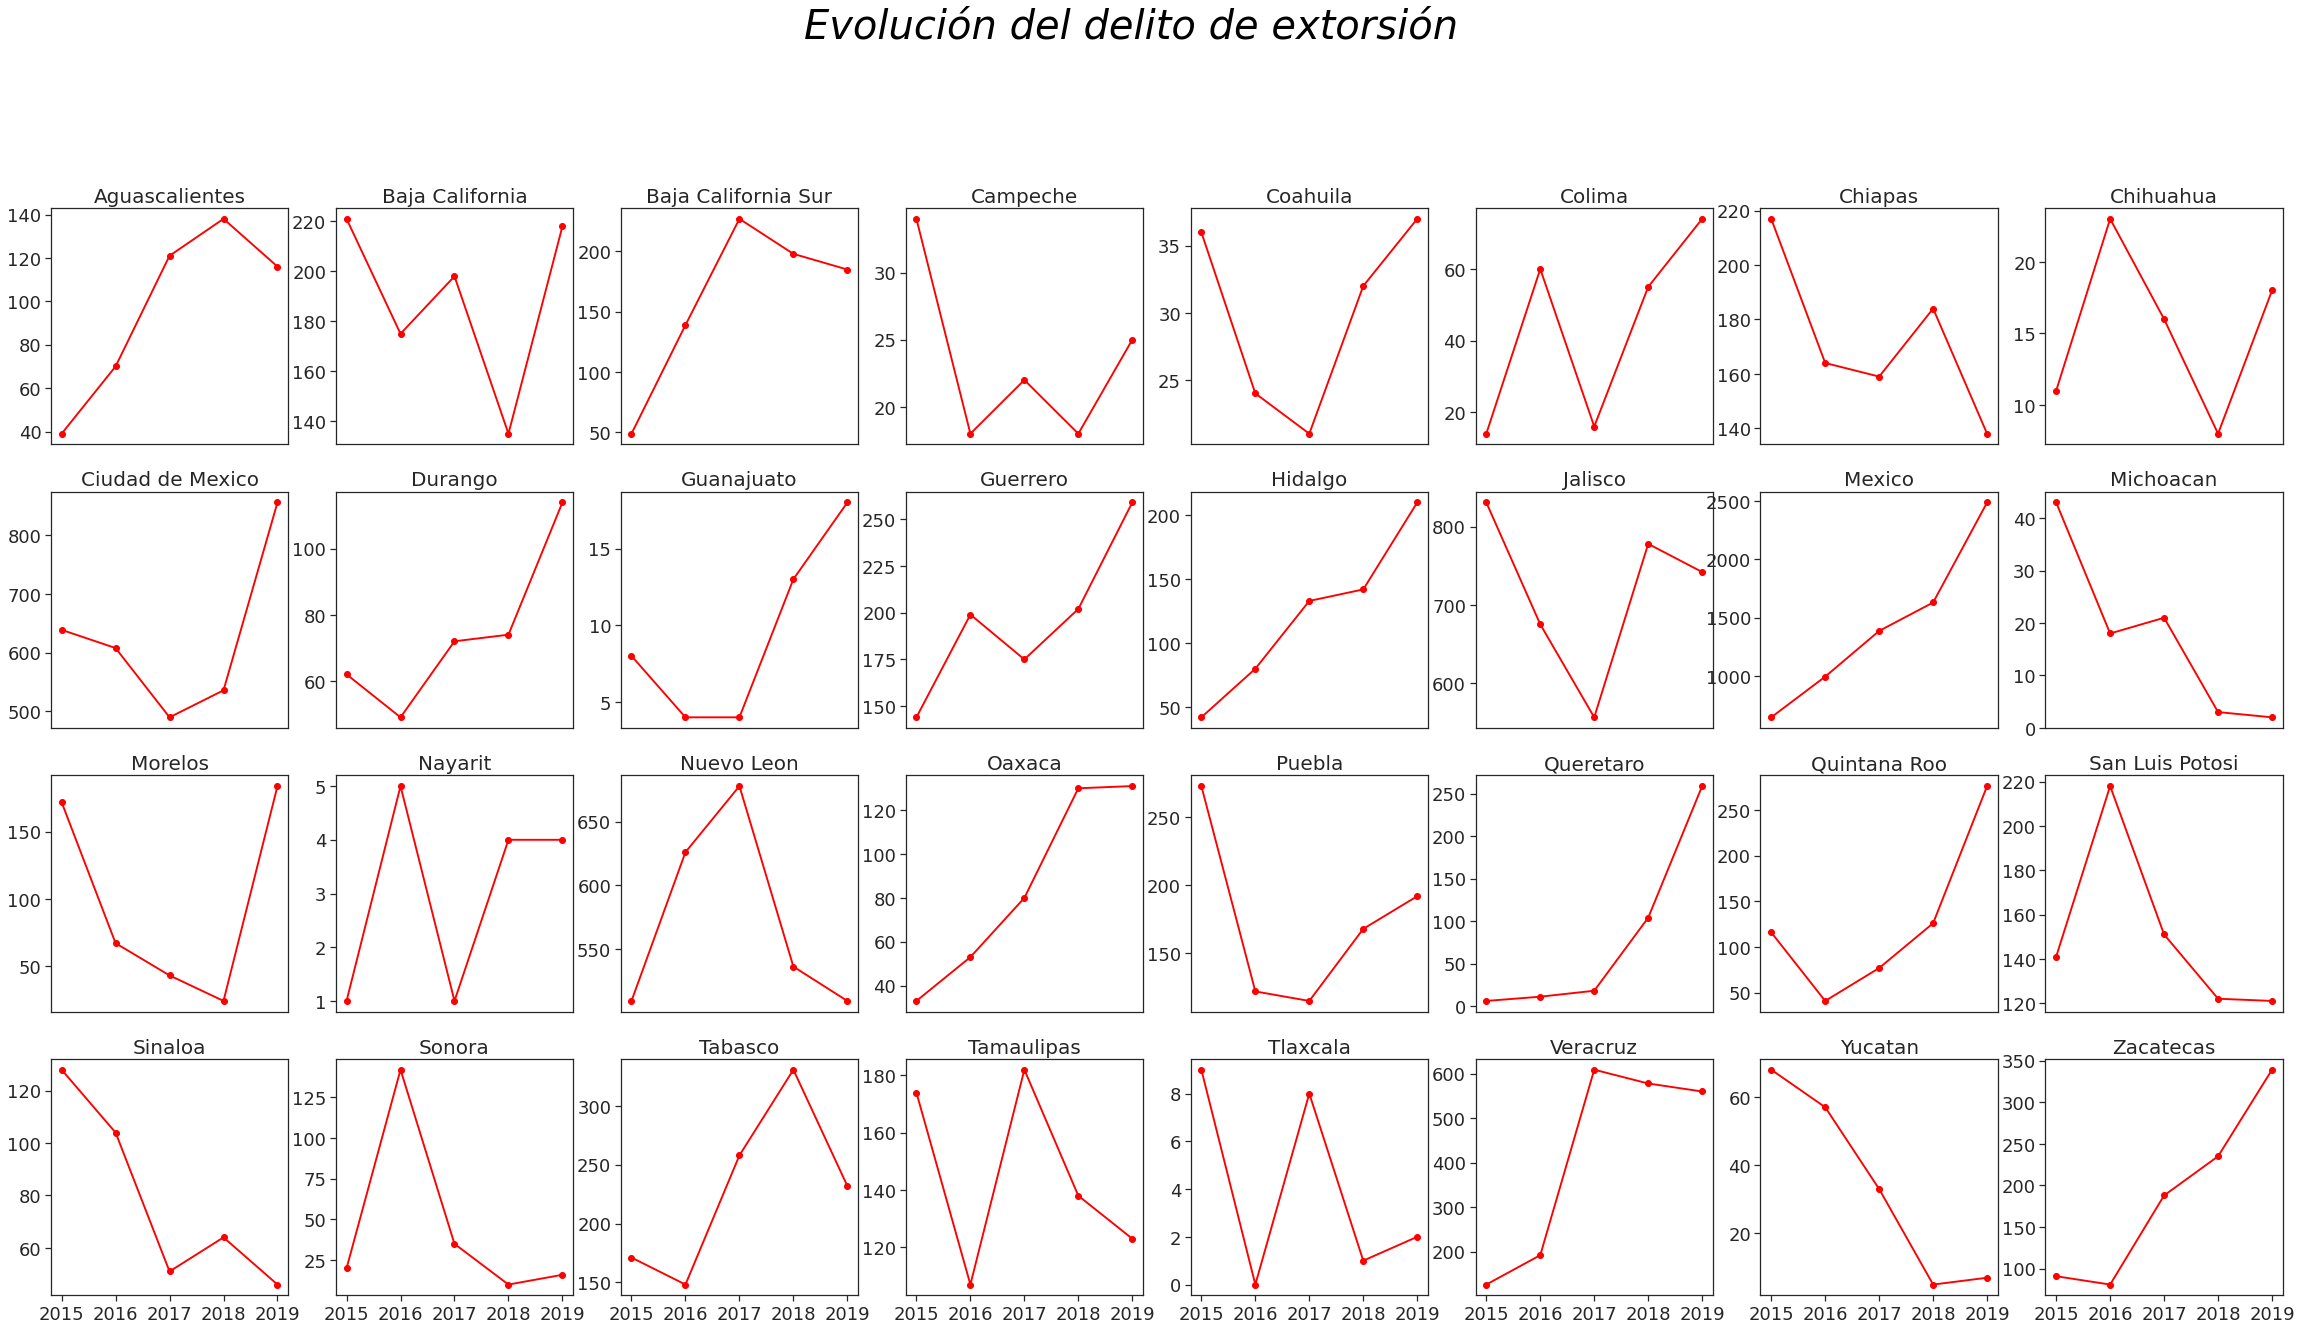

In [115]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(aos, ent[i].extorsion, marker="o", linewidth=1.9, color='red')
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución del delito de extorsión",fontsize=40, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

### Comportamiento del Producto Interno Bruto Estatal vs Delitos 

In [116]:
df= bd[['ao','clave_ent', 'edo', 'tasa_hom', 'tasa_rcasa', 'tasa_rcalle', 'tasa_rcarro', 'tasa_extor', 'pibe']]

In [117]:
df.describe()

ao   clave_ent    tasa_hom  tasa_rcasa  tasa_rcalle  \
count   160.000000  160.000000  160.000000  160.000000   160.000000   
mean   2017.000000   16.500000   34.348250   92.510375    51.655312   
std       1.418654    9.262082   20.720682   87.032577    71.779046   
min    2015.000000    1.000000    3.900000    6.520000     0.000000   
25%    2016.000000    8.750000   20.145000   33.562500     7.260000   
50%    2017.000000   16.500000   27.825000   65.875000    24.480000   
75%    2018.000000   24.250000   42.885000  116.817500    51.412500   
max    2019.000000   32.000000  105.540000  389.280000   371.640000   

       tasa_rcarro  tasa_extor          pibe  
count   160.000000  160.000000  1.600000e+02  
mean    136.961438    4.918188  5.391530e+05  
std      93.537817    4.970113  5.618525e+05  
min      12.530000    0.000000  9.558523e+04  
25%      73.267500    1.200000  2.283873e+05  
50%     127.375000    3.835000  3.835130e+05  
75%     169.992500    6.922500  5.778418e+05  
max     586.220000   30.100000  3.128248e+06

In [118]:
i = df[(df.ao == 2019)].index

df.head()

ao  clave_ent             edo  tasa_hom  tasa_rcasa  tasa_rcalle  \
0  2015          1  Aguascalientes     15.84      189.59       131.70   
1  2016          1  Aguascalientes     17.19      181.43        99.83   
2  2017          1  Aguascalientes     18.75      241.83       141.66   
3  2018          1  Aguascalientes     20.28      240.36       158.76   
4  2019          1  Aguascalientes     19.00      199.02       125.76   

   tasa_rcarro  tasa_extor         pibe  
0       149.79        2.93  198220.6406  
1       229.47        5.16  211672.4688  
2       263.41        8.79  216705.5625  
3       237.07        9.89  224807.4688  
4       169.49        8.20  223622.4844

In [119]:
aos=["2015","2016","2017","2018", '2019']
aos

['2015', '2016', '2017', '2018', '2019']

In [120]:
num_edo=np.arange(1,33,1)
num_edo

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [121]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=df.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)
    

In [122]:
## mostramos ejemplo de un Estado en particular
ent[1]

ao  clave_ent             edo  tasa_hom  tasa_rcasa  tasa_rcalle  \
0  2015          1  Aguascalientes     15.84      189.59       131.70   
1  2016          1  Aguascalientes     17.19      181.43        99.83   
2  2017          1  Aguascalientes     18.75      241.83       141.66   
3  2018          1  Aguascalientes     20.28      240.36       158.76   
4  2019          1  Aguascalientes     19.00      199.02       125.76   

   tasa_rcarro  tasa_extor         pibe  
0       149.79        2.93  198220.6406  
1       229.47        5.16  211672.4688  
2       263.41        8.79  216705.5625  
3       237.07        9.89  224807.4688  
4       169.49        8.20  223622.4844

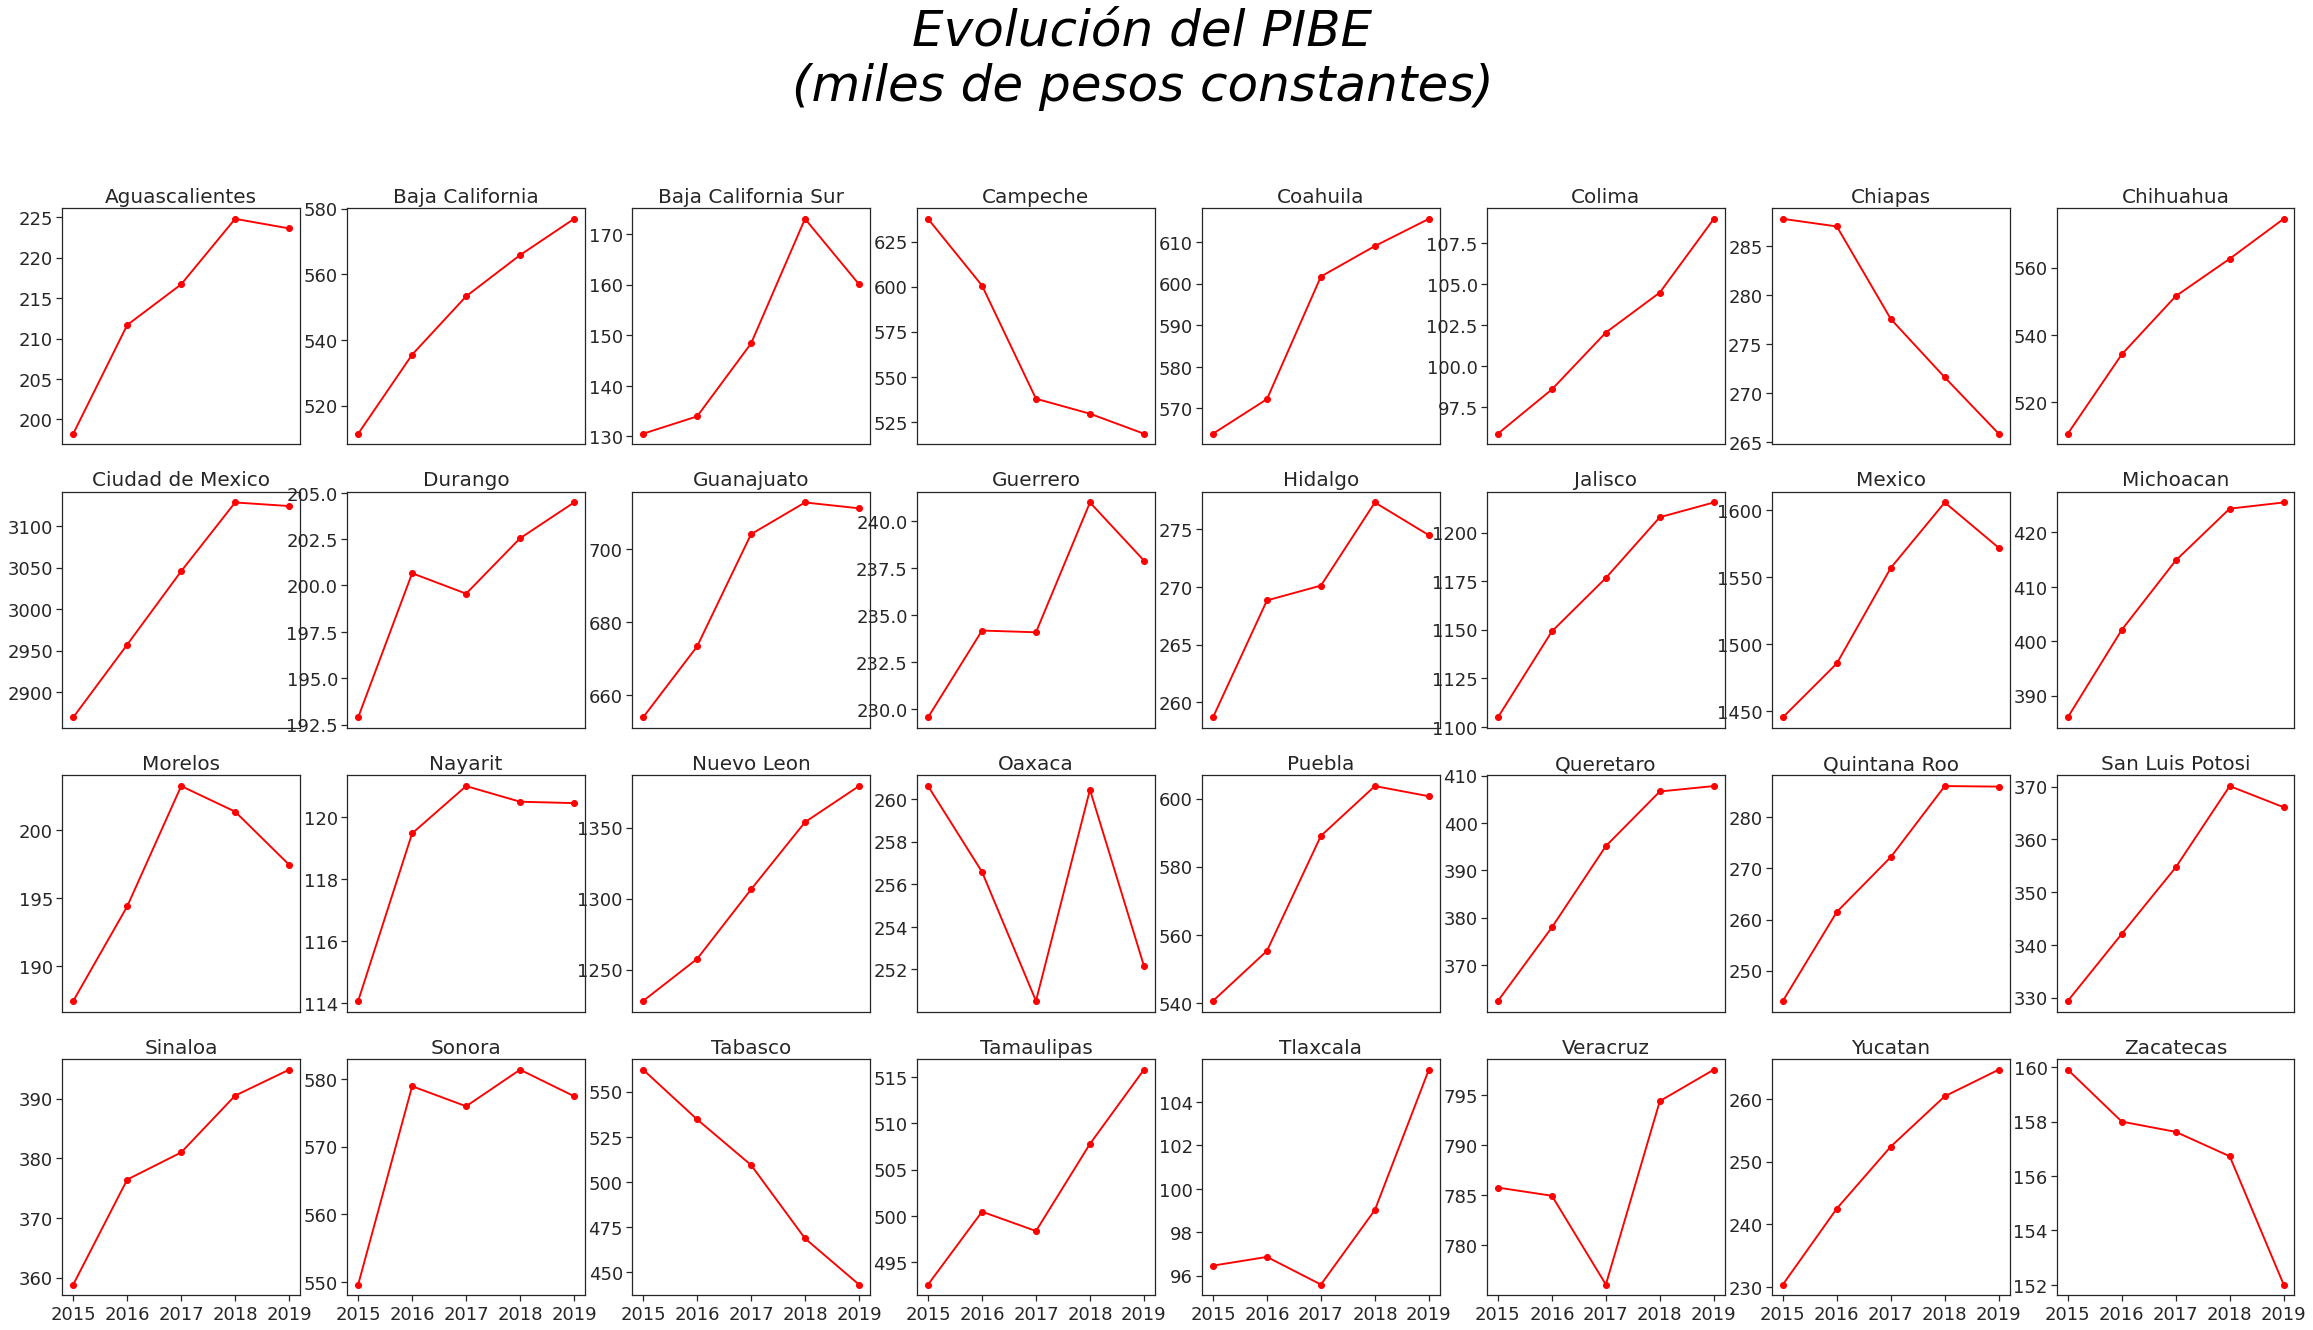

In [129]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(aos, ent[i].pibe/1000, marker="o", linewidth=1.9, color='red')
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    # Not ticks everywhere
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución del PIBE\n(miles de pesos constantes)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Se puede apreciar que el PIB en cada estado tuvo una variación.
Si comparamos 2015 a 2020 encontramos que en 27 entidades hubo una mejora del PIB estatal respecto de 2015.

Las entidades que por el contrario terminaron con un PIB peor que en 2015 fueron:
- Campeche
- Chiapas
- Oaxaca
- Tabasco
- Zacatecas


A continuación, analizaremos el comportamiento de cada variable por entidad. Para ello, calculamos el **promedio** observado en el periodo:

Utilizando el promedio de cada variable durante los años 2015-2019, graficamos:

In [125]:
dfprom=df.groupby(["clave_ent","edo"]).mean()
dfprom.head()

ao  tasa_hom  tasa_rcasa  tasa_rcalle  \
clave_ent edo                                                            
1         Aguascalientes       2017    18.212     210.446      131.542   
2         Baja California      2017    65.238     267.328      160.692   
3         Baja California Sur  2017    41.934     336.008        6.680   
4         Campeche             2017    15.068      11.978        6.410   
5         Coahuila             2017    15.666      80.414       37.396   

                               tasa_rcarro  tasa_extor          pibe  
clave_ent edo                                                         
1         Aguascalientes           209.846       6.994  215005.72502  
2         Baja California          468.866       5.472  548634.64376  
3         Baja California Sur      175.204      20.982  149198.48750  
4         Campeche                  53.902       2.470  564835.56250  
5         Coahuila                  32.298       0.972  592507.00000

In [126]:
df_pibe = dfprom.sort_values("pibe",ascending=False)
df_pibe.head()

ao  tasa_hom  tasa_rcasa  tasa_rcalle  \
clave_ent edo                                                         
9         Ciudad de Mexico  2017    19.844      72.670      193.094   
15        Mexico            2017    18.734      44.622       88.728   
19        Nuevo Leon        2017    22.274      55.586       28.826   
14        Jalisco           2017    27.906      93.924      153.276   
30        Veracruz          2017    24.166      26.990       18.900   

                            tasa_rcarro  tasa_extor          pibe  
clave_ent edo                                                      
9         Ciudad de Mexico      137.852       6.918  3.024948e+06  
15        Mexico                283.246       8.408  1.533064e+06  
19        Nuevo Leon             39.976      10.648  1.305081e+06  
14        Jalisco               228.094       8.798  1.170804e+06  
30        Veracruz               94.444       4.912  7.877266e+05

In [127]:
df_pibe["nombre_ent"] = df_pibe.index
df_pibe.head()

ao  tasa_hom  tasa_rcasa  tasa_rcalle  \
clave_ent edo                                                         
9         Ciudad de Mexico  2017    19.844      72.670      193.094   
15        Mexico            2017    18.734      44.622       88.728   
19        Nuevo Leon        2017    22.274      55.586       28.826   
14        Jalisco           2017    27.906      93.924      153.276   
30        Veracruz          2017    24.166      26.990       18.900   

                            tasa_rcarro  tasa_extor          pibe  \
clave_ent edo                                                       
9         Ciudad de Mexico      137.852       6.918  3.024948e+06   
15        Mexico                283.246       8.408  1.533064e+06   
19        Nuevo Leon             39.976      10.648  1.305081e+06   
14        Jalisco               228.094       8.798  1.170804e+06   
30        Veracruz               94.444       4.912  7.877266e+05   

                                       nombre_ent  
clave_ent edo                                      
9         Ciudad de Mexico  (9, Ciudad de Mexico)  
15        Mexico                     (15, Mexico)  
19        Nuevo Leon             (19, Nuevo Leon)  
14        Jalisco                   (14, Jalisco)  
30        Veracruz                 (30, Veracruz)

In [130]:
ypos=np.arange(len(df_pibe))
ypos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

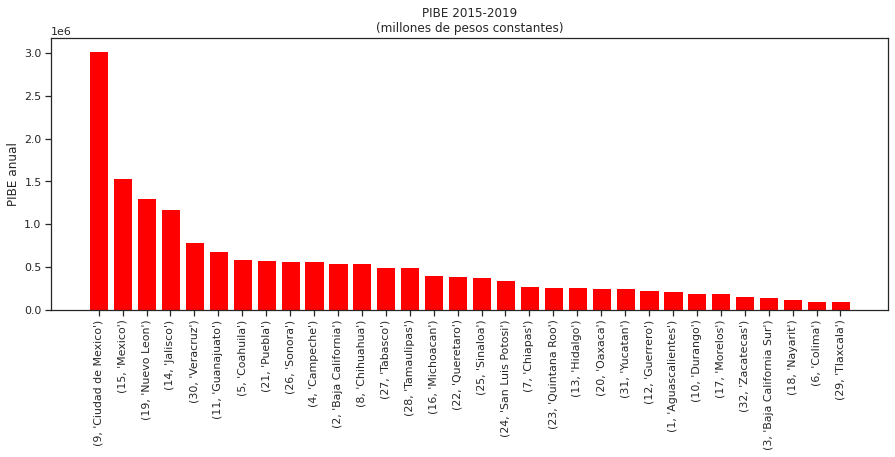

In [132]:
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(ypos,df_pibe['pibe'], color='red')
plt.xticks(ypos,df_pibe["nombre_ent"],rotation=90)
plt.ylabel("PIBE anual")
plt.title("PIBE 2015-2019\n(millones de pesos constantes)")
plt.show()

In [133]:
dfprom["pibe"].describe()

count    3.200000e+01
mean     5.391530e+05
std      5.682886e+05
min      9.868482e+04
25%      2.302634e+05
50%      3.851513e+05
75%      5.739820e+05
max      3.024948e+06
Name: pibe, dtype: float64

El PIB estatal promedio es de aproximadamente de 539,153, sin embargo la mediana es de 385151.3. Si la media es mayor que la mediana, la distribución está sesgada a la derecha.


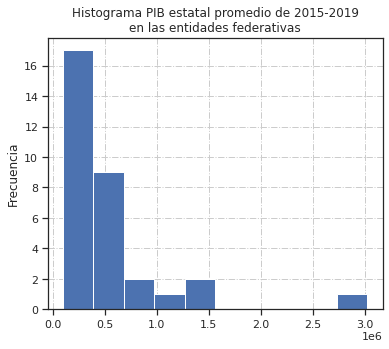

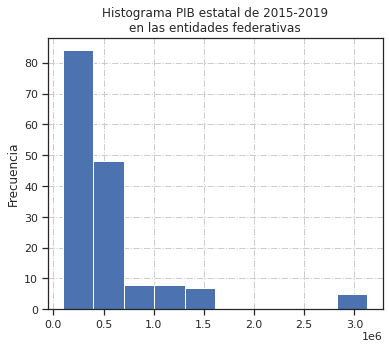

In [134]:
plt.rcParams["figure.figsize"] = [6,5]
dfprom["pibe"].hist(bins=10)
plt.title("Histograma PIB estatal promedio de 2015-2019\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()


df["pibe"].hist(bins=10)
plt.title("Histograma PIB estatal de 2015-2019\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()

Observamos que ambas distribuciones son muy parecidas

### Ahora se verá a traves de un scatter plox la relación entre los delitos seleccionados y el PIB estatal

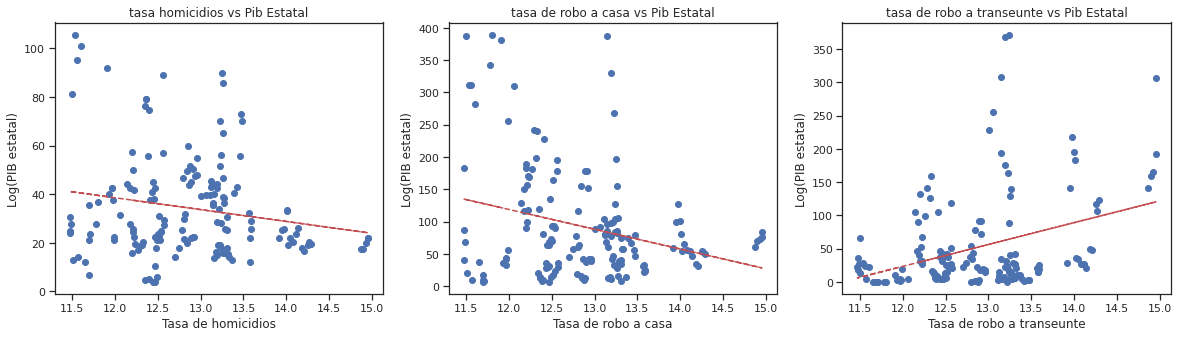

In [135]:

plt.rcParams["figure.figsize"] = [20,5]

plt.subplot(1,3,1)
plt.scatter(np.log(df.pibe), df.tasa_hom)
plt.xlabel("Tasa de homicidios")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa homicidios vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_hom, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")


plt.subplot(1,3,2)
plt.scatter(np.log(df.pibe), df.tasa_rcasa)
plt.xlabel("Tasa de robo a casa")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa de robo a casa vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_rcasa, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")

plt.subplot(1,3,3)
plt.scatter(np.log(df.pibe), df.tasa_rcalle)
plt.xlabel("Tasa de robo a transeunte")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa de robo a transeunte vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_rcalle, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")

plt.show()


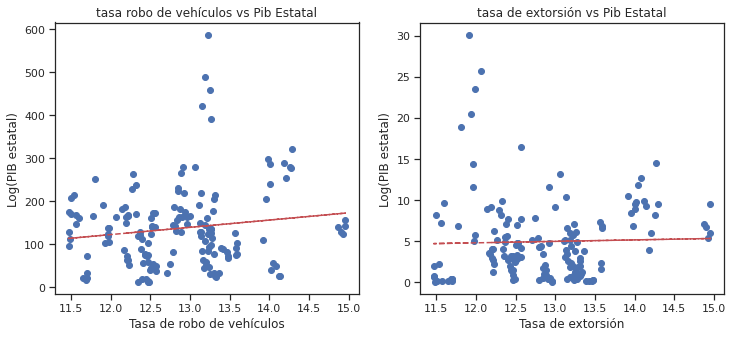

In [136]:
plt.rcParams["figure.figsize"] = [12,5]

plt.subplot(1,2,1)
plt.scatter(np.log(df.pibe), df.tasa_rcarro)
plt.xlabel("Tasa de robo de vehículos")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa robo de vehículos vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_rcarro, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")


plt.subplot(1,2,2)
plt.scatter(np.log(df.pibe), df.tasa_extor)
plt.xlabel("Tasa de extorsión")
plt.ylabel('Log(PIB estatal)')
plt.title("tasa de extorsión vs Pib Estatal")
z = np.polyfit(np.log(df.pibe), df.tasa_extor, 1)
p = np.poly1d(z)
pylab.plot(np.log(df.pibe),p(np.log(df.pibe)),"r--")

plt.show()



Se observa que las variables de robo de transeúnte, robo de vehículos, y extorisón están relacionadas de manera positiva con el PIB(estatal) Aunque las últimas

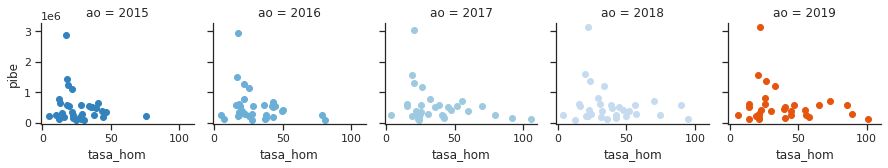

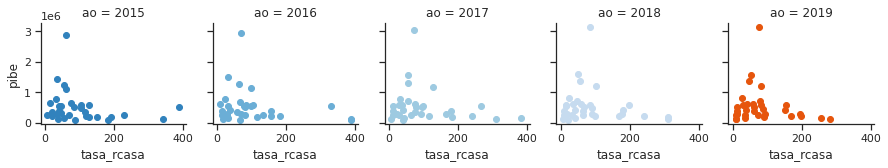

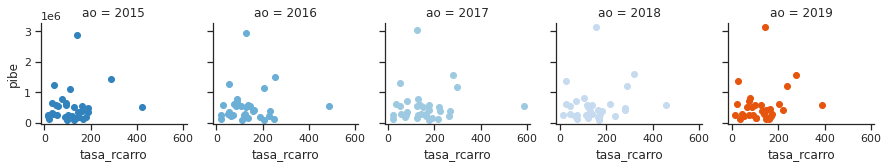

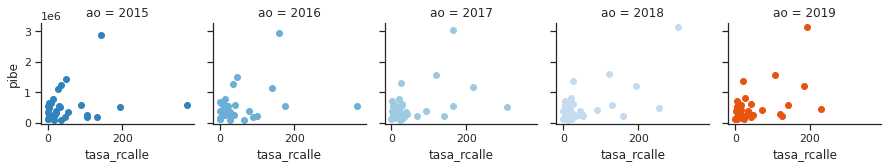

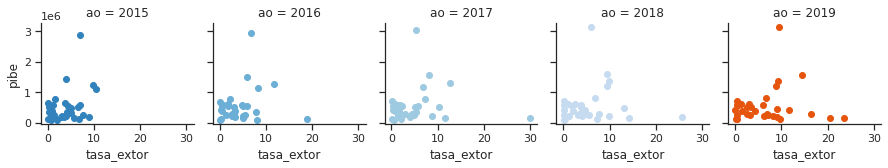

In [137]:
grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_hom', 'pibe',  marker="o");

grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_rcasa', 'pibe',  marker="o");

grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_rcarro', 'pibe',  marker="o");

grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_rcalle', 'pibe',  marker="o");

grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, 'tasa_extor', 'pibe',  marker="o");




Se puede observar que variables como extorsión, robo a transeunte, robo a casa habitación no cambian mucho con el tiempo, sin embargo la variable que cambió mas fue la tasa de homicidios

## Modelo y metodología para el robo a casa habitación

El modelo que se plantea explica el robo a casa habitación en función de la población de 25 a 34 años, la tasa de desocupación, el PIB estatal y la pobreza.

Las datos provienen de distintas fuentes:

1. La Secretaría de Gobernación, para la variable de robo a casa habitación ($Tasa\_rcasa$); 
2. CONAPO, en el caso de la población de 25 a 34 años ($prop2534$);
3. INEGI, a través de la ENOE, brinda la tasa de desocupación ($desocupa$);
3. El Sistema de Cuentas Nacionales del INEGI porporciona el PIB estatal ($pibe$) y;
4. El CONEVAL presenta la estimación de la pobreza en el año 2016 y 2018. Las cifras de pobreza de los años 2015 y 2017 se estimaron con interpolación por splines ($pobreza$).

Con esta información se conforma una base de datos panel, se siguen las 32 entidades federativas a través del periodo 2015 a 2019. Es decir, se tienen las variables señaladas por cada estado durante 5 años, con excepción de la pobreza, cuya información esta disponible hasta 2018, debido a que la base de datos utilizada para su construcción se produce de manera bianual. Por tal razón, el panel de datos es desbalanceado.

Dada la estructura de la información se utiliza el método de estimación de mínimos cuadrados ordinarios para datos panel con efectos aleatorios. Esta metodología permite eliminar el efecto de variables omitidas que son constantes en el tiempo y que podrían causar inconsistencia en el modelo.

A fin de facilitar la interpretación los resultados de la estimación se realizó la transformación logarítmica de la variable PIB estatal.

Así, el modelo planteado es el siguiente:

$$Tasa\_rcasa_{i,j}=\beta_0+\beta_1*prop2534_{i,j}+\beta_2*desocupa_{i,j}-\beta_3*logpibe_{i,j}-\beta_4*pobreza_{i,j}+u$$

Donde:


    i = entidad
    j = periodo
    Tasa\_rcasa = tasa de robo a casa habitación por cada 100 mil habitantes
    prop2534 = proporción de la población de 25 a 34 años respecto del total de la población
    desocupa = tasa de desocupación
    logpibe = logaritmo natural de PIB estatal
    pobreza = porcentaje de la población en pobreza      

La estimación de los modelos se realiza a partir de la documentación  [linearmodels](https://bashtage.github.io/linearmodels/panel/examples/examples.html)

In [138]:
bd = pd.read_csv('base_final.csv')

In [139]:
year = pd.Categorical(bd["ao"])

In [140]:
data = bd.set_index(["edo","ao"])

In [141]:
data['ao'] = year

In [142]:
print(data.head())

                     clave_ent  homicidio  robocasa  robocalle  robocarro  \
edo            ao                                                           
Aguascalientes 2015          1        211      2525       1754       1995   
               2016          1        233      2459       1353       3110   
               2017          1        258      3327       1949       3624   
               2018          1        283      3355       2216       3309   
               2019          1        269      2817       1780       2399   

                     extorsion  tasa_hom  tasa_rcasa  tasa_rcalle  \
edo            ao                                                   
Aguascalientes 2015         39     15.84      189.59       131.70   
               2016         70     17.19      181.43        99.83   
               2017        121     18.75      241.83       141.66   
               2018        138     20.28      240.36       158.76   
               2019        116     19.00      

In [143]:
data["logpibe"] = np.log(data["pibe"])
data["prop25a34"] = data["edad25a34"]*100/data["pob_tot"]

## Estimación PooledOLS

In [144]:
exog_vars = ['prop25a34','desocupa','logpibe','pobreza']
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.tasa_rcasa, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:             tasa_rcasa   R-squared:                        0.5040
Estimator:                  PooledOLS   R-squared (Between):              0.5469
No. Observations:                 128   R-squared (Within):              -0.0335
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.5040
Time:                        13:05:11   Log-likelihood                   -712.74
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      31.251
Entities:                          32   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             31.251
                            

/home/miuser/.local/lib/python3.6/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


## Estimación con Efectos Aleatorios

In [145]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(data.tasa_rcasa, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             tasa_rcasa   R-squared:                        0.2133
Estimator:              RandomEffects   R-squared (Between):              0.5319
No. Observations:                 128   R-squared (Within):               0.0108
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.4935
Time:                        13:05:16   Log-likelihood                   -606.99
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8.3355
Entities:                          32   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             8.3355
                            

## Resultados
### Comparación efectos aleatorios vs Pool OLS

In [146]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':pooled_res}))

                 Model Comparison                 
                                   RE       Pooled
--------------------------------------------------
Dep. Variable              tasa_rcasa   tasa_rcasa
Estimator               RandomEffects    PooledOLS
No. Observations                  128          128
Cov. Est.                  Unadjusted   Unadjusted
R-squared                      0.2133       0.5040
R-Squared (Within)             0.0108      -0.0335
R-Squared (Between)            0.5319       0.5469
R-Squared (Overall)            0.4935       0.5040
F-statistic                    8.3355       31.251
P-value (F-stat)               0.0000       0.0000
===================== =============== ============
const                          148.36       121.34
                             (0.4666)     (0.6842)
prop25a34                      37.524       40.646
                             (2.5189)     (4.7447)
desocupa                       12.535       5.2567
                             (2

### Discusion de los resultados

La estimación del modelo arroja los resultados que van en la dirección esperada y  las variables seleccionadas resultan estadísticamente significativas (t>2). La estimación muestra que:

1. A mayor proporción de población entre 25 y 34 años dentro de un estado, mayor será la tasa de robo a casa habitación. El incremento de un 1% en esta proporción de población, manteniendo todo lo demás constante, afectará el robo a casa habitación en 37.5 robos por cada 100 mil habitantes.

2. Entre mayor porcentaje de población económicamente activa desempleada, se espera un incremento en la tasa de robo a casa habitación. En promedio, el aumento en un 1% en la tasa de desocupación implicará un ascenso de 12.5 robos por cada 100 mil habitantes.

3. Las variables relacionadas al PIB estatal y la proporción de población en situación de pobreza, contrario a las variables previas, presentan una relación inversa con los robos a casa habitación. Lo que implicaría que mayor ingreso de las entidades  está asociado a mayores medidas de seguridad. De esta forma, el incremento del PIB estatal en un punto porcentual reduce el número de robos a casa habitación en 48 por cada 100 mil habitantes, en promedio y manteniendo todo lo demás constante.

4. Por su parte, el incremento en la pobreza se asocia a una reducción en el robo a casa habitación, si la pobreza se incrementa en un 1%,  el robo a casa habitación se reduce en 1.9 robos por cada 100 mil habitantes. 

Adicionalmente al modelo de efectos aleatorios, se estimó un modelo de mínimos cuadrados ordinarios con datos agrupados (Pool OLS). La estimación de este modelo se realizó con el fin de  robustecer los resultados del modelo de efectos aleatorios, en términos de los signos y de la magnitud de los parámetros.  Como resultado de ello, el modelo arroja signos iguales en las variables independientes a los presentados en el modelo por efectos aleatorios y parámetros similares en tres de las cuatro variables.

El parámetros de la proporción de población de 25 a 34 años en Pool OLS es equivalente a 40.6 vs 37.5 del modelo de efectos aleatorios. Para la variable PIB estatal este modelo presenta un  parámetro de 46.4 vs 48  del modelo de efectos aleatorios. Por su parte, el parámetro de pobreza asciende a 2.3 vs 1.9 en efectos aleatorios. La desocupación es la variable para la que ambos modelos divergen mayormente en la dimensión del parámetro, 5.2 en Pool OLS y 12.5 en efectos aleatorios. 
Finalmente, el modelo de efectos aleatorios permite explicar el 49.3 % ($R^2 = 0.493$) de la variación de la tasa de robo a casa habitación, a través de las variables mencionadas. Mientras que el modelo Pool OLS  arroja un 50% ($R^2 = 0.504$).

**Para el resto de los delitos los factores que influyen en éstos son distintos a los señalados para el robo a casa habitación.** Para conocer las variables que afectan estos delitos tendría que realizarse una revisión de literatura y buscar otras variables. **No obstante, se corrieron las regresiones para explorar si el modelo propuesto explica el resto de los delitos. Se incluyen los ejercicios a continuación** para mostrar que los factores que influyen en este delito difieren de los detectados para robo a casa habitación.

### Robo a transeúnte

In [173]:
#  Para poolOLS
exog_vars = ['prop25a34','desocupa','logpibe','pobreza']
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.tasa_rcalle, exog)
pooled_calle = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:             tasa_extor   R-squared:                        0.1062
Estimator:                  PooledOLS   R-squared (Between):              0.1369
No. Observations:                 128   R-squared (Within):               0.0081
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.1062
Time:                        13:16:44   Log-likelihood                   -370.09
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.6520
Entities:                          32   P-value                           0.0076
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             3.6520
                            

In [174]:
# Para Efectos aleatorios
from linearmodels.panel import RandomEffects
mod = RandomEffects(data.tasa_rcalle, exog)
re_calle = mod.fit()
#print(re_res)

In [175]:
#Comparación
from linearmodels.panel import compare
print(compare({'RE':re_calle,'Pooled':pooled_calle}))

                  Model Comparison                 
                                   RE        Pooled
---------------------------------------------------
Dep. Variable             tasa_rcalle   tasa_rcalle
Estimator               RandomEffects     PooledOLS
No. Observations                  128           128
Cov. Est.                  Unadjusted    Unadjusted
R-squared                      0.0832        0.3267
R-Squared (Within)             0.0151       -0.3827
R-Squared (Between)            0.2281        0.4061
R-Squared (Overall)            0.2067        0.3267
F-statistic                    2.7920        14.922
P-value (F-stat)               0.0292        0.0000
===================== =============== =============
const                         -840.57       -817.36
                            (-2.7454)     (-4.8280)
prop25a34                      26.589        25.889
                             (1.8517)      (3.1658)
desocupa                       1.2142        25.506
            

### Homicidio

Corremos regresión del modelo propuesto para la tasa de homicidios por cada 100 mil habitantes con **PooledOLS**:

In [176]:
exog_vars = ["prop25a34","desocupa","logpibe","pobreza"]
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.tasa_hom, exog)
pooled_res = mod.fit()

In [177]:
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:               tasa_hom   R-squared:                        0.0917
Estimator:                  PooledOLS   R-squared (Between):              0.0862
No. Observations:                 128   R-squared (Within):               0.1091
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.0917
Time:                        13:31:12   Log-likelihood                   -557.28
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.1062
Entities:                          32   P-value                           0.0179
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             3.1062
                            

La estimación para la tasa de homicidios con PooledOLS no arroja resultados estadísticamente significactivos. Lo cual nos lleva a concluir que las variables independientes no explican el modelo.

Corremos regresión para la tasa de homicidios por cada 100 mil habitantes con **Efectos aleatorios**:

In [178]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(data.tasa_hom, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:               tasa_hom   R-squared:                        0.1298
Estimator:              RandomEffects   R-squared (Between):              0.0331
No. Observations:                 128   R-squared (Within):               0.1556
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.0626
Time:                        13:31:16   Log-likelihood                   -478.55
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.5873
Entities:                          32   P-value                           0.0017
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             4.5873
                            

El modelo ajustado por efectos aleatorios tampoco arroja resultados significativos.

Sin embargo, bajo este ajuste, la única variable que sale incide en el modelo, es la `Desocupación`ya que tiene un **valor de p** de **0.0001**, por lo que no se encuentra en la región de rechazo de $\alpha = 0.01$. El coeficiente de relación es negativo e indica que a medida disminuye la desocupación en **un punto** disminuye la tasa de homicidios en **6.6%**

**Comparamos las estimaciones**:

In [179]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':pooled_res}))

                 Model Comparison                 
                                   RE       Pooled
--------------------------------------------------
Dep. Variable                tasa_hom     tasa_hom
Estimator               RandomEffects    PooledOLS
No. Observations                  128          128
Cov. Est.                  Unadjusted   Unadjusted
R-squared                      0.1298       0.0917
R-Squared (Within)             0.1556       0.1091
R-Squared (Between)            0.0331       0.0862
R-Squared (Overall)            0.0626       0.0917
F-statistic                    4.5873       3.1062
P-value (F-stat)               0.0017       0.0179
===================== =============== ============
const                          90.257       135.19
                             (0.9705)     (2.5680)
prop25a34                      1.5219      -1.1877
                             (0.3456)    (-0.4670)
desocupa                      -6.6329      -3.7791
                            (-3

Los resultados de las estimaciones son consistentes con lo esperado, es decir, la incidencia de los homicidios no está directamente relacionada con variables como la proporción de gente joven, el nivel de actividad económica o la pobreza. 


La evidencia muestra que la pobreza no es un factor determinate para aumentar o disminuir el homicidio. Hay variables más importantes que no se toma encuenta en este estudio como la presencia de **grupos criminales de delincuencia organizada** y la disputa por el territorio, así como otros factores estructurales como la debilidad de las instituciones de seguridad y justicia, y la alta cifra negra (ver [Los factores que inciden en la violencia homicida en México de 2007 a 2012. Ponce](http://americo.usal.es/iberoame/sites/default/files/isaloren_PAPERseminario10_2013-2014.pdf).

### Robo de vehículo

**Obs.** instalamos el paquete linearmodels desde la terminal con: pip install linearmodels.

Se tomó de: [pypi](https://pypi.org/project/linearmodels/)

Corremos regresión para la tasa de robo de vehículo por cada 100 mil habitantes:

In [183]:
exog_vars = ["prop25a34","desocupa","logpibe","pobreza"]
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.tasa_rcarro, exog)
pooled_res = mod.fit()

In [184]:
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:            tasa_rcarro   R-squared:                        0.1045
Estimator:                  PooledOLS   R-squared (Between):              0.1043
No. Observations:                 128   R-squared (Within):               0.1053
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.1045
Time:                        13:32:03   Log-likelihood                   -759.18
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.5868
Entities:                          32   P-value                           0.0084
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             3.5868
                            

Los resultados del modelo con PooledOLS tampoco fueron significativos para el robo vehicular

Corremos regresión para la tasa de robo de vehiculo por cada 100 mil habitantes con **Efectos aleatorios**:

In [185]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(data.tasa_rcarro, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:            tasa_rcarro   R-squared:                        0.1514
Estimator:              RandomEffects   R-squared (Between):              0.0446
No. Observations:                 128   R-squared (Within):               0.1783
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.0602
Time:                        13:32:12   Log-likelihood                   -632.31
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5.4869
Entities:                          32   P-value                           0.0004
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             5.4869
                            

El modelo estimado con efectos aleatorios no arroja resultados significativos que expliquen el robo vehicular.

**Comparamos las estimaciones**:

In [186]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':pooled_res}))

                  Model Comparison                 
                                   RE        Pooled
---------------------------------------------------
Dep. Variable             tasa_rcarro   tasa_rcarro
Estimator               RandomEffects     PooledOLS
No. Observations                  128           128
Cov. Est.                  Unadjusted    Unadjusted
R-squared                      0.1514        0.1045
R-Squared (Within)             0.1783        0.1053
R-Squared (Between)            0.0446        0.1043
R-Squared (Overall)            0.0602        0.1045
F-statistic                    5.4869        3.5868
P-value (F-stat)               0.0004        0.0084
===================== =============== =============
const                         -468.24       -338.36
                            (-1.0114)     (-1.3274)
prop25a34                      41.012        24.485
                             (1.9154)      (1.9885)
desocupa                      -13.243       -1.8168
            

La falta de capacidad explicativa del modelo sugiere que la incidencia del robo vehícular no se ve afectado por las variables de pobreza, desempleo o población joven.

Es posible que el nivel de agregación (estatal) de las variables analizadas para este tipo de delito provoque que los resultados puedan verse afectados. Es decir, la intuición sugiere que el robo vehicular responde a otros factores que deben observarse a un nivel regional más desagregado, como puede ser municipio, o población en localidad urbana.

### Extorsión

In [187]:
exog_vars = ["prop25a34","desocupa","logpibe","pobreza"]
exog = sm.add_constant(data[exog_vars])
mod = PooledOLS(data.tasa_extor, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:             tasa_extor   R-squared:                        0.1062
Estimator:                  PooledOLS   R-squared (Between):              0.1369
No. Observations:                 128   R-squared (Within):               0.0081
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.1062
Time:                        13:32:38   Log-likelihood                   -370.09
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.6520
Entities:                          32   P-value                           0.0076
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             3.6520
                            

No son significativos los resultados del modelo estimado con PooledOLS

Corremos regresión para la tasa de extorsión por cada 100 mil habitantes con **Efectos aleatorios**:

In [188]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(data.tasa_extor, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             tasa_extor   R-squared:                        0.0576
Estimator:              RandomEffects   R-squared (Between):              0.0903
No. Observations:                 128   R-squared (Within):               0.0474
Date:                Mon, Jul 20 2020   R-squared (Overall):              0.0800
Time:                        13:32:40   Log-likelihood                   -299.24
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.8791
Entities:                          32   P-value                           0.1183
Avg Obs:                       4.0000   Distribution:                   F(4,123)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             1.8791
                            

Tampoco se obtienen resultados significativos bajo efectos aleatorios para el delito de extorsión:

**Comparamos las estimaciones**:

In [189]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':pooled_res}))

                 Model Comparison                 
                                   RE       Pooled
--------------------------------------------------
Dep. Variable              tasa_extor   tasa_extor
Estimator               RandomEffects    PooledOLS
No. Observations                  128          128
Cov. Est.                  Unadjusted   Unadjusted
R-squared                      0.0576       0.1062
R-Squared (Within)             0.0474       0.0081
R-Squared (Between)            0.0903       0.1369
R-Squared (Overall)            0.0800       0.1062
F-statistic                    1.8791       3.6520
P-value (F-stat)               0.1183       0.0076
===================== =============== ============
const                         -2.0163      -10.142
                            (-0.0940)    (-0.8316)
prop25a34                      0.6529       1.0364
                             (0.6415)     (1.7591)
desocupa                      -0.1282       0.3566
                            (-0

Con base en los resutados del modelo, el delito de extorsión no está directamente relacionado con las variables analizadas. En este caso, la intuición sugiere enfocar el análisis en otros factores como la persistencia de bandas de crimen organizado en la región, así como la debilidad institucional de las fuerzas policiacas locales.

## Conclusiones

Las variables de pobreza, porcentaje de jóvenes en la población, y pib estatal no sirven para explicar los homicidios, robo de auto, robo de vehículo, robo a transeunte ni la extorsión en el periodo de estudio de 2015 a 2020. 

Se encontró una relación negativa y significativa con efectos aleatorios entre la desocupación y el homicidios a medida disminuye la desocupación en un punto disminuye la tasa de homicidios en 6.6%.

La **población joven entre 24 y 25 años** y el porcentaje de **desocupación** están relacionados, de manera **significativa y positiva** con el **robo a casa habitación**. 

Mientras que el **PIB estatal** y la **pobreza** se relacionan de manera inversa y estadísticamente significativa con el robo a casa habitación.

Cabe aclarar que, como era de suponerse, **no todos los delitos son ocasionados por la pobreza**, hay delitos que por su naturaleza se explican desde otros aspectos, además combatir la pobreza y desigualdad si bien es importante, no ha sido casi en ningún país una política de seguridad pública que funcione para combatir los delitos. Son las **reformas al sistema policial**, la **mejora y profesionalización de los policías**, la eficiencia en la **procuración de justicia** y una mejora en la **reinserción social** de las personas privadas de su libertad, mejores caminos para la reducción de la violencia.

# Anexo. Interpolación de variables _ingreso_, _pobreza_ y _pob_ext_

Para la elaboración de la base de datos fue necesario contar con el nivel de ingreso de los hogares, el porcentaje de población en situación de pobreza y de pobreza extrema para los años 2015-2019, para cada entidad federativa. Sin embargo, estas variables se calculan de manera oficial con periodicidad bianual, por lo que se realizó un ejercicio de interpolación (con base en los métodos observados en el curso) para poder contar con una estimación para el periodo de interés.


**Consideraciones adicionales sobre los datos origen**

_Ingreso promedio de los hogares._

La fuente de los datos es la Encuesta Nacional de Ingreso y Gasto de los Hogares (ENIGH) elaborada por el INEGI con periodicidad bianual y se tomó la serie que va de 2008 a 2018.

**Obs.** Es importante mencionar que, a partir de 2016 (y para 2018), el INEGI cambió la metodología de levantamiento de la encuesta (que afectó específicamente los resultados para el ingreso no laboral), por lo que la ENIGH Nueva metodología perdió comparabilidad con las series previas de 2008 a 2014. No obstante, el INEGI desarrolló una metodología en conjunto con el CONEVAL, para lograr que los nuevos levantamientos fueran comparables con la serie 2008-2014 y continuar evaluando la evolución de la pobreza. (Ver [MCS-ENIGH para la continuidad](https://www.inegi.org.mx/contenidos/investigacion/eash/2016/doc/NT1.pdf))

En ese sentido, para lograr comparabilidad en la serie y evitar inconsistencias en los resultados, en nuestra base de datos utilizamos el ingreso proveniente del "Modelo Estadístico 2016 para la continuidad del MCS-ENIGH" para los años 2016 y 2018.

Asimismo, para mitigar el efecto de los precios, se estimó el ingreso anual promedio de los hogares a precios constantes (deflactado con el INPC base 100 = segunda quincena de 2018). Con esto, la variable _ingreso_ y los valores provenientes de la interpolación reflejan la evolución en términos reales.

Fuente: [ENIGH - INEGI](https://www.inegi.org.mx/programas/enigh/nc/2018/)


_Pobreza y pobreza extrema_

El origen de los datos es el CONEVAL, que calcula para 2008-2018 el número de personas en situación de pobreza multidimensional y pobreza extrema, así como el porcentaje que representan de la población en cada entidad federativa, con periodicidad bianual.

Para nuestra base de datos tomamos el porcentaje de la población en ambos casos.

**Obs**. La pobreza multidimensional calculada por el CONEVAL, como su nombre lo indica, incorpora distintas dimensiones para considerar si una persona se encuentra en situación de pobreza. Éstas dimensiones se nombran carencias y son las siguientes:

- Ingreso
- Rezago educativo
- Acceso a servicios de salud
- Acceso a seguridad social
- Calidad y espacios de la vivienda
- Acceso a servicios básicos en la vivienda
- Acceso a la alimentación

En México, se considera que una persona se encuentra en situación de pobreza si tiene un ingreso menor a la Línea de Bienestar y tiene al menos una de las seis carencias restantes.

Se considera que se encuentra en situación de pobreza extrema si el ingreso está por debajo de la línea de bienestar mínimo y tiene al menos tres de las seis carencias restantes.

Fuente: [CONEVAL](https://www.coneval.org.mx/Medicion/Paginas/PobrezaInicio.aspx)



**A continuación se muestra la interpolación de dichas variables**

In [190]:
import pandas as pd

**Ingreso**

Cargamos los datos de 2008

In [191]:
ing2008 = pd.read_csv("data_csv/ing2008.csv")
print(ing2008[0:5])

   anio  clave_ent           nombre_ent  ingcor_anual
0  2008          1       Aguascalientes        274708
1  2008          2      Baja California        287695
2  2008          3  Baja California Sur        297862
3  2008          4             Campeche        232586
4  2008          5             Coahuila        237882


y para el resto de los años

In [192]:
ing2010 = pd.read_csv("data_csv/ing2010.csv")
ing2012 = pd.read_csv("data_csv/ing2012.csv")
ing2014 = pd.read_csv("data_csv/ing2014.csv")
ing2016 = pd.read_csv("data_csv/ing2016.csv")
ing2018 = pd.read_csv("data_csv/ing2018.csv")

In [193]:
ingreso=pd.concat([ing2008,ing2010,ing2012,ing2014,ing2016,ing2018],axis=0)
ingreso

anio  clave_ent           nombre_ent  ingcor_anual
0   2008          1       Aguascalientes      274708.0
1   2008          2      Baja California      287695.0
2   2008          3  Baja California Sur      297862.0
3   2008          4             Campeche      232586.0
4   2008          5             Coahuila      237882.0
..   ...        ...                  ...           ...
27  2018         28           Tamaulipas      181031.0
28  2018         29             Tlaxcala      151728.0
29  2018         30             Veracruz      112360.0
30  2018         31              Yucatan      191822.0
31  2018         32            Zacatecas      140328.0

[192 rows x 4 columns]

Se generan subcojuntos de la base para cada estado:

In [194]:
ags = ingreso[ingreso.clave_ent==1]
bc = ingreso[ingreso.clave_ent==2]
bcs = ingreso[ingreso.clave_ent==3]
cam = ingreso[ingreso.clave_ent==4]
coah = ingreso[ingreso.clave_ent==5]
col = ingreso[ingreso.clave_ent==6]
chi = ingreso[ingreso.clave_ent==7]
chh = ingreso[ingreso.clave_ent==8]
cdmx = ingreso[ingreso.clave_ent==9]
dur = ingreso[ingreso.clave_ent==10]
gto = ingreso[ingreso.clave_ent==11]
gro = ingreso[ingreso.clave_ent==12]
hgo = ingreso[ingreso.clave_ent==13]
jal = ingreso[ingreso.clave_ent==14]
edomex = ingreso[ingreso.clave_ent==15]
mich = ingreso[ingreso.clave_ent==16]
mor = ingreso[ingreso.clave_ent==17]
nay = ingreso[ingreso.clave_ent==18]
nl = ingreso[ingreso.clave_ent==19]
oax = ingreso[ingreso.clave_ent==20]
pue = ingreso[ingreso.clave_ent==21]
qro = ingreso[ingreso.clave_ent==22]
qroo = ingreso[ingreso.clave_ent==23]
slp = ingreso[ingreso.clave_ent==24]
sin = ingreso[ingreso.clave_ent==25]
son = ingreso[ingreso.clave_ent==26]
tab = ingreso[ingreso.clave_ent==27]
tam = ingreso[ingreso.clave_ent==28]
tla = ingreso[ingreso.clave_ent==29]
ver = ingreso[ingreso.clave_ent==30]
yuc = ingreso[ingreso.clave_ent==31]
zac = ingreso[ingreso.clave_ent==32]

In [195]:
ags

anio  clave_ent      nombre_ent  ingcor_anual
0  2008          1  Aguascalientes   274708.0000
0  2010          1  Aguascalientes   209382.0000
0  2012          1  Aguascalientes   202498.0000
0  2014          1  Aguascalientes   209601.6464
0  2016          1  Aguascalientes   203879.0000
0  2018          1  Aguascalientes   222261.0000

In [196]:
zac

anio  clave_ent nombre_ent  ingcor_anual
31  2008         32  Zacatecas   203605.0000
31  2010         32  Zacatecas   123413.0000
31  2012         32  Zacatecas   139706.0000
31  2014         32  Zacatecas   135591.4443
31  2016         32  Zacatecas   150466.0000
31  2018         32  Zacatecas   140328.0000

Visualizamos los datos, para Aguascalientes:

In [197]:
import matplotlib.pyplot as plt

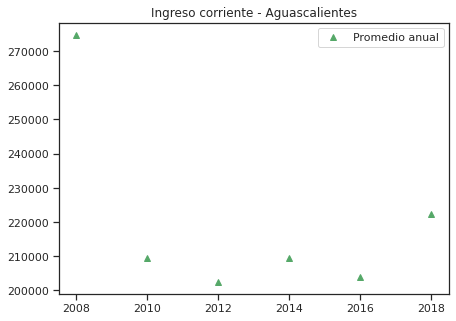

In [200]:
plt.rcParams["figure.figsize"] = [7,5]
plt.plot(ags.anio,ags.ingcor_anual,"g^")
plt.legend(["Promedio anual"], loc=0)
plt.title("Ingreso corriente - Aguascalientes")
plt.show()

### Interpolación para _ingreso_
Con base en la metdología vista en el curso, interpolamos los datos a través de splines cúbicos, de tal forma que "suavizemos" la curva.

In [201]:
import numpy as np
import scipy
from scipy.interpolate import interp1d

In [202]:
mpoints=2018-2008+1

In [203]:
ags_sc=interp1d(ags.anio,ags.ingcor_anual,kind="cubic")
anio_bd=np.linspace(min(ags.anio),max(ags.anio),mpoints)
ags_eval=ags_sc(anio_bd)
ags_bd=pd.DataFrame({"anio":anio_bd[7:],"01":ags_eval[7:]})
ags_bd

anio             01
0  2015.0  207024.339013
1  2016.0  203879.000000
2  2017.0  206759.822587
3  2018.0  222261.000000

**Visualizamos la serie interpolada:**

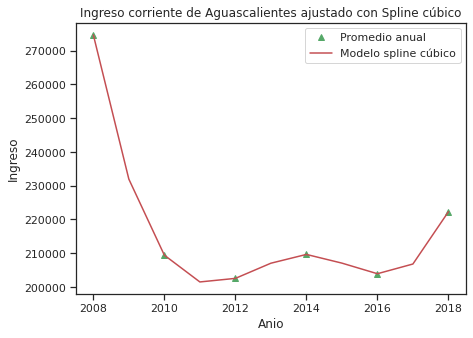

In [204]:
plt.plot(ags.anio,ags.ingcor_anual,"g^",
         anio_bd,ags_sc(anio_bd),"-r")
plt.xlabel("Anio")
plt.ylabel("Ingreso")
plt.legend(["Promedio anual","Modelo spline cúbico"],loc=0)
plt.title("Ingreso corriente de Aguascalientes ajustado con Spline cúbico")
plt.show()

Hacemos los **31 spline restantes** correspondientes al resto de las entidades y los almacenamos en "mini" data frames para cada estado, que contienen el valor de cada variable para los años 2015, 2016, 2017 y 2018:


### Obs.

Los splines cúbicos tienen la limitante de que no permiten evaluar valores fuera del rango. No obstante consideramos que esto no contrarresta los beneficios de usarlo, ya que cualquier otro modelo de interpolación visto en clase que nos permita evaluar valores fuera del rango, nos arrojaría una estimación que no tendría ningún sustento sólido para creer que el ingreso (o la pobreza) se comportó de esa hipotética manera. Es decir, no nos permitiría estimar de forma "consistente" la evolución del ingreso en 2019 a partir de observaciones bianuales para 2008-2018.

Esto se debe a que el ingreso está en función de otras variables difíciles de predecir (como crecimiento de la economía, nivel de ocupación, formalidad, entre otras) y cuya predicción se encuentra fuera del alcance del presente documento.

In [205]:
bc_sc=interp1d(bc.anio,bc.ingcor_anual,kind="cubic")
bc_eval=bc_sc(anio_bd)
bc_bd=pd.DataFrame({"anio":anio_bd[7:],"02":bc_eval[7:]})

bcs_sc=interp1d(bcs.anio,bcs.ingcor_anual,kind="cubic")
bcs_eval=bcs_sc(anio_bd)
bcs_bd=pd.DataFrame({"anio":anio_bd[7:],"03":bcs_eval[7:]})

cam_sc=interp1d(cam.anio,cam.ingcor_anual,kind="cubic")
cam_eval=cam_sc(anio_bd)
cam_bd=pd.DataFrame({"anio":anio_bd[7:],"04":cam_eval[7:]})

coah_sc=interp1d(coah.anio,coah.ingcor_anual,kind="cubic")
coah_eval=coah_sc(anio_bd)
coah_bd=pd.DataFrame({"anio":anio_bd[7:],"05":coah_eval[7:]})

col_sc=interp1d(col.anio,col.ingcor_anual,kind="cubic")
col_eval=col_sc(anio_bd)
col_bd=pd.DataFrame({"anio":anio_bd[7:],"06":col_eval[7:]})

chi_sc=interp1d(chi.anio,chi.ingcor_anual,kind="cubic")
chi_eval=chi_sc(anio_bd)
chi_bd=pd.DataFrame({"anio":anio_bd[7:],"07":chi_eval[7:]})

chh_sc=interp1d(chh.anio,chh.ingcor_anual,kind="cubic")
chh_eval=chh_sc(anio_bd)
chh_bd=pd.DataFrame({"anio":anio_bd[7:],"08":chh_eval[7:]})

cdmx_sc=interp1d(cdmx.anio,cdmx.ingcor_anual,kind="cubic")
cdmx_eval=cdmx_sc(anio_bd)
cdmx_bd=pd.DataFrame({"anio":anio_bd[7:],"09":cdmx_eval[7:]})

dur_sc=interp1d(dur.anio,dur.ingcor_anual,kind="cubic")
dur_eval=dur_sc(anio_bd)
dur_bd=pd.DataFrame({"anio":anio_bd[7:],"10":dur_eval[7:]})

gto_sc=interp1d(gto.anio,gto.ingcor_anual,kind="cubic")
gto_eval=gto_sc(anio_bd)
gto_bd=pd.DataFrame({"anio":anio_bd[7:],"11":gto_eval[7:]})

gro_sc=interp1d(gro.anio,gro.ingcor_anual,kind="cubic")
gro_eval=gro_sc(anio_bd)
gro_bd=pd.DataFrame({"anio":anio_bd[7:],"12":gro_eval[7:]})

hgo_sc=interp1d(hgo.anio,hgo.ingcor_anual,kind="cubic")
hgo_eval=hgo_sc(anio_bd)
hgo_bd=pd.DataFrame({"anio":anio_bd[7:],"13":hgo_eval[7:]})

jal_sc=interp1d(jal.anio,jal.ingcor_anual,kind="cubic")
jal_eval=jal_sc(anio_bd)
jal_bd=pd.DataFrame({"anio":anio_bd[7:],"14":jal_eval[7:]})

edomex_sc=interp1d(edomex.anio,edomex.ingcor_anual,kind="cubic")
edomex_eval=edomex_sc(anio_bd)
edomex_bd=pd.DataFrame({"anio":anio_bd[7:],"15":edomex_eval[7:]})

mich_sc=interp1d(mich.anio,mich.ingcor_anual,kind="cubic")
mich_eval=mich_sc(anio_bd)
mich_bd=pd.DataFrame({"anio":anio_bd[7:],"16":mich_eval[7:]})

mor_sc=interp1d(mor.anio,mor.ingcor_anual,kind="cubic")
mor_eval=mor_sc(anio_bd)
mor_bd=pd.DataFrame({"anio":anio_bd[7:],"17":mor_eval[7:]})

nay_sc=interp1d(nay.anio,nay.ingcor_anual,kind="cubic")
nay_eval=nay_sc(anio_bd)
nay_bd=pd.DataFrame({"anio":anio_bd[7:],"18":nay_eval[7:]})

nl_sc=interp1d(nl.anio,nl.ingcor_anual,kind="cubic")
nl_eval=nl_sc(anio_bd)
nl_bd=pd.DataFrame({"anio":anio_bd[7:],"19":nl_eval[7:]})

oax_sc=interp1d(oax.anio,oax.ingcor_anual,kind="cubic")
oax_eval=oax_sc(anio_bd)
oax_bd=pd.DataFrame({"anio":anio_bd[7:],"20":oax_eval[7:]})

pue_sc=interp1d(pue.anio,pue.ingcor_anual,kind="cubic")
pue_eval=pue_sc(anio_bd)
pue_bd=pd.DataFrame({"anio":anio_bd[7:],"21":pue_eval[7:]})

qro_sc=interp1d(qro.anio,qro.ingcor_anual,kind="cubic")
qro_eval=qro_sc(anio_bd)
qro_bd=pd.DataFrame({"anio":anio_bd[7:],"22":qro_eval[7:]})

qroo_sc=interp1d(qroo.anio,qroo.ingcor_anual,kind="cubic")
qroo_eval=qroo_sc(anio_bd)
qroo_bd=pd.DataFrame({"anio":anio_bd[7:],"23":qroo_eval[7:]})

slp_sc=interp1d(slp.anio,slp.ingcor_anual,kind="cubic")
slp_eval=slp_sc(anio_bd)
slp_bd=pd.DataFrame({"anio":anio_bd[7:],"24":slp_eval[7:]})

sin_sc=interp1d(sin.anio,sin.ingcor_anual,kind="cubic")
sin_eval=sin_sc(anio_bd)
sin_bd=pd.DataFrame({"anio":anio_bd[7:],"25":sin_eval[7:]})

son_sc=interp1d(son.anio,son.ingcor_anual,kind="cubic")
son_eval=son_sc(anio_bd)
son_bd=pd.DataFrame({"anio":anio_bd[7:],"26":son_eval[7:]})

tab_sc=interp1d(tab.anio,tab.ingcor_anual,kind="cubic")
tab_eval=tab_sc(anio_bd)
tab_bd=pd.DataFrame({"anio":anio_bd[7:],"27":tab_eval[7:]})

tam_sc=interp1d(tam.anio,tam.ingcor_anual,kind="cubic")
tam_eval=tam_sc(anio_bd)
tam_bd=pd.DataFrame({"anio":anio_bd[7:],"28":tam_eval[7:]})

tla_sc=interp1d(tla.anio,tla.ingcor_anual,kind="cubic")
tla_eval=tla_sc(anio_bd)
tla_bd=pd.DataFrame({"anio":anio_bd[7:],"29":tla_eval[7:]})

ver_sc=interp1d(ver.anio,ver.ingcor_anual,kind="cubic")
ver_eval=ver_sc(anio_bd)
ver_bd=pd.DataFrame({"anio":anio_bd[7:],"30":ver_eval[7:]})

yuc_sc=interp1d(yuc.anio,yuc.ingcor_anual,kind="cubic")
yuc_eval=yuc_sc(anio_bd)
yuc_bd=pd.DataFrame({"anio":anio_bd[7:],"31":yuc_eval[7:]})

zac_sc=interp1d(zac.anio,zac.ingcor_anual,kind="cubic")
zac_eval=zac_sc(anio_bd)
zac_bd=pd.DataFrame({"anio":anio_bd[7:],"32":zac_eval[7:]})

Ahora, juntamos las 32 "mini" dataframe que contienen la interpolación para crear una sola base:

In [206]:
df_entidad_ing = [ags_bd,
               bc_bd,
               bcs_bd,
               cam_bd,
               coah_bd,
               col_bd,
               chi_bd,
               chh_bd,
               cdmx_bd,
               dur_bd,
               gto_bd,
               gro_bd,
               hgo_bd,
               jal_bd,
               edomex_bd,
               mich_bd,
               mor_bd,
               nay_bd,
               nl_bd,
               oax_bd,
               pue_bd,
               qro_bd,
               qroo_bd,
               slp_bd,
               sin_bd,
               son_bd,
               tab_bd,
               tam_bd,
               tla_bd,
               ver_bd,
               yuc_bd,
               zac_bd,]

Con reduce() las unimos en una sola:

In [207]:
from functools import reduce
df_entidad_merged_ing = reduce(lambda  left,right: pd.merge(left,right,on=["anio"],
                                            how="outer"), df_entidad_ing)
df_entidad_merged_ing

anio             01             02             03             04  \
0  2015.0  207024.339013  222182.686764  218297.648956  194749.462045   
1  2016.0  203879.000000  241711.000000  236420.000000  186647.000000   
2  2017.0  206759.822587  250712.360511  255037.479494  180882.071530   
3  2018.0  222261.000000  223622.000000  259734.000000  181276.000000   

              05             06            07             08             09  \
0  238708.631371  200535.150583  97058.654845  190584.858882  300275.427886   
1  204850.000000  192606.000000  96910.000000  200729.000000  289548.000000   
2  185963.139379  187792.544417  97585.774853  205790.540093  284439.557839   
3  220348.000000  193318.000000  98408.000000  203138.000000  290639.000000   

   ...             23             24             25             26  \
0  ...  211087.361495  156835.530928  202316.312749  227822.362057   
1  ...  220233.000000  152542.000000  196878.000000  239135.000000   
2  ...  226746.650405  153144.662972  194854.780901  239506.499743   
3  ...  223307.000000  164805.000000  202851.000000  214927.000000   

              27             28             29             30             31  \
0  159420.120128  198761.682879  139060.411018  126081.528992  181959.922917   
1  155929.000000  195767.000000  142812.000000  127445.000000  182260.000000   
2  151985.447097  190353.131371  147130.478007  125484.118183  184981.232758   
3  146301.000000  181031.000000  151728.000000  112360.000000  191822.000000   

              32  
0  141364.010087  
1  150466.000000  
2  153314.850988  
3  140328.000000  

[4 rows x 33 columns]

**Guardamos la base en .csv. Notamos que está en formato wide**

In [208]:
pd.DataFrame.to_csv(df_entidad_merged_ing, "data_csv/ingreso_wide.csv", sep=",", na_rep=".", index=False)

Repetimos el procedimiento para pobreza y pobreza extrema

### Interpolación pobreza

In [209]:
pobreza = pd.read_csv("data_csv/pobreza.csv")
pobreza

anio  clave_ent           nombre_ent    pobreza  pobreza_ext
0    2008          1       Aguascalientes  37.636155     4.178097
1    2008          2      Baja California  25.963622     3.338982
2    2008          3  Baja California Sur  21.361314     2.676383
3    2008          4             Campeche  45.857835    11.948703
4    2008          5             Coahuila  32.716439     3.091562
..    ...        ...                  ...        ...          ...
187  2018         28           Tamaulipas  35.070261     3.317024
188  2018         29             Tlaxcala  48.378750     3.127578
189  2018         30             Veracruz  61.778922    17.699403
190  2018         31              Yucatan  40.798022     6.664957
191  2018         32            Zacatecas  46.761319     3.369204

[192 rows x 5 columns]

In [210]:
ags_p = pobreza[pobreza.clave_ent==1]
bc_p = pobreza[pobreza.clave_ent==2]
bcs_p = pobreza[pobreza.clave_ent==3]
cam_p = pobreza[pobreza.clave_ent==4]
coah_p = pobreza[pobreza.clave_ent==5]
col_p = pobreza[pobreza.clave_ent==6]
chi_p = pobreza[pobreza.clave_ent==7]
chh_p = pobreza[pobreza.clave_ent==8]
cdmx_p = pobreza[pobreza.clave_ent==9]
dur_p = pobreza[pobreza.clave_ent==10]
gto_p = pobreza[pobreza.clave_ent==11]
gro_p = pobreza[pobreza.clave_ent==12]
hgo_p = pobreza[pobreza.clave_ent==13]
jal_p = pobreza[pobreza.clave_ent==14]
edomex_p = pobreza[pobreza.clave_ent==15]
mich_p = pobreza[pobreza.clave_ent==16]
mor_p = pobreza[pobreza.clave_ent==17]
nay_p = pobreza[pobreza.clave_ent==18]
nl_p = pobreza[pobreza.clave_ent==19]
oax_p = pobreza[pobreza.clave_ent==20]
pue_p = pobreza[pobreza.clave_ent==21]
qro_p = pobreza[pobreza.clave_ent==22]
qroo_p = pobreza[pobreza.clave_ent==23]
slp_p = pobreza[pobreza.clave_ent==24]
sin_p = pobreza[pobreza.clave_ent==25]
son_p = pobreza[pobreza.clave_ent==26]
tab_p = pobreza[pobreza.clave_ent==27]
tam_p = pobreza[pobreza.clave_ent==28]
tla_p = pobreza[pobreza.clave_ent==29]
ver_p = pobreza[pobreza.clave_ent==30]
yuc_p = pobreza[pobreza.clave_ent==31]
zac_p = pobreza[pobreza.clave_ent==32]

In [211]:
ags_p

anio  clave_ent      nombre_ent    pobreza  pobreza_ext
0    2008          1  Aguascalientes  37.636155     4.178097
32   2010          1  Aguascalientes  38.130727     3.766106
64   2012          1  Aguascalientes  37.758857     3.390189
96   2014          1  Aguascalientes  34.765918     2.096713
128  2016          1  Aguascalientes  28.219218     2.303940
160  2018          1  Aguascalientes  26.182959     1.165586

In [212]:
ags_sc_p=interp1d(ags_p.anio,ags_p.pobreza,kind="cubic")
ags_eval_p=ags_sc_p(anio_bd)
ags_bd_p=pd.DataFrame({"anio":anio_bd[7:],"01":ags_eval_p[7:]})


bc_sc_p=interp1d(bc_p.anio,bc_p.pobreza,kind="cubic")
bc_eval_p=bc_sc_p(anio_bd)
bc_bd_p=pd.DataFrame({"anio":anio_bd[7:],"02":bc_eval_p[7:]})

bcs_sc_p=interp1d(bcs_p.anio,bcs_p.pobreza,kind="cubic")
bcs_eval_p=bcs_sc_p(anio_bd)
bcs_bd_p=pd.DataFrame({"anio":anio_bd[7:],"03":bcs_eval_p[7:]})

cam_sc_p=interp1d(cam_p.anio,cam_p.pobreza,kind="cubic")
cam_eval_p=cam_sc_p(anio_bd)
cam_bd_p=pd.DataFrame({"anio":anio_bd[7:],"04":cam_eval_p[7:]})

coah_sc_p=interp1d(coah_p.anio,coah_p.pobreza,kind="cubic")
coah_eval_p=coah_sc_p(anio_bd)
coah_bd_p=pd.DataFrame({"anio":anio_bd[7:],"05":coah_eval_p[7:]})

col_sc_p=interp1d(col_p.anio,col_p.pobreza,kind="cubic")
col_eval_p=col_sc_p(anio_bd)
col_bd_p=pd.DataFrame({"anio":anio_bd[7:],"06":col_eval_p[7:]})

chi_sc_p=interp1d(chi_p.anio,chi_p.pobreza,kind="cubic")
chi_eval_p=chi_sc_p(anio_bd)
chi_bd_p=pd.DataFrame({"anio":anio_bd[7:],"07":chi_eval_p[7:]})

chh_sc_p=interp1d(chh_p.anio,chh_p.pobreza,kind="cubic")
chh_eval_p=chh_sc_p(anio_bd)
chh_bd_p=pd.DataFrame({"anio":anio_bd[7:],"08":chh_eval_p[7:]})

cdmx_sc_p=interp1d(cdmx_p.anio,cdmx_p.pobreza,kind="cubic")
cdmx_eval_p=cdmx_sc_p(anio_bd)
cdmx_bd_p=pd.DataFrame({"anio":anio_bd[7:],"09":cdmx_eval_p[7:]})

dur_sc_p=interp1d(dur_p.anio,dur_p.pobreza,kind="cubic")
dur_eval_p=dur_sc_p(anio_bd)
dur_bd_p=pd.DataFrame({"anio":anio_bd[7:],"10":dur_eval_p[7:]})

gto_sc_p=interp1d(gto_p.anio,gto_p.pobreza,kind="cubic")
gto_eval_p=gto_sc_p(anio_bd)
gto_bd_p=pd.DataFrame({"anio":anio_bd[7:],"11":gto_eval_p[7:]})

gro_sc_p=interp1d(gro_p.anio,gro_p.pobreza,kind="cubic")
gro_eval_p=gro_sc_p(anio_bd)
gro_bd_p=pd.DataFrame({"anio":anio_bd[7:],"12":gro_eval_p[7:]})

hgo_sc_p=interp1d(hgo_p.anio,hgo_p.pobreza,kind="cubic")
hgo_eval_p=hgo_sc_p(anio_bd)
hgo_bd_p=pd.DataFrame({"anio":anio_bd[7:],"13":hgo_eval_p[7:]})

jal_sc_p=interp1d(jal_p.anio,jal_p.pobreza,kind="cubic")
jal_eval_p=jal_sc_p(anio_bd)
jal_bd_p=pd.DataFrame({"anio":anio_bd[7:],"14":jal_eval_p[7:]})

edomex_sc_p=interp1d(edomex_p.anio,edomex_p.pobreza,kind="cubic")
edomex_eval_p=edomex_sc_p(anio_bd)
edomex_bd_p=pd.DataFrame({"anio":anio_bd[7:],"15":edomex_eval_p[7:]})

mich_sc_p=interp1d(mich_p.anio,mich_p.pobreza,kind="cubic")
mich_eval_p=mich_sc(anio_bd)
mich_bd_p=pd.DataFrame({"anio":anio_bd[7:],"16":mich_eval_p[7:]})

mor_sc_p=interp1d(mor_p.anio,mor_p.pobreza,kind="cubic")
mor_eval_p=mor_sc_p(anio_bd)
mor_bd_p=pd.DataFrame({"anio":anio_bd[7:],"17":mor_eval_p[7:]})

nay_sc_p=interp1d(nay_p.anio,nay_p.pobreza,kind="cubic")
nay_eval_p=nay_sc_p(anio_bd)
nay_bd_p=pd.DataFrame({"anio":anio_bd[7:],"18":nay_eval_p[7:]})

nl_sc_p=interp1d(nl_p.anio,nl_p.pobreza,kind="cubic")
nl_eval_p=nl_sc_p(anio_bd)
nl_bd_p=pd.DataFrame({"anio":anio_bd[7:],"19":nl_eval_p[7:]})

oax_sc_p=interp1d(oax_p.anio,oax_p.pobreza,kind="cubic")
oax_eval_p=oax_sc_p(anio_bd)
oax_bd_p=pd.DataFrame({"anio":anio_bd[7:],"20":oax_eval_p[7:]})

pue_sc_p=interp1d(pue_p.anio,pue_p.pobreza,kind="cubic")
pue_eval_p=pue_sc_p(anio_bd)
pue_bd_p=pd.DataFrame({"anio":anio_bd[7:],"21":pue_eval_p[7:]})

qro_sc_p=interp1d(qro_p.anio,qro_p.pobreza,kind="cubic")
qro_eval_p=qro_sc_p(anio_bd)
qro_bd_p=pd.DataFrame({"anio":anio_bd[7:],"22":qro_eval_p[7:]})

qroo_sc_p=interp1d(qroo_p.anio,qroo_p.pobreza,kind="cubic")
qroo_eval_p=qroo_sc_p(anio_bd)
qroo_bd_p=pd.DataFrame({"anio":anio_bd[7:],"23":qroo_eval_p[7:]})

slp_sc_p=interp1d(slp_p.anio,slp_p.pobreza,kind="cubic")
slp_eval_p=slp_sc_p(anio_bd)
slp_bd_p=pd.DataFrame({"anio":anio_bd[7:],"24":slp_eval_p[7:]})

sin_sc_p=interp1d(sin_p.anio,sin_p.pobreza,kind="cubic")
sin_eval_p=sin_sc_p(anio_bd)
sin_bd_p=pd.DataFrame({"anio":anio_bd[7:],"25":sin_eval_p[7:]})

son_sc_p=interp1d(son_p.anio,son_p.pobreza,kind="cubic")
son_eval_p=son_sc_p(anio_bd)
son_bd_p=pd.DataFrame({"anio":anio_bd[7:],"26":son_eval_p[7:]})

tab_sc_p=interp1d(tab_p.anio,tab_p.pobreza,kind="cubic")
tab_eval_p=tab_sc_p(anio_bd)
tab_bd_p=pd.DataFrame({"anio":anio_bd[7:],"27":tab_eval_p[7:]})

tam_sc_p=interp1d(tam_p.anio,tam_p.pobreza,kind="cubic")
tam_eval_p=tam_sc_p(anio_bd)
tam_bd_p=pd.DataFrame({"anio":anio_bd[7:],"28":tam_eval_p[7:]})

tla_sc_p=interp1d(tla_p.anio,tla_p.pobreza,kind="cubic")
tla_eval_p=tla_sc_p(anio_bd)
tla_bd_p=pd.DataFrame({"anio":anio_bd[7:],"29":tla_eval_p[7:]})

ver_sc_p=interp1d(ver_p.anio,ver_p.pobreza,kind="cubic")
ver_eval_p=ver_sc_p(anio_bd)
ver_bd_p=pd.DataFrame({"anio":anio_bd[7:],"30":ver_eval_p[7:]})

yuc_sc_p=interp1d(yuc_p.anio,yuc_p.pobreza,kind="cubic")
yuc_eval_p=yuc_sc_p(anio_bd)
yuc_bd_p=pd.DataFrame({"anio":anio_bd[7:],"31":yuc_eval_p[7:]})

zac_sc_p=interp1d(zac_p.anio,zac_p.pobreza,kind="cubic")
zac_eval_p=zac_sc_p(anio_bd)
zac_bd_p=pd.DataFrame({"anio":anio_bd[7:],"32":zac_eval_p[7:]})

In [213]:
df_entidad_p = [ags_bd_p,
               bc_bd_p,
               bcs_bd_p,
               cam_bd_p,
               coah_bd_p,
               col_bd_p,
               chi_bd_p,
               chh_bd_p,
               cdmx_bd_p,
               dur_bd_p,
               gto_bd_p,
               gro_bd_p,
               hgo_bd_p,
               jal_bd_p,
               edomex_bd_p,
               mich_bd_p,
               mor_bd_p,
               nay_bd_p,
               nl_bd_p,
               oax_bd_p,
               pue_bd_p,
               qro_bd_p,
               qroo_bd_p,
               slp_bd_p,
               sin_bd_p,
               son_bd_p,
               tab_bd_p,
               tam_bd_p,
               tla_bd_p,
               ver_bd_p,
               yuc_bd_p,
               zac_bd_p,]

In [214]:
df_entidad_merged_p = reduce(lambda  left,right: pd.merge(left,right,on=["anio"],
                                            how="outer"), df_entidad_p)
df_entidad_merged_p

anio         01         02         03         04         05         06  \
0  2015.0  31.579299  25.573136  26.906149  43.609411  28.147011  34.183695   
1  2016.0  28.219218  22.232681  22.126035  43.767647  24.815166  33.631707   
2  2017.0  25.986747  20.739594  18.366459  44.501350  22.240238  32.567449   
3  2018.0  26.182959  23.256854  18.071516  46.249366  22.486614  30.868597   

          07         08         09  ...         23         24         25  \
0  76.935404  32.926436  27.817177  ...  32.322818  47.483929  35.966903   
1  77.081387  30.608393  27.595407  ...  28.846837  45.520657  30.806637   
2  76.841567  28.154001  28.306628  ...  26.809345  43.922194  27.805010   
3  76.411032  26.280730  30.550436  ...  27.565430  43.399115  30.878423   

          26         27         28         29         30         31         32  
0  28.849614  50.228483  35.205753  57.166687  60.715685  43.743897  50.943287  
1  27.863704  50.851786  32.162231  53.945662  62.160045  41.871657  49.003875  
2  27.331867  51.853432  31.286049  50.578390  62.470408  40.727221  47.339304  
3  28.185481  53.646294  35.070261  48.378750  61.778922  40.798022  46.761319  

[4 rows x 33 columns]

In [215]:
pd.DataFrame.to_csv(df_entidad_merged_p, "data_csv/pobreza_wide.csv", sep=",", na_rep=".", index=False)

### Interpolación pobreza extrema

In [216]:
ags_sc_p=interp1d(ags_p.anio,ags_p.pobreza_ext,kind="cubic")
ags_eval_p=ags_sc_p(anio_bd)
ags_bd_p=pd.DataFrame({"anio":anio_bd[7:],"01":ags_eval_p[7:]})


bc_sc_p=interp1d(bc_p.anio,bc_p.pobreza_ext,kind="cubic")
bc_eval_p=bc_sc_p(anio_bd)
bc_bd_p=pd.DataFrame({"anio":anio_bd[7:],"02":bc_eval_p[7:]})

bcs_sc_p=interp1d(bcs_p.anio,bcs_p.pobreza_ext,kind="cubic")
bcs_eval_p=bcs_sc_p(anio_bd)
bcs_bd_p=pd.DataFrame({"anio":anio_bd[7:],"03":bcs_eval_p[7:]})

cam_sc_p=interp1d(cam_p.anio,cam_p.pobreza_ext,kind="cubic")
cam_eval_p=cam_sc_p(anio_bd)
cam_bd_p=pd.DataFrame({"anio":anio_bd[7:],"04":cam_eval_p[7:]})

coah_sc_p=interp1d(coah_p.anio,coah_p.pobreza_ext,kind="cubic")
coah_eval_p=coah_sc_p(anio_bd)
coah_bd_p=pd.DataFrame({"anio":anio_bd[7:],"05":coah_eval_p[7:]})

col_sc_p=interp1d(col_p.anio,col_p.pobreza_ext,kind="cubic")
col_eval_p=col_sc_p(anio_bd)
col_bd_p=pd.DataFrame({"anio":anio_bd[7:],"06":col_eval_p[7:]})

chi_sc_p=interp1d(chi_p.anio,chi_p.pobreza_ext,kind="cubic")
chi_eval_p=chi_sc_p(anio_bd)
chi_bd_p=pd.DataFrame({"anio":anio_bd[7:],"07":chi_eval_p[7:]})

chh_sc_p=interp1d(chh_p.anio,chh_p.pobreza_ext,kind="cubic")
chh_eval_p=chh_sc_p(anio_bd)
chh_bd_p=pd.DataFrame({"anio":anio_bd[7:],"08":chh_eval_p[7:]})

cdmx_sc_p=interp1d(cdmx_p.anio,cdmx_p.pobreza_ext,kind="cubic")
cdmx_eval_p=cdmx_sc_p(anio_bd)
cdmx_bd_p=pd.DataFrame({"anio":anio_bd[7:],"09":cdmx_eval_p[7:]})

dur_sc_p=interp1d(dur_p.anio,dur_p.pobreza_ext,kind="cubic")
dur_eval_p=dur_sc_p(anio_bd)
dur_bd_p=pd.DataFrame({"anio":anio_bd[7:],"10":dur_eval_p[7:]})

gto_sc_p=interp1d(gto_p.anio,gto_p.pobreza_ext,kind="cubic")
gto_eval_p=gto_sc_p(anio_bd)
gto_bd_p=pd.DataFrame({"anio":anio_bd[7:],"11":gto_eval_p[7:]})

gro_sc_p=interp1d(gro_p.anio,gro_p.pobreza_ext,kind="cubic")
gro_eval_p=gro_sc_p(anio_bd)
gro_bd_p=pd.DataFrame({"anio":anio_bd[7:],"12":gro_eval_p[7:]})

hgo_sc_p=interp1d(hgo_p.anio,hgo_p.pobreza_ext,kind="cubic")
hgo_eval_p=hgo_sc_p(anio_bd)
hgo_bd_p=pd.DataFrame({"anio":anio_bd[7:],"13":hgo_eval_p[7:]})

jal_sc_p=interp1d(jal_p.anio,jal_p.pobreza_ext,kind="cubic")
jal_eval_p=jal_sc_p(anio_bd)
jal_bd_p=pd.DataFrame({"anio":anio_bd[7:],"14":jal_eval_p[7:]})

edomex_sc_p=interp1d(edomex_p.anio,edomex_p.pobreza_ext,kind="cubic")
edomex_eval_p=edomex_sc_p(anio_bd)
edomex_bd_p=pd.DataFrame({"anio":anio_bd[7:],"15":edomex_eval_p[7:]})

mich_sc_p=interp1d(mich_p.anio,mich_p.pobreza_ext,kind="cubic")
mich_eval_p=mich_sc(anio_bd)
mich_bd_p=pd.DataFrame({"anio":anio_bd[7:],"16":mich_eval_p[7:]})

mor_sc_p=interp1d(mor_p.anio,mor_p.pobreza_ext,kind="cubic")
mor_eval_p=mor_sc_p(anio_bd)
mor_bd_p=pd.DataFrame({"anio":anio_bd[7:],"17":mor_eval_p[7:]})

nay_sc_p=interp1d(nay_p.anio,nay_p.pobreza_ext,kind="cubic")
nay_eval_p=nay_sc_p(anio_bd)
nay_bd_p=pd.DataFrame({"anio":anio_bd[7:],"18":nay_eval_p[7:]})

nl_sc_p=interp1d(nl_p.anio,nl_p.pobreza_ext,kind="cubic")
nl_eval_p=nl_sc_p(anio_bd)
nl_bd_p=pd.DataFrame({"anio":anio_bd[7:],"19":nl_eval_p[7:]})

oax_sc_p=interp1d(oax_p.anio,oax_p.pobreza_ext,kind="cubic")
oax_eval_p=oax_sc_p(anio_bd)
oax_bd_p=pd.DataFrame({"anio":anio_bd[7:],"20":oax_eval_p[7:]})

pue_sc_p=interp1d(pue_p.anio,pue_p.pobreza_ext,kind="cubic")
pue_eval_p=pue_sc_p(anio_bd)
pue_bd_p=pd.DataFrame({"anio":anio_bd[7:],"21":pue_eval_p[7:]})

qro_sc_p=interp1d(qro_p.anio,qro_p.pobreza_ext,kind="cubic")
qro_eval_p=qro_sc_p(anio_bd)
qro_bd_p=pd.DataFrame({"anio":anio_bd[7:],"22":qro_eval_p[7:]})

qroo_sc_p=interp1d(qroo_p.anio,qroo_p.pobreza_ext,kind="cubic")
qroo_eval_p=qroo_sc_p(anio_bd)
qroo_bd_p=pd.DataFrame({"anio":anio_bd[7:],"23":qroo_eval_p[7:]})

slp_sc_p=interp1d(slp_p.anio,slp_p.pobreza_ext,kind="cubic")
slp_eval_p=slp_sc_p(anio_bd)
slp_bd_p=pd.DataFrame({"anio":anio_bd[7:],"24":slp_eval_p[7:]})

sin_sc_p=interp1d(sin_p.anio,sin_p.pobreza_ext,kind="cubic")
sin_eval_p=sin_sc_p(anio_bd)
sin_bd_p=pd.DataFrame({"anio":anio_bd[7:],"25":sin_eval_p[7:]})

son_sc_p=interp1d(son_p.anio,son_p.pobreza_ext,kind="cubic")
son_eval_p=son_sc_p(anio_bd)
son_bd_p=pd.DataFrame({"anio":anio_bd[7:],"26":son_eval_p[7:]})

tab_sc_p=interp1d(tab_p.anio,tab_p.pobreza_ext,kind="cubic")
tab_eval_p=tab_sc_p(anio_bd)
tab_bd_p=pd.DataFrame({"anio":anio_bd[7:],"27":tab_eval_p[7:]})

tam_sc_p=interp1d(tam_p.anio,tam_p.pobreza_ext,kind="cubic")
tam_eval_p=tam_sc_p(anio_bd)
tam_bd_p=pd.DataFrame({"anio":anio_bd[7:],"28":tam_eval_p[7:]})

tla_sc_p=interp1d(tla_p.anio,tla_p.pobreza_ext,kind="cubic")
tla_eval_p=tla_sc_p(anio_bd)
tla_bd_p=pd.DataFrame({"anio":anio_bd[7:],"29":tla_eval_p[7:]})

ver_sc_p=interp1d(ver_p.anio,ver_p.pobreza_ext,kind="cubic")
ver_eval_p=ver_sc_p(anio_bd)
ver_bd_p=pd.DataFrame({"anio":anio_bd[7:],"30":ver_eval_p[7:]})

yuc_sc_p=interp1d(yuc_p.anio,yuc_p.pobreza_ext,kind="cubic")
yuc_eval_p=yuc_sc_p(anio_bd)
yuc_bd_p=pd.DataFrame({"anio":anio_bd[7:],"31":yuc_eval_p[7:]})

zac_sc_p=interp1d(zac_p.anio,zac_p.pobreza_ext,kind="cubic")
zac_eval_p=zac_sc_p(anio_bd)
zac_bd_p=pd.DataFrame({"anio":anio_bd[7:],"32":zac_eval_p[7:]})

In [217]:
df_entidad_pe = [ags_bd_p,
               bc_bd_p,
               bcs_bd_p,
               cam_bd_p,
               coah_bd_p,
               col_bd_p,
               chi_bd_p,
               chh_bd_p,
               cdmx_bd_p,
               dur_bd_p,
               gto_bd_p,
               gro_bd_p,
               hgo_bd_p,
               jal_bd_p,
               edomex_bd_p,
               mich_bd_p,
               mor_bd_p,
               nay_bd_p,
               nl_bd_p,
               oax_bd_p,
               pue_bd_p,
               qro_bd_p,
               qroo_bd_p,
               slp_bd_p,
               sin_bd_p,
               son_bd_p,
               tab_bd_p,
               tam_bd_p,
               tla_bd_p,
               ver_bd_p,
               yuc_bd_p,
               zac_bd_p,]

In [218]:
df_entidad_merged_pe = reduce(lambda  left,right: pd.merge(left,right,on=["anio"],
                                            how="outer"), df_entidad_pe)
df_entidad_merged_pe

anio        01        02        03        04        05        06  \
0  2015.0  2.088839  2.233112  2.978019  9.137652  2.870001  2.955251   
1  2016.0  2.303940  1.117989  1.607785  6.657294  1.653031  2.607600   
2  2017.0  2.182645  0.616374  0.794731  6.056671  0.905956  2.407630   
3  2018.0  1.165586  1.625469  1.498556  9.770876  1.448798  2.390672   

          07        08        09  ...        23        24        25        26  \
0  30.216031  4.768016  1.626511  ...  5.549137  8.354448  4.339707  2.745836   
1  28.079119  3.217158  1.758453  ...  4.236940  7.677334  2.885677  2.524375   
2  27.288086  2.070804  1.874369  ...  3.418731  7.365221  1.974163  2.522396   
3  29.712326  2.608862  1.746117  ...  3.470576  7.330072  2.684058  2.633115   

          27        28        29         30        31        32  
0  10.895607  3.642012  6.003241  17.260390  8.812465  4.625208  
1  11.769278  2.881755  5.744204  16.403335  6.147751  3.524088  
2  12.588699  2.590017  5.028753  16.057845  4.746799  2.930847  
3  12.292219  3.317024  3.127578  17.699403  6.664957  3.369204  

[4 rows x 33 columns]

In [219]:
pd.DataFrame.to_csv(df_entidad_merged_pe, "data_csv/pobreza_ext_wide.csv", sep=",", na_rep=".", index=False)

**Por último, dado que logramos tener las bases en formato wide, nos interesa transformarlas a formato long para facilitar la integración con el resto de variables e integrar la _base_final.csv_**

### Conversión de formato wide a formato long

In [220]:
df_ingreso_long=pd.melt(df_entidad_merged_ing,id_vars=["anio"],var_name="clave_ent",value_name="ingcor_anual")
df_ingreso_long

anio clave_ent   ingcor_anual
0    2015.0        01  207024.339013
1    2016.0        01  203879.000000
2    2017.0        01  206759.822587
3    2018.0        01  222261.000000
4    2015.0        02  222182.686764
..      ...       ...            ...
123  2018.0        31  191822.000000
124  2015.0        32  141364.010087
125  2016.0        32  150466.000000
126  2017.0        32  153314.850988
127  2018.0        32  140328.000000

[128 rows x 3 columns]

In [221]:
df_pobreza_long=pd.melt(df_entidad_merged_p,id_vars=["anio"],var_name="clave_ent",value_name="pobreza")
df_pobreza_ext_long=pd.melt(df_entidad_merged_pe,id_vars=["anio"],var_name="clave_ent",value_name="pobreza_ext")

In [222]:
pd.DataFrame.to_csv(df_ingreso_long, "data_csv/ingreso_long.csv", sep=",", na_rep=".", index=False)
pd.DataFrame.to_csv(df_pobreza_long, "data_csv/pobreza_long.csv", sep=",", na_rep=".", index=False)
pd.DataFrame.to_csv(df_pobreza_ext_long, "data_csv/pobreza_ext_long.csv", sep=",", na_rep=".", index=False)

Cargamos base de Producto Interno Bruto Estatal (PIBE), la cual se tiene en formato long, para visualizarla.

In [223]:
pibe = pd.read_csv("data_csv/pibe.csv")
pibe.head()

anio  clave_ent           nombre_ent        pibe
0  2015          1       Aguascalientes  198220.641
1  2015          2      Baja California  511459.528
2  2015          3  Baja California Sur  130520.642
3  2015          4             Campeche  637604.643
4  2015          5             Coahuila  563928.440